In [13]:
# ROAD MAP
# DESCONSIDERAR A PRIMEIRA COLUNA
# SEPARA A COLUNA DE PRECO DAS DEMAIS
# FAZER A MULTIPLICACAO DA MATRIX EM SEGUIDA DA INVERSA

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from enum import Enum
from sklearn import datasets, linear_model
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
import time

def addColumnThetaZero (array):
    return np.c_[np.ones(array.shape[0]), array]

def classificationCut (data):
    data = data.replace("Fair", -2)
    data = data.replace("Good", -1)
    data = data.replace("Very Good", 0)
    data = data.replace("Premium", 1)
    data = data.replace("Ideal", 2)
    return data

def classificationColor (data):
    data = data.replace('D', -3)
    data = data.replace('E', -2)
    data = data.replace('F', -1)
    data = data.replace('G', -0)
    data = data.replace('H', 1)
    data = data.replace('I', 2)
    data = data.replace('J', 3)
    return data

#como fazer com numeros pares?
def classificationClarity (data):
    data = data.replace("I1", -3)
    data = data.replace("SI2", -2)
    data = data.replace("SI1", -1)
    data = data.replace("VS2", 0)
    data = data.replace("VS1", 1)
    data = data.replace("VVS2", 2)
    data = data.replace("VVS1", 3)
    data = data.replace("IF", 4)
    return data

def classificationSet (data):
    data = classificationCut(data)
    data = classificationColor(data)
    data = classificationClarity(data)
    return data

def costFunction (params, thetas, target):
    m = params.shape[0]
    agaDeTheta = np.matmul (params, thetas)
    preSomatorio = agaDeTheta - target
    return (sumSquares(preSomatorio, m))

def createArrayTheta (numberParams, multi):
    array = np.c_[np.ones(numberParams)]
    array = array * multi
    return array

# Realiza as multiplicacoes de matrizes e retorna um array com os parametros
def findNormalParams (fullParams, fullTarget):
    diamondsFullParamsTranspose = fullParams.transpose()
    multiplyMatrix = np.matmul (diamondsFullParamsTranspose, fullParams)
    inverseMatrix = np.linalg.inv(multiplyMatrix)
    multiplyInverseTranspose = np.matmul(inverseMatrix, diamondsFullParamsTranspose)
    paramsValues = np.matmul(multiplyInverseTranspose, fullTarget)
    return paramsValues

# Transforma os parametros em valores entre -0.5 e 0.5
def fitParams (array):
    scaler = MinMaxScaler(feature_range=(-0.5,0.5))
    scaler.fit(array)
    return scaler.transform(array)

def formatArray (dataFrame, lastColumn) :
    array = dataFrame.values
    target = array[:,lastColumn]
    params = np.delete(array, lastColumn, axis = 1)
    return params, target

def loadDiamondsTrainingData():
    return pd.read_csv("diamonds-dataset/diamonds-train.csv")

def loadDiamondsTestData():
    return pd.read_csv("diamonds-dataset/diamonds-test.csv")

def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

def sumSquares(array, m):
    square = array * array
    return (sum(square)/(2*m))


# We get our data and ajust it to have only numeric value

In [14]:
diamondsTrain = loadDiamondsTrainingData()
diamondsTrain = classificationSet(diamondsTrain)

# First, we get some insight about our data:




In [15]:
diamondsTrain.describe()

,carat,cut,color,clarity,x,y,z,depth,table,price
count,45849.000000,45849.000000,45849.000000,45849.000000,45849.000000,45849.000000,45849.000000,45849.000000,45849.000000,45849.000000
mean,0.797698,0.904556,-0.411089,0.047438,5.731171,5.734044,3.537613,61.744716,57.455582,3932.515562
std,0.473863,1.117100,1.701648,1.642080,1.121454,1.140275,0.694809,1.428341,2.237592,3990.380545
min,0.200000,-2.000000,-3.000000,-3.000000,0.000000,0.000000,0.000000,43.000000,43.000000,326.000000
25%,0.400000,0.000000,-2.000000,-1.000000,4.710000,4.720000,2.910000,61.000000,56.000000,950.000000
50%,0.700000,1.000000,0.000000,0.000000,5.700000,5.710000,3.520000,61.800000,57.000000,2401.000000
75%,1.040000,2.000000,1.000000,1.000000,6.540000,6.540000,4.030000,62.500000,59.000000,5322.000000
max,5.010000,2.000000,3.000000,4.000000,10.740000,58.900000,8.060000,78.200000,95.000000,18823.000000


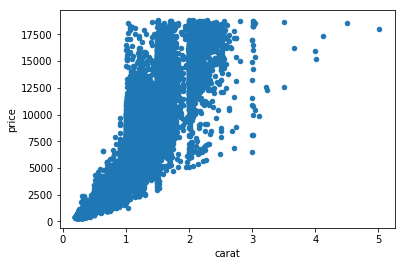

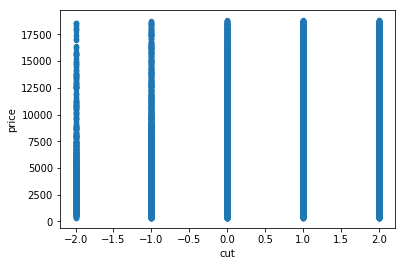

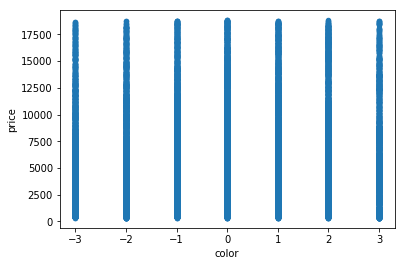

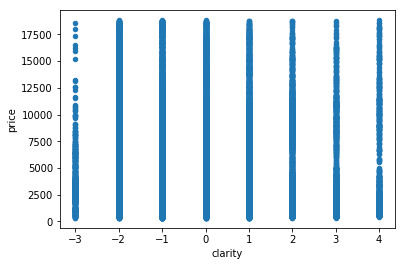

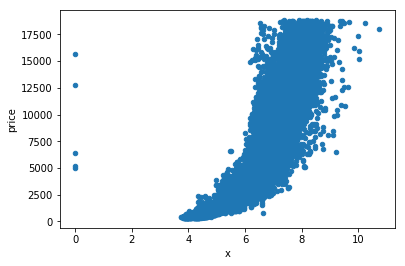

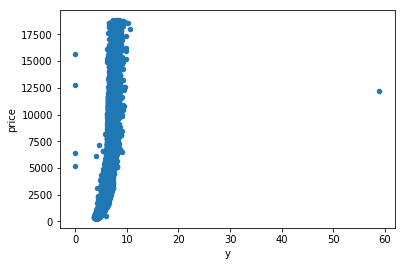

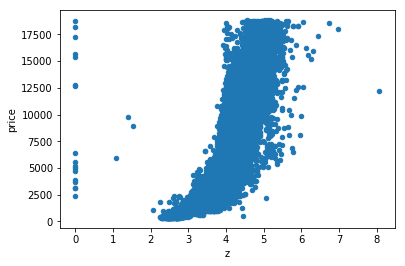

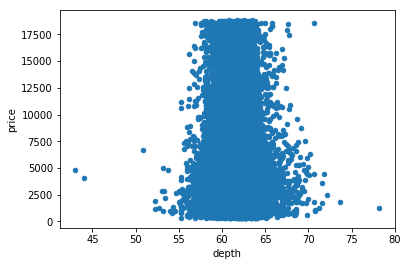

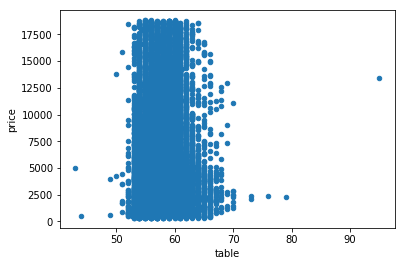

In [16]:
diamondsTrain.plot(kind="scatter", x="carat", y="price")
diamondsTrain.plot(kind="scatter", x="cut", y="price")
diamondsTrain.plot(kind="scatter", x="color", y="price")
diamondsTrain.plot(kind="scatter", x="clarity", y="price")
diamondsTrain.plot(kind="scatter", x="x", y="price")
diamondsTrain.plot(kind="scatter", x="y", y="price")
diamondsTrain.plot(kind="scatter", x="z", y="price")
diamondsTrain.plot(kind="scatter", x="depth", y="price")
diamondsTrain.plot(kind="scatter", x="table", y="price")

In [17]:
corr_matrix = diamondsTrain.corr()
corr_matrix["price"].sort_values(ascending=False)

price      1.000000
carat      0.921541
x          0.885136
z          0.874730
y          0.867810
color      0.170961
table      0.126694
depth     -0.014127
cut       -0.052402
clarity   -0.144417
Name: price, dtype: float64

## Preparing the data for the Machine Learning proccess

### We will be using a exponential function to describe x, y and z behaviour
From the data analysis previously seen, this model seems to fit better these attributes behaviour in a quadratic model.

#### Insert x, y and z squared values to the matrix

In [18]:
x_sqrd = diamondsTrain['x'] ** 2
y_sqrd = diamondsTrain['y'] ** 2
z_sqrd = diamondsTrain['z'] ** 2

diamondsTrain.insert(loc = 5, column = 'x_sqrd', value = x_sqrd)
diamondsTrain.insert(loc = 7, column = 'y_sqrd', value = y_sqrd)
diamondsTrain.insert(loc = 9, column = 'z_sqrd', value = z_sqrd)

### Do not forget to split training and validation sets!

A randomized choice of validation set was implemented, based on the Hands-On Machine Learning Course given as a reference.

In [19]:
trainSet, validationSet = split_train_test(diamondsTrain, 0.2)

trainSetParams, trainSetTarget = formatArray(trainSet, 12)
trainSetTarget = trainSetTarget.reshape(trainSetTarget.shape[0], -1)

validationSetParams, validationSetTarget = formatArray(validationSet, 12)
validationSetTarget = validationSetTarget.reshape(validationSetTarget.shape[0], -1)

### Final adjustments:
* Include the column of 1's (linear coefficient) on the set
* Create array of thetas (training coefficients to be set) using 100 as the default value.
* Set learning rate (alpha)

In [20]:
trainSetParams = addColumnThetaZero (trainSetParams)
validationSetParams = addColumnThetaZero (validationSetParams)


thetaBatch = createArrayTheta(13, 100)
thetaMiniBatch = createArrayTheta(13, 100)
thetaStoch = createArrayTheta(13, 100)

alpha = 0.0002

xToPlotBatch = np.array([])
yToPlotBatch = np.array([])

xToPlotStoch = np.array([])
yToPlotStoch = np.array([])

xToPlotMiniBatch = np.array([])
yToPlotMiniBatch = np.array([])

Last, but not least, the maximum number of iterations for each gradient descent method implemented is set.

In [21]:
maxIterationBatch = 10000
miniBatchEpochs = 64000
maxIterationStoch = 46800 * 10000

# Batch implementation

In [22]:
i = 0
custo0 = 10
custo1 = 1
m = trainSetParams.shape[0]

# while i < maxIterationBatch and  abs(1 - custo1/custo0) > 0.5*alpha:
startBatch = time.time()
while i < maxIterationBatch:
    custo0 = custo1
    agaDeTheta = np.matmul (trainSetParams, thetaBatch)
    preSomatorio = agaDeTheta - trainSetTarget
    somatorio = preSomatorio * trainSetParams
    somaTheta = np.sum(somatorio, axis=0)
    somaTheta = somaTheta.reshape(somaTheta.shape[0], -1)
    somaTheta = somaTheta / m
    somaTheta = somaTheta * alpha
    thetaBatch = thetaBatch - somaTheta
    i = i + 1
    custo1 = costFunction(trainSetParams, thetaBatch, trainSetTarget)
    xToPlotBatch = np.append(xToPlotBatch,i)
    yToPlotBatch = np.append(yToPlotBatch,custo1)
#     print (i, custo1/custo0, custo1)
endBatch = time.time()

plt.plot(xToPlotBatch, yToPlotBatch, 'ro')
plt.show()

print(thetaBatch)
print("TOTAL TIME BATCH ", endBath - startBatch)

KeyboardInterrupt: 

# Mini-batch implementation

In [23]:
i = 0
custo0 = 10
custo1 = 1
batchSize = 64
start_idx = 0;
indices = np.arange(trainSetParams.shape[0])
np.random.shuffle(indices)
excerpt = indices[start_idx:start_idx + batchSize]
trainSetParamsMiniBatch = trainSetParams[excerpt]
trainSetTargetMiniBatch = trainSetTarget[excerpt]

startMiniBatch = time.time()
while i < miniBatchEpochs :
    custo0 = custo1
    agaDeTheta = np.matmul (trainSetParamsMiniBatch, thetaMiniBatch)
    preSomatorio = agaDeTheta - trainSetTargetMiniBatch
    somatorio = preSomatorio * trainSetParamsMiniBatch
    somaTheta = np.sum(somatorio, axis=0)
    somaTheta = somaTheta.reshape(somaTheta.shape[0], -1)
    somaTheta = somaTheta / (trainSetParamsMiniBatch.shape[0])
    somaTheta = somaTheta * alpha
    thetaMiniBatch = thetaMiniBatch - somaTheta
    i = i + 1
    custo1 = costFunction(trainSetParamsMiniBatch, thetaMiniBatch, trainSetTargetMiniBatch)
    xToPlotMiniBatch = np.append(xToPlotMiniBatch,i)
    yToPlotMiniBatch = np.append(yToPlotMiniBatch,custo1)
#     print (i, custo1/custo0, custo1)

    start_idx += 1;
    start_idx %= trainSetParams.shape[0]

endMiniBatch  = time.time()
results = np.matmul (trainSetParams, thetaMiniBatch)
plt.plot(xToPlotMiniBatch, yToPlotMiniBatch, 'ro')
plt.show()

print(thetaMiniBatch)
print("TOTAL TIME MINI-BATCH ", endMiniBatch - startMiniBatch)

KeyboardInterrupt: 

# Stochastic implementation

In [24]:
i = 0
custo0 = 10
custo1 = 1
trainSetParams = fitParams(trainSetParams)
startStoch = time.time()
# while i < maxIterationStoch and  abs(1 - custo1/custo0) > 0.5*alpha:
while i < maxIterationStoch:
    custo0 = custo1
    random = np.random.randint(low=0, high=36679)
    trainStochParams = trainSetParams[random, :]
    trainStochTarget = trainSetTarget[random, :]
    agaDeTheta = np.matmul (trainStochParams, thetaStoch)
    preSomatorio = agaDeTheta - trainStochTarget
    somatorio = preSomatorio * trainStochParams
    somaTheta = somatorio.reshape(somatorio.shape[0], -1)
    somaTheta = somaTheta * alpha
    thetaStoch = thetaStoch - somaTheta
    i = i + 1
    custo1 = costFunction(trainStochParams, thetaBatch, trainStochTarget)
    xToPlotStoch = np.append(xToPlotStoch,i)
    yToPlotStoch = np.append(yToPlotStoch,custo1)
#     print (i, custo1/custo0, custo1)

endStoch = time.time()
plt.plot(xToPlotStoch, yToPlotStoch, 'ro')
plt.show()
print(thetaStoch)
print("TOTAL TIME STOCH ", endStoch - startStoch)

KeyboardInterrupt: 

# Print validation results

In [103]:
costBatch = costFunction(validationSetParams, thetaBatch, validationSetTarget)
print("Batch validation cost: ", costBatch)

costMiniBatch = costFunction(validationSetParams, thetaMiniBatch, validationSetTarget)
print(costMiniBatch)
print("MiniBatch validation cost: ", costMiniBatch)

costStoch = costFunction(validationSetParams, thetaStoch, validationSetTarget)
print("Stoch validation cost: ", costStoch)

Batch validation cost:  [1276672.02472158]
[1117692.22157201]
MiniBatch validation cost:  [1117692.22157201]
Stoch validation cost:  [2.27957952e+09]


# Use test data

After training and checking the validation results, the model is ready for being tested on the real test set.

In [ ]:
diamondsTest = loadDiamondsTestData()
diamondsTest = classificationSet(diamondsTest)

x_sqrd = diamondsTest['x'] ** 2
y_sqrd = diamondsTest['y'] ** 2
z_sqrd = diamondsTest['z'] ** 2

diamondsTest.insert(loc = 5, column = 'x_sqrd', value = x_sqrd)
diamondsTest.insert(loc = 7, column = 'y_sqrd', value = y_sqrd)
diamondsTest.insert(loc = 9, column = 'z_sqrd', value = z_sqrd)

testSetParams, trainSetTarget = formatArray(diamondsTest, 12)
testSetTarget = trainSetTarget.reshape(testSetTarget.shape[0], -1)
testSetParams = addColumnThetaZero (testSetParams)

costBatch = costFunction(testSetParams, thetaBatch, testSetTarget)
print("Batch TEST cost: ", costBatch)

costMiniBatch = costFunction(testSetParams, thetaMiniBatch, testSetTarget)
print(costMiniBatch)
print("MiniBatch TEST cost: ", costMiniBatch)

costStoch = costFunction(testSetParams, thetaStoch, testSetTarget)
print("Stoch TEST cost: ", costStoch)

# Now, we check the results obtained for some other methods, for comparison purposes

# Normal Equation

In [ ]:
fullParams = np.concatenate((trainSetParams, validationSetParams), axis = 0)  
fullTarget = np.concatenate((trainSetTarget, validationSetTarget), axis = 0)
# utilizado somente para fins de comparação, não é um resultado
# fullTarget = np.concatenate((fullTarget, testSetTarget), axis = 0)
# fullParams = np.concatenate((fullParams, testSetParams), axis = 0)  
normalThetas = findNormalParams (fullParams, fullTarget)
re = np.matmul(testSetParams, normalThetas)
print (re[:10])
print (testSetTarget[:10])
print (costFunction(testSetParams, normalThetas, testSetTarget))

## SGDRegressor Training

In [25]:
alph = 0.1
verb = True
maxIter = 50000
learningRate = "invscaling"
eta = 0.01
epsilo = 10

linReg = linear_model.SGDRegressor(alpha= alph, average=False, epsilon=epsilo, eta0=eta,
       fit_intercept=True, l1_ratio=0.15, learning_rate=learningRate,
       loss='squared_loss', max_iter=maxIter, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None,
       verbose=verb, warm_start=False)

linReg.fit(trainSetParams, trainSetTarget)
print (linReg.predict(testSetParams))
print (linReg.score(trainSetParams, trainSetTarget))

/home/nacholez/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-- Epoch 1
Norm: 5060.63, NNZs: 13, Bias: 5639.533100, T: 36680, Avg. loss: 5074898.477052
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 5207.62, NNZs: 13, Bias: 6076.611312, T: 73360, Avg. loss: 4476122.378742
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 5228.59, NNZs: 13, Bias: 6225.042997, T: 110040, Avg. loss: 4436493.745948
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 5261.15, NNZs: 13, Bias: 6288.667182, T: 146720, Avg. loss: 4429514.254712
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 5241.23, NNZs: 13, Bias: 6314.109588, T: 183400, Avg. loss: 4418092.699396
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 5281.26, NNZs: 13, Bias: 6297.698228, T: 220080, Avg. loss: 4425772.014489
Total training time: 0.05 seconds.
-- Epoch 7
Norm: 5259.01, NNZs: 13, Bias: 6314.014858, T: 256760, Avg. loss: 4415881.379384
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 5258.70, NNZs: 13, Bias: 6270.592836, T: 293440, Avg. loss: 4415076.488015
Total training time: 

Norm: 5273.19, NNZs: 13, Bias: 6288.383023, T: 2640960, Avg. loss: 4423116.897944
Total training time: 0.41 seconds.
-- Epoch 73
Norm: 5259.18, NNZs: 13, Bias: 6264.599902, T: 2677640, Avg. loss: 4407632.461103
Total training time: 0.42 seconds.
-- Epoch 74
Norm: 5255.68, NNZs: 13, Bias: 6306.052875, T: 2714320, Avg. loss: 4423768.491955
Total training time: 0.42 seconds.
-- Epoch 75
Norm: 5243.98, NNZs: 13, Bias: 6321.467471, T: 2751000, Avg. loss: 4417687.630068
Total training time: 0.43 seconds.
-- Epoch 76
Norm: 5260.62, NNZs: 13, Bias: 6294.506329, T: 2787680, Avg. loss: 4420187.361730
Total training time: 0.44 seconds.
-- Epoch 77
Norm: 5247.30, NNZs: 13, Bias: 6328.010078, T: 2824360, Avg. loss: 4418827.143850
Total training time: 0.44 seconds.
-- Epoch 78
Norm: 5250.69, NNZs: 13, Bias: 6339.881159, T: 2861040, Avg. loss: 4421560.538944
Total training time: 0.45 seconds.
-- Epoch 79
Norm: 5263.35, NNZs: 13, Bias: 6280.633472, T: 2897720, Avg. loss: 4412938.195869
Total training 

Norm: 5258.47, NNZs: 13, Bias: 6321.687871, T: 5502000, Avg. loss: 4430723.035723
Total training time: 0.81 seconds.
-- Epoch 151
Norm: 5263.21, NNZs: 13, Bias: 6274.311976, T: 5538680, Avg. loss: 4410974.670542
Total training time: 0.82 seconds.
-- Epoch 152
Norm: 5253.08, NNZs: 13, Bias: 6288.253791, T: 5575360, Avg. loss: 4416479.875251
Total training time: 0.83 seconds.
-- Epoch 153
Norm: 5244.21, NNZs: 13, Bias: 6321.369548, T: 5612040, Avg. loss: 4421244.798175
Total training time: 0.83 seconds.
-- Epoch 154
Norm: 5258.49, NNZs: 13, Bias: 6299.255313, T: 5648720, Avg. loss: 4419623.779420
Total training time: 0.84 seconds.
-- Epoch 155
Norm: 5254.51, NNZs: 13, Bias: 6307.088165, T: 5685400, Avg. loss: 4417885.320898
Total training time: 0.84 seconds.
-- Epoch 156
Norm: 5245.81, NNZs: 13, Bias: 6311.373011, T: 5722080, Avg. loss: 4413694.754790
Total training time: 0.85 seconds.
-- Epoch 157
Norm: 5255.10, NNZs: 13, Bias: 6329.617495, T: 5758760, Avg. loss: 4427217.691736
Total tr

Norm: 5264.88, NNZs: 13, Bias: 6269.076708, T: 8473080, Avg. loss: 4421856.707829
Total training time: 1.43 seconds.
-- Epoch 232
Norm: 5253.22, NNZs: 13, Bias: 6303.391550, T: 8509760, Avg. loss: 4419659.327929
Total training time: 1.44 seconds.
-- Epoch 233
Norm: 5268.12, NNZs: 13, Bias: 6287.663636, T: 8546440, Avg. loss: 4421712.723859
Total training time: 1.45 seconds.
-- Epoch 234
Norm: 5255.38, NNZs: 13, Bias: 6294.877441, T: 8583120, Avg. loss: 4413873.622504
Total training time: 1.46 seconds.
-- Epoch 235
Norm: 5254.27, NNZs: 13, Bias: 6314.191615, T: 8619800, Avg. loss: 4422184.370839
Total training time: 1.48 seconds.
-- Epoch 236
Norm: 5275.11, NNZs: 13, Bias: 6294.282582, T: 8656480, Avg. loss: 4423350.892150
Total training time: 1.48 seconds.
-- Epoch 237
Norm: 5254.65, NNZs: 13, Bias: 6302.751374, T: 8693160, Avg. loss: 4409684.012254
Total training time: 1.49 seconds.
-- Epoch 238
Norm: 5246.90, NNZs: 13, Bias: 6289.021206, T: 8729840, Avg. loss: 4412336.508424
Total tr

Norm: 5261.09, NNZs: 13, Bias: 6299.004138, T: 10930640, Avg. loss: 4415021.505774
Total training time: 1.84 seconds.
-- Epoch 299
Norm: 5257.11, NNZs: 13, Bias: 6304.279025, T: 10967320, Avg. loss: 4417553.099694
Total training time: 1.84 seconds.
-- Epoch 300
Norm: 5257.28, NNZs: 13, Bias: 6292.283709, T: 11004000, Avg. loss: 4415573.633900
Total training time: 1.85 seconds.
-- Epoch 301
Norm: 5248.47, NNZs: 13, Bias: 6307.962739, T: 11040680, Avg. loss: 4416582.639558
Total training time: 1.86 seconds.
-- Epoch 302
Norm: 5261.39, NNZs: 13, Bias: 6295.724449, T: 11077360, Avg. loss: 4421431.020266
Total training time: 1.86 seconds.
-- Epoch 303
Norm: 5264.77, NNZs: 13, Bias: 6280.650870, T: 11114040, Avg. loss: 4417316.490491
Total training time: 1.87 seconds.
-- Epoch 304
Norm: 5239.12, NNZs: 13, Bias: 6334.842454, T: 11150720, Avg. loss: 4417861.950956
Total training time: 1.88 seconds.
-- Epoch 305
Norm: 5252.98, NNZs: 13, Bias: 6290.045356, T: 11187400, Avg. loss: 4414329.693235


Norm: 5240.46, NNZs: 13, Bias: 6342.884389, T: 13865040, Avg. loss: 4417292.682675
Total training time: 2.24 seconds.
-- Epoch 379
Norm: 5262.25, NNZs: 13, Bias: 6286.839305, T: 13901720, Avg. loss: 4415715.676497
Total training time: 2.25 seconds.
-- Epoch 380
Norm: 5248.83, NNZs: 13, Bias: 6304.424724, T: 13938400, Avg. loss: 4414899.064632
Total training time: 2.25 seconds.
-- Epoch 381
Norm: 5252.16, NNZs: 13, Bias: 6304.984696, T: 13975080, Avg. loss: 4419821.510155
Total training time: 2.26 seconds.
-- Epoch 382
Norm: 5254.02, NNZs: 13, Bias: 6296.708484, T: 14011760, Avg. loss: 4416897.211875
Total training time: 2.27 seconds.
-- Epoch 383
Norm: 5249.80, NNZs: 13, Bias: 6316.425872, T: 14048440, Avg. loss: 4421133.285344
Total training time: 2.28 seconds.
-- Epoch 384
Norm: 5243.66, NNZs: 13, Bias: 6336.160607, T: 14085120, Avg. loss: 4419490.279198
Total training time: 2.28 seconds.
-- Epoch 385
Norm: 5243.16, NNZs: 13, Bias: 6320.534732, T: 14121800, Avg. loss: 4414119.515392


Norm: 5264.68, NNZs: 13, Bias: 6283.150101, T: 16652720, Avg. loss: 4414945.982321
Total training time: 2.64 seconds.
-- Epoch 455
Norm: 5248.42, NNZs: 13, Bias: 6323.667070, T: 16689400, Avg. loss: 4418875.945192
Total training time: 2.65 seconds.
-- Epoch 456
Norm: 5249.17, NNZs: 13, Bias: 6319.018272, T: 16726080, Avg. loss: 4417630.361483
Total training time: 2.65 seconds.
-- Epoch 457
Norm: 5260.40, NNZs: 13, Bias: 6291.655209, T: 16762760, Avg. loss: 4416983.445774
Total training time: 2.66 seconds.
-- Epoch 458
Norm: 5251.82, NNZs: 13, Bias: 6320.849465, T: 16799440, Avg. loss: 4420384.809456
Total training time: 2.67 seconds.
-- Epoch 459
Norm: 5253.01, NNZs: 13, Bias: 6304.888848, T: 16836120, Avg. loss: 4415167.765728
Total training time: 2.68 seconds.
-- Epoch 460
Norm: 5265.78, NNZs: 13, Bias: 6289.509805, T: 16872800, Avg. loss: 4420977.900485
Total training time: 2.68 seconds.
-- Epoch 461
Norm: 5251.33, NNZs: 13, Bias: 6311.903272, T: 16909480, Avg. loss: 4415907.851868


-- Epoch 535
Norm: 5255.45, NNZs: 13, Bias: 6315.785702, T: 19623800, Avg. loss: 4418127.922799
Total training time: 3.05 seconds.
-- Epoch 536
Norm: 5251.40, NNZs: 13, Bias: 6301.545876, T: 19660480, Avg. loss: 4411533.025994
Total training time: 3.06 seconds.
-- Epoch 537
Norm: 5256.34, NNZs: 13, Bias: 6306.765024, T: 19697160, Avg. loss: 4422135.022457
Total training time: 3.06 seconds.
-- Epoch 538
Norm: 5263.36, NNZs: 13, Bias: 6308.704343, T: 19733840, Avg. loss: 4421939.022119
Total training time: 3.07 seconds.
-- Epoch 539
Norm: 5268.84, NNZs: 13, Bias: 6297.232058, T: 19770520, Avg. loss: 4417635.309965
Total training time: 3.07 seconds.
-- Epoch 540
Norm: 5258.93, NNZs: 13, Bias: 6319.003646, T: 19807200, Avg. loss: 4418976.823566
Total training time: 3.08 seconds.
-- Epoch 541
Norm: 5263.03, NNZs: 13, Bias: 6308.196601, T: 19843880, Avg. loss: 4416772.897128
Total training time: 3.08 seconds.
-- Epoch 542
Norm: 5255.07, NNZs: 13, Bias: 6340.575528, T: 19880560, Avg. loss: 44

Norm: 5261.87, NNZs: 13, Bias: 6293.592687, T: 22484840, Avg. loss: 4418206.236379
Total training time: 3.45 seconds.
-- Epoch 614
Norm: 5259.80, NNZs: 13, Bias: 6279.208710, T: 22521520, Avg. loss: 4412443.696064
Total training time: 3.46 seconds.
-- Epoch 615
Norm: 5253.89, NNZs: 13, Bias: 6305.275013, T: 22558200, Avg. loss: 4421746.822523
Total training time: 3.47 seconds.
-- Epoch 616
Norm: 5247.70, NNZs: 13, Bias: 6333.734111, T: 22594880, Avg. loss: 4422029.117452
Total training time: 3.48 seconds.
-- Epoch 617
Norm: 5264.94, NNZs: 13, Bias: 6276.901171, T: 22631560, Avg. loss: 4412937.218860
Total training time: 3.49 seconds.
-- Epoch 618
Norm: 5255.71, NNZs: 13, Bias: 6300.972036, T: 22668240, Avg. loss: 4420162.020048
Total training time: 3.50 seconds.
-- Epoch 619
Norm: 5252.32, NNZs: 13, Bias: 6307.510204, T: 22704920, Avg. loss: 4417869.385713
Total training time: 3.50 seconds.
-- Epoch 620
Norm: 5260.62, NNZs: 13, Bias: 6292.146524, T: 22741600, Avg. loss: 4418109.760307


Norm: 5245.43, NNZs: 13, Bias: 6311.560737, T: 25932760, Avg. loss: 4417588.884037
Total training time: 4.07 seconds.
-- Epoch 708
Norm: 5253.63, NNZs: 13, Bias: 6308.908060, T: 25969440, Avg. loss: 4423118.162013
Total training time: 4.08 seconds.
-- Epoch 709
Norm: 5252.32, NNZs: 13, Bias: 6307.758090, T: 26006120, Avg. loss: 4416335.834540
Total training time: 4.09 seconds.
-- Epoch 710
Norm: 5261.46, NNZs: 13, Bias: 6288.870809, T: 26042800, Avg. loss: 4418044.881727
Total training time: 4.10 seconds.
-- Epoch 711
Norm: 5260.74, NNZs: 13, Bias: 6301.013096, T: 26079480, Avg. loss: 4421763.884390
Total training time: 4.11 seconds.
-- Epoch 712
Norm: 5258.79, NNZs: 13, Bias: 6297.454544, T: 26116160, Avg. loss: 4415977.147841
Total training time: 4.11 seconds.
-- Epoch 713
Norm: 5247.66, NNZs: 13, Bias: 6327.281643, T: 26152840, Avg. loss: 4418805.284000
Total training time: 4.12 seconds.
-- Epoch 714
Norm: 5254.64, NNZs: 13, Bias: 6304.412805, T: 26189520, Avg. loss: 4416166.338485


Norm: 5255.97, NNZs: 13, Bias: 6288.164263, T: 28243600, Avg. loss: 4412771.430546
Total training time: 4.48 seconds.
-- Epoch 771
Norm: 5250.33, NNZs: 13, Bias: 6319.537242, T: 28280280, Avg. loss: 4422884.453128
Total training time: 4.49 seconds.
-- Epoch 772
Norm: 5250.39, NNZs: 13, Bias: 6320.023642, T: 28316960, Avg. loss: 4417878.211566
Total training time: 4.50 seconds.
-- Epoch 773
Norm: 5253.26, NNZs: 13, Bias: 6305.541901, T: 28353640, Avg. loss: 4416394.089484
Total training time: 4.51 seconds.
-- Epoch 774
Norm: 5249.90, NNZs: 13, Bias: 6308.837773, T: 28390320, Avg. loss: 4416250.236391
Total training time: 4.52 seconds.
-- Epoch 775
Norm: 5248.39, NNZs: 13, Bias: 6314.914706, T: 28427000, Avg. loss: 4419074.840631
Total training time: 4.52 seconds.
-- Epoch 776
Norm: 5260.74, NNZs: 13, Bias: 6294.187675, T: 28463680, Avg. loss: 4419088.483543
Total training time: 4.53 seconds.
-- Epoch 777
Norm: 5264.82, NNZs: 13, Bias: 6282.207445, T: 28500360, Avg. loss: 4417498.745273


Norm: 5263.18, NNZs: 13, Bias: 6286.346895, T: 30554440, Avg. loss: 4414211.823378
Total training time: 4.90 seconds.
-- Epoch 834
Norm: 5256.72, NNZs: 13, Bias: 6278.519535, T: 30591120, Avg. loss: 4410498.601512
Total training time: 4.91 seconds.
-- Epoch 835
Norm: 5256.83, NNZs: 13, Bias: 6293.153694, T: 30627800, Avg. loss: 4422833.295798
Total training time: 4.91 seconds.
-- Epoch 836
Norm: 5253.51, NNZs: 13, Bias: 6296.639717, T: 30664480, Avg. loss: 4417017.306513
Total training time: 4.92 seconds.
-- Epoch 837
Norm: 5247.93, NNZs: 13, Bias: 6323.826197, T: 30701160, Avg. loss: 4421632.971144
Total training time: 4.93 seconds.
-- Epoch 838
Norm: 5255.32, NNZs: 13, Bias: 6304.469657, T: 30737840, Avg. loss: 4416653.271933
Total training time: 4.93 seconds.
-- Epoch 839
Norm: 5252.07, NNZs: 13, Bias: 6319.439714, T: 30774520, Avg. loss: 4420227.316171
Total training time: 4.94 seconds.
-- Epoch 840
Norm: 5263.64, NNZs: 13, Bias: 6284.324350, T: 30811200, Avg. loss: 4414685.235898


Norm: 5256.57, NNZs: 13, Bias: 6298.766658, T: 32865280, Avg. loss: 4418542.608509
Total training time: 5.31 seconds.
-- Epoch 897
Norm: 5260.49, NNZs: 13, Bias: 6285.452042, T: 32901960, Avg. loss: 4416295.168515
Total training time: 5.32 seconds.
-- Epoch 898
Norm: 5266.81, NNZs: 13, Bias: 6269.337972, T: 32938640, Avg. loss: 4416759.149589
Total training time: 5.32 seconds.
-- Epoch 899
Norm: 5248.90, NNZs: 13, Bias: 6315.619316, T: 32975320, Avg. loss: 4419869.543601
Total training time: 5.33 seconds.
-- Epoch 900
Norm: 5262.06, NNZs: 13, Bias: 6305.407092, T: 33012000, Avg. loss: 4423660.416157
Total training time: 5.34 seconds.
-- Epoch 901
Norm: 5257.35, NNZs: 13, Bias: 6310.432394, T: 33048680, Avg. loss: 4416314.720564
Total training time: 5.35 seconds.
-- Epoch 902
Norm: 5261.95, NNZs: 13, Bias: 6291.581356, T: 33085360, Avg. loss: 4414694.014362
Total training time: 5.35 seconds.
-- Epoch 903
Norm: 5254.13, NNZs: 13, Bias: 6305.709992, T: 33122040, Avg. loss: 4417461.530773


Norm: 5257.31, NNZs: 13, Bias: 6305.259016, T: 35212800, Avg. loss: 4420595.560668
Total training time: 5.72 seconds.
-- Epoch 961
Norm: 5252.55, NNZs: 13, Bias: 6321.605314, T: 35249480, Avg. loss: 4419456.875716
Total training time: 5.73 seconds.
-- Epoch 962
Norm: 5254.62, NNZs: 13, Bias: 6300.406578, T: 35286160, Avg. loss: 4413141.343626
Total training time: 5.73 seconds.
-- Epoch 963
Norm: 5254.50, NNZs: 13, Bias: 6310.604426, T: 35322840, Avg. loss: 4421097.163311
Total training time: 5.74 seconds.
-- Epoch 964
Norm: 5248.76, NNZs: 13, Bias: 6309.909124, T: 35359520, Avg. loss: 4414013.005629
Total training time: 5.75 seconds.
-- Epoch 965
Norm: 5258.91, NNZs: 13, Bias: 6299.846531, T: 35396200, Avg. loss: 4420915.399539
Total training time: 5.76 seconds.
-- Epoch 966
Norm: 5255.79, NNZs: 13, Bias: 6308.711670, T: 35432880, Avg. loss: 4418997.571154
Total training time: 5.77 seconds.
-- Epoch 967
Norm: 5260.44, NNZs: 13, Bias: 6302.901568, T: 35469560, Avg. loss: 4419176.655796


Norm: 5252.96, NNZs: 13, Bias: 6295.709338, T: 37523640, Avg. loss: 4411260.219046
Total training time: 6.13 seconds.
-- Epoch 1024
Norm: 5252.61, NNZs: 13, Bias: 6313.169318, T: 37560320, Avg. loss: 4422727.496682
Total training time: 6.14 seconds.
-- Epoch 1025
Norm: 5257.85, NNZs: 13, Bias: 6284.110772, T: 37597000, Avg. loss: 4412440.075084
Total training time: 6.14 seconds.
-- Epoch 1026
Norm: 5253.64, NNZs: 13, Bias: 6294.535615, T: 37633680, Avg. loss: 4418124.577726
Total training time: 6.15 seconds.
-- Epoch 1027
Norm: 5250.34, NNZs: 13, Bias: 6311.149287, T: 37670360, Avg. loss: 4420355.542790
Total training time: 6.16 seconds.
-- Epoch 1028
Norm: 5254.86, NNZs: 13, Bias: 6300.643906, T: 37707040, Avg. loss: 4417790.158696
Total training time: 6.17 seconds.
-- Epoch 1029
Norm: 5248.86, NNZs: 13, Bias: 6305.097793, T: 37743720, Avg. loss: 4415299.870850
Total training time: 6.17 seconds.
-- Epoch 1030
Norm: 5248.49, NNZs: 13, Bias: 6309.567445, T: 37780400, Avg. loss: 4419421.

Norm: 5257.49, NNZs: 13, Bias: 6304.114010, T: 39834480, Avg. loss: 4420260.870595
Total training time: 6.54 seconds.
-- Epoch 1087
Norm: 5249.82, NNZs: 13, Bias: 6312.356001, T: 39871160, Avg. loss: 4415600.196451
Total training time: 6.55 seconds.
-- Epoch 1088
Norm: 5259.44, NNZs: 13, Bias: 6283.918802, T: 39907840, Avg. loss: 4414776.468284
Total training time: 6.56 seconds.
-- Epoch 1089
Norm: 5257.88, NNZs: 13, Bias: 6295.563356, T: 39944520, Avg. loss: 4420513.655011
Total training time: 6.56 seconds.
-- Epoch 1090
Norm: 5261.74, NNZs: 13, Bias: 6289.776411, T: 39981200, Avg. loss: 4418373.289969
Total training time: 6.57 seconds.
-- Epoch 1091
Norm: 5252.45, NNZs: 13, Bias: 6302.738389, T: 40017880, Avg. loss: 4415831.466124
Total training time: 6.58 seconds.
-- Epoch 1092
Norm: 5250.92, NNZs: 13, Bias: 6300.584856, T: 40054560, Avg. loss: 4416164.708040
Total training time: 6.58 seconds.
-- Epoch 1093
Norm: 5243.93, NNZs: 13, Bias: 6313.720661, T: 40091240, Avg. loss: 4417196.

Norm: 5253.91, NNZs: 13, Bias: 6317.815958, T: 43282400, Avg. loss: 4418926.432563
Total training time: 7.15 seconds.
-- Epoch 1181
Norm: 5260.30, NNZs: 13, Bias: 6293.254878, T: 43319080, Avg. loss: 4413936.543921
Total training time: 7.16 seconds.
-- Epoch 1182
Norm: 5256.55, NNZs: 13, Bias: 6303.403006, T: 43355760, Avg. loss: 4418303.576066
Total training time: 7.17 seconds.
-- Epoch 1183
Norm: 5265.55, NNZs: 13, Bias: 6284.342681, T: 43392440, Avg. loss: 4417559.533526
Total training time: 7.17 seconds.
-- Epoch 1184
Norm: 5256.54, NNZs: 13, Bias: 6304.882473, T: 43429120, Avg. loss: 4418428.413269
Total training time: 7.18 seconds.
-- Epoch 1185
Norm: 5252.23, NNZs: 13, Bias: 6321.337814, T: 43465800, Avg. loss: 4419923.953085
Total training time: 7.19 seconds.
-- Epoch 1186
Norm: 5260.96, NNZs: 13, Bias: 6304.801419, T: 43502480, Avg. loss: 4418725.792047
Total training time: 7.20 seconds.
-- Epoch 1187
Norm: 5258.09, NNZs: 13, Bias: 6298.579529, T: 43539160, Avg. loss: 4413837.

Norm: 5254.98, NNZs: 13, Bias: 6313.861895, T: 46730320, Avg. loss: 4422119.527178
Total training time: 7.77 seconds.
-- Epoch 1275
Norm: 5264.01, NNZs: 13, Bias: 6288.252251, T: 46767000, Avg. loss: 4416227.725250
Total training time: 7.77 seconds.
-- Epoch 1276
Norm: 5255.83, NNZs: 13, Bias: 6310.597709, T: 46803680, Avg. loss: 4419100.024986
Total training time: 7.78 seconds.
-- Epoch 1277
Norm: 5251.04, NNZs: 13, Bias: 6306.030260, T: 46840360, Avg. loss: 4413370.084488
Total training time: 7.79 seconds.
-- Epoch 1278
Norm: 5261.45, NNZs: 13, Bias: 6291.565803, T: 46877040, Avg. loss: 4419820.975360
Total training time: 7.79 seconds.
-- Epoch 1279
Norm: 5256.82, NNZs: 13, Bias: 6303.732272, T: 46913720, Avg. loss: 4418919.305357
Total training time: 7.80 seconds.
-- Epoch 1280
Norm: 5246.99, NNZs: 13, Bias: 6323.337656, T: 46950400, Avg. loss: 4416617.843590
Total training time: 7.81 seconds.
-- Epoch 1281
Norm: 5259.04, NNZs: 13, Bias: 6285.934095, T: 46987080, Avg. loss: 4413975.

Norm: 5243.86, NNZs: 13, Bias: 6320.710486, T: 49041160, Avg. loss: 4417990.384035
Total training time: 8.18 seconds.
-- Epoch 1338
Norm: 5262.01, NNZs: 13, Bias: 6285.339657, T: 49077840, Avg. loss: 4419348.298080
Total training time: 8.18 seconds.
-- Epoch 1339
Norm: 5257.32, NNZs: 13, Bias: 6294.796978, T: 49114520, Avg. loss: 4417555.185986
Total training time: 8.19 seconds.
-- Epoch 1340
Norm: 5255.53, NNZs: 13, Bias: 6294.958031, T: 49151200, Avg. loss: 4416758.268707
Total training time: 8.20 seconds.
-- Epoch 1341
Norm: 5262.08, NNZs: 13, Bias: 6280.372591, T: 49187880, Avg. loss: 4417587.580112
Total training time: 8.21 seconds.
-- Epoch 1342
Norm: 5254.28, NNZs: 13, Bias: 6298.366438, T: 49224560, Avg. loss: 4417721.448002
Total training time: 8.21 seconds.
-- Epoch 1343
Norm: 5261.25, NNZs: 13, Bias: 6279.665083, T: 49261240, Avg. loss: 4416185.898106
Total training time: 8.22 seconds.
-- Epoch 1344
Norm: 5252.85, NNZs: 13, Bias: 6297.667121, T: 49297920, Avg. loss: 4418421.

Norm: 5258.60, NNZs: 13, Bias: 6297.603699, T: 52489080, Avg. loss: 4420397.563144
Total training time: 8.79 seconds.
-- Epoch 1432
Norm: 5257.87, NNZs: 13, Bias: 6298.807845, T: 52525760, Avg. loss: 4417443.548950
Total training time: 8.80 seconds.
-- Epoch 1433
Norm: 5252.68, NNZs: 13, Bias: 6307.848315, T: 52562440, Avg. loss: 4417504.576948
Total training time: 8.80 seconds.
-- Epoch 1434
Norm: 5254.83, NNZs: 13, Bias: 6306.808024, T: 52599120, Avg. loss: 4418585.964578
Total training time: 8.81 seconds.
-- Epoch 1435
Norm: 5256.12, NNZs: 13, Bias: 6289.402395, T: 52635800, Avg. loss: 4412889.578181
Total training time: 8.82 seconds.
-- Epoch 1436
Norm: 5251.78, NNZs: 13, Bias: 6304.478100, T: 52672480, Avg. loss: 4420255.361444
Total training time: 8.83 seconds.
-- Epoch 1437
Norm: 5255.36, NNZs: 13, Bias: 6294.551753, T: 52709160, Avg. loss: 4417249.914295
Total training time: 8.83 seconds.
-- Epoch 1438
Norm: 5245.13, NNZs: 13, Bias: 6324.189281, T: 52745840, Avg. loss: 4420044.

Norm: 5252.21, NNZs: 13, Bias: 6316.847896, T: 55900320, Avg. loss: 4419013.956732
Total training time: 9.41 seconds.
-- Epoch 1525
Norm: 5258.05, NNZs: 13, Bias: 6296.539990, T: 55937000, Avg. loss: 4414425.271693
Total training time: 9.41 seconds.
-- Epoch 1526
Norm: 5258.92, NNZs: 13, Bias: 6294.107091, T: 55973680, Avg. loss: 4417556.207981
Total training time: 9.42 seconds.
-- Epoch 1527
Norm: 5253.00, NNZs: 13, Bias: 6298.445632, T: 56010360, Avg. loss: 4415246.067100
Total training time: 9.43 seconds.
-- Epoch 1528
Norm: 5255.23, NNZs: 13, Bias: 6295.823134, T: 56047040, Avg. loss: 4419047.829605
Total training time: 9.44 seconds.
-- Epoch 1529
Norm: 5261.33, NNZs: 13, Bias: 6279.057556, T: 56083720, Avg. loss: 4416493.042060
Total training time: 9.45 seconds.
-- Epoch 1530
Norm: 5249.85, NNZs: 13, Bias: 6314.825488, T: 56120400, Avg. loss: 4421598.680035
Total training time: 9.45 seconds.
-- Epoch 1531
Norm: 5257.91, NNZs: 13, Bias: 6300.611355, T: 56157080, Avg. loss: 4418832.

Norm: 5256.11, NNZs: 13, Bias: 6292.220359, T: 58211160, Avg. loss: 4415125.033263
Total training time: 9.82 seconds.
-- Epoch 1588
Norm: 5257.41, NNZs: 13, Bias: 6285.624457, T: 58247840, Avg. loss: 4416059.726401
Total training time: 9.82 seconds.
-- Epoch 1589
Norm: 5257.35, NNZs: 13, Bias: 6287.232266, T: 58284520, Avg. loss: 4417892.583850
Total training time: 9.83 seconds.
-- Epoch 1590
Norm: 5252.07, NNZs: 13, Bias: 6305.888484, T: 58321200, Avg. loss: 4419886.686871
Total training time: 9.84 seconds.
-- Epoch 1591
Norm: 5254.96, NNZs: 13, Bias: 6299.281619, T: 58357880, Avg. loss: 4418072.788392
Total training time: 9.85 seconds.
-- Epoch 1592
Norm: 5248.13, NNZs: 13, Bias: 6324.124755, T: 58394560, Avg. loss: 4420861.605963
Total training time: 9.85 seconds.
-- Epoch 1593
Norm: 5258.34, NNZs: 13, Bias: 6305.427836, T: 58431240, Avg. loss: 4419438.575507
Total training time: 9.86 seconds.
-- Epoch 1594
Norm: 5252.05, NNZs: 13, Bias: 6303.972982, T: 58467920, Avg. loss: 4412859.

Norm: 5252.49, NNZs: 13, Bias: 6316.826208, T: 60522000, Avg. loss: 4419728.719071
Total training time: 10.23 seconds.
-- Epoch 1651
Norm: 5262.39, NNZs: 13, Bias: 6296.101048, T: 60558680, Avg. loss: 4417645.672270
Total training time: 10.23 seconds.
-- Epoch 1652
Norm: 5253.29, NNZs: 13, Bias: 6309.645645, T: 60595360, Avg. loss: 4415099.726668
Total training time: 10.24 seconds.
-- Epoch 1653
Norm: 5249.81, NNZs: 13, Bias: 6315.156217, T: 60632040, Avg. loss: 4417602.496745
Total training time: 10.25 seconds.
-- Epoch 1654
Norm: 5254.52, NNZs: 13, Bias: 6300.755474, T: 60668720, Avg. loss: 4416282.008070
Total training time: 10.26 seconds.
-- Epoch 1655
Norm: 5259.79, NNZs: 13, Bias: 6292.445667, T: 60705400, Avg. loss: 4418596.172484
Total training time: 10.27 seconds.
-- Epoch 1656
Norm: 5248.35, NNZs: 13, Bias: 6313.318396, T: 60742080, Avg. loss: 4415642.228422
Total training time: 10.27 seconds.
-- Epoch 1657
Norm: 5250.02, NNZs: 13, Bias: 6314.100966, T: 60778760, Avg. loss: 4

Norm: 5255.24, NNZs: 13, Bias: 6297.783618, T: 62796160, Avg. loss: 4417275.500188
Total training time: 10.63 seconds.
-- Epoch 1713
Norm: 5255.17, NNZs: 13, Bias: 6294.737172, T: 62832840, Avg. loss: 4416550.004148
Total training time: 10.64 seconds.
-- Epoch 1714
Norm: 5264.72, NNZs: 13, Bias: 6281.560115, T: 62869520, Avg. loss: 4420282.885713
Total training time: 10.65 seconds.
-- Epoch 1715
Norm: 5260.31, NNZs: 13, Bias: 6284.613348, T: 62906200, Avg. loss: 4415637.497936
Total training time: 10.66 seconds.
-- Epoch 1716
Norm: 5247.97, NNZs: 13, Bias: 6308.639696, T: 62942880, Avg. loss: 4416597.936532
Total training time: 10.66 seconds.
-- Epoch 1717
Norm: 5251.83, NNZs: 13, Bias: 6302.730917, T: 62979560, Avg. loss: 4419177.980142
Total training time: 10.67 seconds.
-- Epoch 1718
Norm: 5256.64, NNZs: 13, Bias: 6293.393354, T: 63016240, Avg. loss: 4417824.936030
Total training time: 10.68 seconds.
-- Epoch 1719
Norm: 5260.30, NNZs: 13, Bias: 6291.516691, T: 63052920, Avg. loss: 4

Norm: 5256.87, NNZs: 13, Bias: 6296.703800, T: 65143680, Avg. loss: 4414404.169485
Total training time: 11.05 seconds.
-- Epoch 1777
Norm: 5256.58, NNZs: 13, Bias: 6303.213715, T: 65180360, Avg. loss: 4419945.661936
Total training time: 11.05 seconds.
-- Epoch 1778
Norm: 5258.27, NNZs: 13, Bias: 6294.105371, T: 65217040, Avg. loss: 4415704.925109
Total training time: 11.06 seconds.
-- Epoch 1779
Norm: 5249.47, NNZs: 13, Bias: 6309.920263, T: 65253720, Avg. loss: 4416381.465601
Total training time: 11.07 seconds.
-- Epoch 1780
Norm: 5253.37, NNZs: 13, Bias: 6304.766662, T: 65290400, Avg. loss: 4418939.461107
Total training time: 11.08 seconds.
-- Epoch 1781
Norm: 5256.08, NNZs: 13, Bias: 6292.730295, T: 65327080, Avg. loss: 4415542.721667
Total training time: 11.09 seconds.
-- Epoch 1782
Norm: 5252.09, NNZs: 13, Bias: 6305.080592, T: 65363760, Avg. loss: 4419429.448774
Total training time: 11.10 seconds.
-- Epoch 1783
Norm: 5253.46, NNZs: 13, Bias: 6306.277702, T: 65400440, Avg. loss: 4

Norm: 5258.25, NNZs: 13, Bias: 6287.182503, T: 67417840, Avg. loss: 4420033.049971
Total training time: 11.46 seconds.
-- Epoch 1839
Norm: 5258.77, NNZs: 13, Bias: 6283.121417, T: 67454520, Avg. loss: 4416611.699886
Total training time: 11.46 seconds.
-- Epoch 1840
Norm: 5252.33, NNZs: 13, Bias: 6300.954626, T: 67491200, Avg. loss: 4419027.048204
Total training time: 11.47 seconds.
-- Epoch 1841
Norm: 5249.90, NNZs: 13, Bias: 6306.978908, T: 67527880, Avg. loss: 4417400.614044
Total training time: 11.48 seconds.
-- Epoch 1842
Norm: 5248.54, NNZs: 13, Bias: 6324.374975, T: 67564560, Avg. loss: 4422631.993063
Total training time: 11.49 seconds.
-- Epoch 1843
Norm: 5267.58, NNZs: 13, Bias: 6281.112494, T: 67601240, Avg. loss: 4417560.226164
Total training time: 11.49 seconds.
-- Epoch 1844
Norm: 5257.28, NNZs: 13, Bias: 6302.287976, T: 67637920, Avg. loss: 4417318.088779
Total training time: 11.50 seconds.
-- Epoch 1845
Norm: 5257.53, NNZs: 13, Bias: 6311.508652, T: 67674600, Avg. loss: 4

Norm: 5251.40, NNZs: 13, Bias: 6293.191576, T: 69765360, Avg. loss: 4413299.081155
Total training time: 11.87 seconds.
-- Epoch 1903
Norm: 5249.45, NNZs: 13, Bias: 6300.396680, T: 69802040, Avg. loss: 4419179.003693
Total training time: 11.88 seconds.
-- Epoch 1904
Norm: 5245.45, NNZs: 13, Bias: 6313.018631, T: 69838720, Avg. loss: 4418915.185668
Total training time: 11.88 seconds.
-- Epoch 1905
Norm: 5254.91, NNZs: 13, Bias: 6299.686348, T: 69875400, Avg. loss: 4420049.545032
Total training time: 11.89 seconds.
-- Epoch 1906
Norm: 5247.83, NNZs: 13, Bias: 6306.511044, T: 69912080, Avg. loss: 4415390.926860
Total training time: 11.90 seconds.
-- Epoch 1907
Norm: 5252.27, NNZs: 13, Bias: 6295.937202, T: 69948760, Avg. loss: 4417215.718281
Total training time: 11.91 seconds.
-- Epoch 1908
Norm: 5248.26, NNZs: 13, Bias: 6314.028266, T: 69985440, Avg. loss: 4420767.283355
Total training time: 11.91 seconds.
-- Epoch 1909
Norm: 5253.26, NNZs: 13, Bias: 6298.994932, T: 70022120, Avg. loss: 4

Norm: 5261.12, NNZs: 13, Bias: 6279.247261, T: 73176600, Avg. loss: 4414842.634786
Total training time: 12.48 seconds.
-- Epoch 1996
Norm: 5248.61, NNZs: 13, Bias: 6305.573519, T: 73213280, Avg. loss: 4417587.432408
Total training time: 12.49 seconds.
-- Epoch 1997
Norm: 5257.86, NNZs: 13, Bias: 6284.264836, T: 73249960, Avg. loss: 4417651.383623
Total training time: 12.50 seconds.
-- Epoch 1998
Norm: 5254.49, NNZs: 13, Bias: 6301.487074, T: 73286640, Avg. loss: 4420956.875256
Total training time: 12.50 seconds.
-- Epoch 1999
Norm: 5251.97, NNZs: 13, Bias: 6305.399257, T: 73323320, Avg. loss: 4416921.844290
Total training time: 12.51 seconds.
-- Epoch 2000
Norm: 5250.25, NNZs: 13, Bias: 6306.071593, T: 73360000, Avg. loss: 4415839.043191
Total training time: 12.52 seconds.
-- Epoch 2001
Norm: 5250.20, NNZs: 13, Bias: 6299.599768, T: 73396680, Avg. loss: 4415597.301644
Total training time: 12.53 seconds.
-- Epoch 2002
Norm: 5252.96, NNZs: 13, Bias: 6292.220680, T: 73433360, Avg. loss: 4

Norm: 5250.29, NNZs: 13, Bias: 6316.854892, T: 75890920, Avg. loss: 4418327.054021
Total training time: 13.11 seconds.
-- Epoch 2070
Norm: 5249.34, NNZs: 13, Bias: 6318.562083, T: 75927600, Avg. loss: 4416902.654887
Total training time: 13.12 seconds.
-- Epoch 2071
Norm: 5254.08, NNZs: 13, Bias: 6303.142966, T: 75964280, Avg. loss: 4416331.941167
Total training time: 13.12 seconds.
-- Epoch 2072
Norm: 5259.53, NNZs: 13, Bias: 6299.318140, T: 76000960, Avg. loss: 4420039.804564
Total training time: 13.13 seconds.
-- Epoch 2073
Norm: 5252.16, NNZs: 13, Bias: 6307.544794, T: 76037640, Avg. loss: 4414945.658729
Total training time: 13.14 seconds.
-- Epoch 2074
Norm: 5254.79, NNZs: 13, Bias: 6299.078476, T: 76074320, Avg. loss: 4417341.811393
Total training time: 13.15 seconds.
-- Epoch 2075
Norm: 5262.65, NNZs: 13, Bias: 6286.469786, T: 76111000, Avg. loss: 4418924.724279
Total training time: 13.15 seconds.
-- Epoch 2076
Norm: 5247.86, NNZs: 13, Bias: 6309.009386, T: 76147680, Avg. loss: 4

Norm: 5243.60, NNZs: 13, Bias: 6321.357037, T: 78678600, Avg. loss: 4419210.937780
Total training time: 13.73 seconds.
-- Epoch 2146
Norm: 5250.65, NNZs: 13, Bias: 6307.312171, T: 78715280, Avg. loss: 4418795.720541
Total training time: 13.74 seconds.
-- Epoch 2147
Norm: 5260.05, NNZs: 13, Bias: 6278.670703, T: 78751960, Avg. loss: 4414279.639439
Total training time: 13.74 seconds.
-- Epoch 2148
Norm: 5254.46, NNZs: 13, Bias: 6291.783003, T: 78788640, Avg. loss: 4418215.867738
Total training time: 13.75 seconds.
-- Epoch 2149
Norm: 5252.52, NNZs: 13, Bias: 6294.159907, T: 78825320, Avg. loss: 4416526.815943
Total training time: 13.76 seconds.
-- Epoch 2150
Norm: 5245.46, NNZs: 13, Bias: 6315.194876, T: 78862000, Avg. loss: 4419513.475475
Total training time: 13.77 seconds.
-- Epoch 2151
Norm: 5253.76, NNZs: 13, Bias: 6300.856857, T: 78898680, Avg. loss: 4418536.726448
Total training time: 13.77 seconds.
-- Epoch 2152
Norm: 5249.16, NNZs: 13, Bias: 6312.139958, T: 78935360, Avg. loss: 4

Norm: 5257.13, NNZs: 13, Bias: 6295.692342, T: 81943120, Avg. loss: 4415029.360285
Total training time: 14.34 seconds.
-- Epoch 2235
Norm: 5257.79, NNZs: 13, Bias: 6290.650086, T: 81979800, Avg. loss: 4415568.442853
Total training time: 14.35 seconds.
-- Epoch 2236
Norm: 5256.50, NNZs: 13, Bias: 6286.503353, T: 82016480, Avg. loss: 4415171.083640
Total training time: 14.36 seconds.
-- Epoch 2237
Norm: 5245.47, NNZs: 13, Bias: 6304.364439, T: 82053160, Avg. loss: 4415595.681081
Total training time: 14.36 seconds.
-- Epoch 2238
Norm: 5249.02, NNZs: 13, Bias: 6313.090098, T: 82089840, Avg. loss: 4423779.748778
Total training time: 14.37 seconds.
-- Epoch 2239
Norm: 5256.18, NNZs: 13, Bias: 6299.767173, T: 82126520, Avg. loss: 4418649.957975
Total training time: 14.38 seconds.
-- Epoch 2240
Norm: 5250.75, NNZs: 13, Bias: 6312.352274, T: 82163200, Avg. loss: 4418414.277218
Total training time: 14.39 seconds.
-- Epoch 2241
Norm: 5260.82, NNZs: 13, Bias: 6286.458051, T: 82199880, Avg. loss: 4

Norm: 5259.72, NNZs: 13, Bias: 6289.550102, T: 85244320, Avg. loss: 4413957.448560
Total training time: 14.96 seconds.
-- Epoch 2325
Norm: 5252.83, NNZs: 13, Bias: 6306.611150, T: 85281000, Avg. loss: 4418369.391784
Total training time: 14.96 seconds.
-- Epoch 2326
Norm: 5255.83, NNZs: 13, Bias: 6306.497114, T: 85317680, Avg. loss: 4420549.924910
Total training time: 14.97 seconds.
-- Epoch 2327
Norm: 5254.29, NNZs: 13, Bias: 6310.840389, T: 85354360, Avg. loss: 4418037.467448
Total training time: 14.98 seconds.
-- Epoch 2328
Norm: 5259.13, NNZs: 13, Bias: 6297.970111, T: 85391040, Avg. loss: 4416969.733258
Total training time: 14.98 seconds.
-- Epoch 2329
Norm: 5242.28, NNZs: 13, Bias: 6336.537723, T: 85427720, Avg. loss: 4417797.410257
Total training time: 14.99 seconds.
-- Epoch 2330
Norm: 5255.03, NNZs: 13, Bias: 6305.731604, T: 85464400, Avg. loss: 4416543.711316
Total training time: 15.00 seconds.
-- Epoch 2331
Norm: 5257.13, NNZs: 13, Bias: 6298.432211, T: 85501080, Avg. loss: 4

Norm: 5248.64, NNZs: 13, Bias: 6302.294187, T: 88435480, Avg. loss: 4413775.395111
Total training time: 15.57 seconds.
-- Epoch 2412
Norm: 5248.85, NNZs: 13, Bias: 6312.888145, T: 88472160, Avg. loss: 4421692.635825
Total training time: 15.57 seconds.
-- Epoch 2413
Norm: 5263.69, NNZs: 13, Bias: 6286.035110, T: 88508840, Avg. loss: 4419242.995057
Total training time: 15.58 seconds.
-- Epoch 2414
Norm: 5254.69, NNZs: 13, Bias: 6305.618085, T: 88545520, Avg. loss: 4417819.788202
Total training time: 15.59 seconds.
-- Epoch 2415
Norm: 5261.06, NNZs: 13, Bias: 6288.038695, T: 88582200, Avg. loss: 4416348.504362
Total training time: 15.60 seconds.
-- Epoch 2416
Norm: 5254.84, NNZs: 13, Bias: 6305.257124, T: 88618880, Avg. loss: 4418912.361903
Total training time: 15.60 seconds.
-- Epoch 2417
Norm: 5246.74, NNZs: 13, Bias: 6320.190048, T: 88655560, Avg. loss: 4416807.336113
Total training time: 15.61 seconds.
-- Epoch 2418
Norm: 5251.82, NNZs: 13, Bias: 6310.101900, T: 88692240, Avg. loss: 4

Norm: 5257.00, NNZs: 13, Bias: 6296.847309, T: 90746320, Avg. loss: 4420434.947837
Total training time: 15.97 seconds.
-- Epoch 2475
Norm: 5253.99, NNZs: 13, Bias: 6309.234095, T: 90783000, Avg. loss: 4419736.503065
Total training time: 15.98 seconds.
-- Epoch 2476
Norm: 5252.26, NNZs: 13, Bias: 6319.081414, T: 90819680, Avg. loss: 4419962.853330
Total training time: 15.99 seconds.
-- Epoch 2477
Norm: 5263.87, NNZs: 13, Bias: 6275.573943, T: 90856360, Avg. loss: 4409935.987040
Total training time: 16.00 seconds.
-- Epoch 2478
Norm: 5248.29, NNZs: 13, Bias: 6314.780538, T: 90893040, Avg. loss: 4419833.023989
Total training time: 16.01 seconds.
-- Epoch 2479
Norm: 5248.53, NNZs: 13, Bias: 6306.869381, T: 90929720, Avg. loss: 4415084.128351
Total training time: 16.01 seconds.
-- Epoch 2480
Norm: 5251.19, NNZs: 13, Bias: 6300.915565, T: 90966400, Avg. loss: 4417922.204286
Total training time: 16.02 seconds.
-- Epoch 2481
Norm: 5254.27, NNZs: 13, Bias: 6303.108663, T: 91003080, Avg. loss: 4

Norm: 5251.38, NNZs: 13, Bias: 6307.676047, T: 94047520, Avg. loss: 4419634.050957
Total training time: 16.59 seconds.
-- Epoch 2565
Norm: 5258.93, NNZs: 13, Bias: 6284.689206, T: 94084200, Avg. loss: 4415480.456857
Total training time: 16.59 seconds.
-- Epoch 2566
Norm: 5262.20, NNZs: 13, Bias: 6270.712447, T: 94120880, Avg. loss: 4413831.703994
Total training time: 16.60 seconds.
-- Epoch 2567
Norm: 5247.64, NNZs: 13, Bias: 6301.259594, T: 94157560, Avg. loss: 4417506.751142
Total training time: 16.61 seconds.
-- Epoch 2568
Norm: 5256.01, NNZs: 13, Bias: 6285.157625, T: 94194240, Avg. loss: 4418676.832944
Total training time: 16.62 seconds.
-- Epoch 2569
Norm: 5250.16, NNZs: 13, Bias: 6314.017978, T: 94230920, Avg. loss: 4423431.570703
Total training time: 16.62 seconds.
-- Epoch 2570
Norm: 5256.40, NNZs: 13, Bias: 6300.056575, T: 94267600, Avg. loss: 4417550.090697
Total training time: 16.63 seconds.
-- Epoch 2571
Norm: 5253.00, NNZs: 13, Bias: 6306.421388, T: 94304280, Avg. loss: 4

Norm: 5251.37, NNZs: 13, Bias: 6305.230873, T: 96395040, Avg. loss: 4417568.289133
Total training time: 17.00 seconds.
-- Epoch 2629
Norm: 5259.10, NNZs: 13, Bias: 6289.904790, T: 96431720, Avg. loss: 4418620.409763
Total training time: 17.01 seconds.
-- Epoch 2630
Norm: 5265.92, NNZs: 13, Bias: 6272.375692, T: 96468400, Avg. loss: 4416490.531013
Total training time: 17.01 seconds.
-- Epoch 2631
Norm: 5254.94, NNZs: 13, Bias: 6303.338074, T: 96505080, Avg. loss: 4420209.708086
Total training time: 17.02 seconds.
-- Epoch 2632
Norm: 5266.60, NNZs: 13, Bias: 6272.806003, T: 96541760, Avg. loss: 4415477.498170
Total training time: 17.03 seconds.
-- Epoch 2633
Norm: 5250.00, NNZs: 13, Bias: 6309.003775, T: 96578440, Avg. loss: 4417726.639507
Total training time: 17.03 seconds.
-- Epoch 2634
Norm: 5246.06, NNZs: 13, Bias: 6327.234916, T: 96615120, Avg. loss: 4421193.086876
Total training time: 17.04 seconds.
-- Epoch 2635
Norm: 5253.31, NNZs: 13, Bias: 6319.777060, T: 96651800, Avg. loss: 4

Norm: 5265.31, NNZs: 13, Bias: 6288.597850, T: 98705880, Avg. loss: 4417955.150649
Total training time: 17.41 seconds.
-- Epoch 2692
Norm: 5263.66, NNZs: 13, Bias: 6283.122189, T: 98742560, Avg. loss: 4413465.333383
Total training time: 17.42 seconds.
-- Epoch 2693
Norm: 5253.02, NNZs: 13, Bias: 6318.598280, T: 98779240, Avg. loss: 4422031.521419
Total training time: 17.43 seconds.
-- Epoch 2694
Norm: 5255.69, NNZs: 13, Bias: 6299.833273, T: 98815920, Avg. loss: 4413060.300176
Total training time: 17.43 seconds.
-- Epoch 2695
Norm: 5256.31, NNZs: 13, Bias: 6296.176269, T: 98852600, Avg. loss: 4416768.189415
Total training time: 17.44 seconds.
-- Epoch 2696
Norm: 5247.90, NNZs: 13, Bias: 6319.481499, T: 98889280, Avg. loss: 4419880.485158
Total training time: 17.45 seconds.
-- Epoch 2697
Norm: 5250.52, NNZs: 13, Bias: 6302.933583, T: 98925960, Avg. loss: 4413754.812267
Total training time: 17.46 seconds.
-- Epoch 2698
Norm: 5249.61, NNZs: 13, Bias: 6309.384548, T: 98962640, Avg. loss: 4

Norm: 5257.16, NNZs: 13, Bias: 6297.694305, T: 101933720, Avg. loss: 4418601.224584
Total training time: 18.02 seconds.
-- Epoch 2780
Norm: 5258.63, NNZs: 13, Bias: 6292.829567, T: 101970400, Avg. loss: 4417254.387885
Total training time: 18.03 seconds.
-- Epoch 2781
Norm: 5260.84, NNZs: 13, Bias: 6289.114210, T: 102007080, Avg. loss: 4418663.607046
Total training time: 18.04 seconds.
-- Epoch 2782
Norm: 5259.80, NNZs: 13, Bias: 6290.015682, T: 102043760, Avg. loss: 4416432.847781
Total training time: 18.04 seconds.
-- Epoch 2783
Norm: 5254.79, NNZs: 13, Bias: 6309.554847, T: 102080440, Avg. loss: 4420775.778663
Total training time: 18.05 seconds.
-- Epoch 2784
Norm: 5262.21, NNZs: 13, Bias: 6296.944826, T: 102117120, Avg. loss: 4418809.968551
Total training time: 18.06 seconds.
-- Epoch 2785
Norm: 5258.40, NNZs: 13, Bias: 6292.577653, T: 102153800, Avg. loss: 4413068.957015
Total training time: 18.07 seconds.
-- Epoch 2786
Norm: 5253.29, NNZs: 13, Bias: 6306.885266, T: 102190480, Avg.

Norm: 5253.87, NNZs: 13, Bias: 6305.177792, T: 105234920, Avg. loss: 4418574.136268
Total training time: 18.63 seconds.
-- Epoch 2870
Norm: 5258.44, NNZs: 13, Bias: 6290.560528, T: 105271600, Avg. loss: 4416496.540115
Total training time: 18.64 seconds.
-- Epoch 2871
Norm: 5256.11, NNZs: 13, Bias: 6293.440701, T: 105308280, Avg. loss: 4415930.587326
Total training time: 18.65 seconds.
-- Epoch 2872
Norm: 5254.95, NNZs: 13, Bias: 6302.184653, T: 105344960, Avg. loss: 4420208.199562
Total training time: 18.66 seconds.
-- Epoch 2873
Norm: 5253.35, NNZs: 13, Bias: 6303.553646, T: 105381640, Avg. loss: 4416556.611965
Total training time: 18.66 seconds.
-- Epoch 2874
Norm: 5257.25, NNZs: 13, Bias: 6296.094839, T: 105418320, Avg. loss: 4418086.052525
Total training time: 18.67 seconds.
-- Epoch 2875
Norm: 5251.84, NNZs: 13, Bias: 6310.275203, T: 105455000, Avg. loss: 4418149.501411
Total training time: 18.68 seconds.
-- Epoch 2876
Norm: 5256.50, NNZs: 13, Bias: 6292.605635, T: 105491680, Avg.

Norm: 5255.29, NNZs: 13, Bias: 6303.238268, T: 108536120, Avg. loss: 4419999.027544
Total training time: 19.25 seconds.
-- Epoch 2960
Norm: 5260.01, NNZs: 13, Bias: 6286.807254, T: 108572800, Avg. loss: 4414859.440802
Total training time: 19.25 seconds.
-- Epoch 2961
Norm: 5257.11, NNZs: 13, Bias: 6298.339438, T: 108609480, Avg. loss: 4419818.992930
Total training time: 19.26 seconds.
-- Epoch 2962
Norm: 5255.32, NNZs: 13, Bias: 6292.253673, T: 108646160, Avg. loss: 4413034.698796
Total training time: 19.27 seconds.
-- Epoch 2963
Norm: 5254.24, NNZs: 13, Bias: 6301.522171, T: 108682840, Avg. loss: 4420627.167881
Total training time: 19.28 seconds.
-- Epoch 2964
Norm: 5248.62, NNZs: 13, Bias: 6323.288767, T: 108719520, Avg. loss: 4421006.249914
Total training time: 19.29 seconds.
-- Epoch 2965
Norm: 5259.54, NNZs: 13, Bias: 6291.620660, T: 108756200, Avg. loss: 4414527.335760
Total training time: 19.29 seconds.
-- Epoch 2966
Norm: 5249.98, NNZs: 13, Bias: 6306.868342, T: 108792880, Avg.

Norm: 5254.05, NNZs: 13, Bias: 6300.933010, T: 111874000, Avg. loss: 4419725.595834
Total training time: 19.86 seconds.
-- Epoch 3051
Norm: 5257.17, NNZs: 13, Bias: 6286.476608, T: 111910680, Avg. loss: 4414540.786140
Total training time: 19.87 seconds.
-- Epoch 3052
Norm: 5254.55, NNZs: 13, Bias: 6295.285025, T: 111947360, Avg. loss: 4418804.609066
Total training time: 19.88 seconds.
-- Epoch 3053
Norm: 5251.64, NNZs: 13, Bias: 6308.300370, T: 111984040, Avg. loss: 4420170.033392
Total training time: 19.88 seconds.
-- Epoch 3054
Norm: 5254.64, NNZs: 13, Bias: 6299.351015, T: 112020720, Avg. loss: 4416788.106024
Total training time: 19.89 seconds.
-- Epoch 3055
Norm: 5252.38, NNZs: 13, Bias: 6298.283051, T: 112057400, Avg. loss: 4415782.429685
Total training time: 19.90 seconds.
-- Epoch 3056
Norm: 5259.47, NNZs: 13, Bias: 6288.217720, T: 112094080, Avg. loss: 4419694.492301
Total training time: 19.91 seconds.
-- Epoch 3057
Norm: 5258.61, NNZs: 13, Bias: 6286.844900, T: 112130760, Avg.

Norm: 5256.22, NNZs: 13, Bias: 6291.332333, T: 114148160, Avg. loss: 4417422.885300
Total training time: 20.27 seconds.
-- Epoch 3113
Norm: 5255.20, NNZs: 13, Bias: 6301.265669, T: 114184840, Avg. loss: 4420867.673520
Total training time: 20.28 seconds.
-- Epoch 3114
Norm: 5255.24, NNZs: 13, Bias: 6298.904255, T: 114221520, Avg. loss: 4416751.128532
Total training time: 20.29 seconds.
-- Epoch 3115
Norm: 5261.29, NNZs: 13, Bias: 6285.674066, T: 114258200, Avg. loss: 4417054.436022
Total training time: 20.29 seconds.
-- Epoch 3116
Norm: 5254.77, NNZs: 13, Bias: 6300.440148, T: 114294880, Avg. loss: 4418218.610811
Total training time: 20.30 seconds.
-- Epoch 3117
Norm: 5262.55, NNZs: 13, Bias: 6283.426870, T: 114331560, Avg. loss: 4417666.658361
Total training time: 20.31 seconds.
-- Epoch 3118
Norm: 5255.40, NNZs: 13, Bias: 6289.222176, T: 114368240, Avg. loss: 4413734.664528
Total training time: 20.32 seconds.
-- Epoch 3119
Norm: 5254.55, NNZs: 13, Bias: 6298.962829, T: 114404920, Avg.

Norm: 5251.66, NNZs: 13, Bias: 6310.179944, T: 117522720, Avg. loss: 4420701.355230
Total training time: 20.88 seconds.
-- Epoch 3205
Norm: 5254.86, NNZs: 13, Bias: 6303.723796, T: 117559400, Avg. loss: 4418179.103888
Total training time: 20.89 seconds.
-- Epoch 3206
Norm: 5253.27, NNZs: 13, Bias: 6305.188638, T: 117596080, Avg. loss: 4416707.788519
Total training time: 20.89 seconds.
-- Epoch 3207
Norm: 5257.55, NNZs: 13, Bias: 6297.940836, T: 117632760, Avg. loss: 4418765.287904
Total training time: 20.90 seconds.
-- Epoch 3208
Norm: 5252.50, NNZs: 13, Bias: 6306.551338, T: 117669440, Avg. loss: 4417083.496493
Total training time: 20.91 seconds.
-- Epoch 3209
Norm: 5257.84, NNZs: 13, Bias: 6303.881177, T: 117706120, Avg. loss: 4421093.691914
Total training time: 20.91 seconds.
-- Epoch 3210
Norm: 5255.50, NNZs: 13, Bias: 6310.344104, T: 117742800, Avg. loss: 4417881.459355
Total training time: 20.92 seconds.
-- Epoch 3211
Norm: 5258.27, NNZs: 13, Bias: 6287.419693, T: 117779480, Avg.

Norm: 5262.00, NNZs: 13, Bias: 6280.789186, T: 119796880, Avg. loss: 4415952.177628
Total training time: 21.29 seconds.
-- Epoch 3267
Norm: 5261.27, NNZs: 13, Bias: 6281.705159, T: 119833560, Avg. loss: 4416994.312436
Total training time: 21.30 seconds.
-- Epoch 3268
Norm: 5239.37, NNZs: 13, Bias: 6335.962728, T: 119870240, Avg. loss: 4419751.963380
Total training time: 21.30 seconds.
-- Epoch 3269
Norm: 5263.81, NNZs: 13, Bias: 6286.475207, T: 119906920, Avg. loss: 4419447.150250
Total training time: 21.31 seconds.
-- Epoch 3270
Norm: 5254.05, NNZs: 13, Bias: 6314.127953, T: 119943600, Avg. loss: 4420025.487059
Total training time: 21.32 seconds.
-- Epoch 3271
Norm: 5256.99, NNZs: 13, Bias: 6295.917226, T: 119980280, Avg. loss: 4413124.895851
Total training time: 21.33 seconds.
-- Epoch 3272
Norm: 5249.86, NNZs: 13, Bias: 6311.858326, T: 120016960, Avg. loss: 4418037.892630
Total training time: 21.33 seconds.
-- Epoch 3273
Norm: 5254.46, NNZs: 13, Bias: 6309.264931, T: 120053640, Avg.

Norm: 5246.24, NNZs: 13, Bias: 6321.304279, T: 123171440, Avg. loss: 4423045.948790
Total training time: 21.90 seconds.
-- Epoch 3359
Norm: 5254.72, NNZs: 13, Bias: 6308.883805, T: 123208120, Avg. loss: 4420695.364036
Total training time: 21.90 seconds.
-- Epoch 3360
Norm: 5258.01, NNZs: 13, Bias: 6302.555885, T: 123244800, Avg. loss: 4417772.520732
Total training time: 21.91 seconds.
-- Epoch 3361
Norm: 5257.23, NNZs: 13, Bias: 6302.670034, T: 123281480, Avg. loss: 4417133.257322
Total training time: 21.92 seconds.
-- Epoch 3362
Norm: 5255.14, NNZs: 13, Bias: 6304.424835, T: 123318160, Avg. loss: 4416395.075339
Total training time: 21.93 seconds.
-- Epoch 3363
Norm: 5257.24, NNZs: 13, Bias: 6289.098960, T: 123354840, Avg. loss: 4413467.078872
Total training time: 21.93 seconds.
-- Epoch 3364
Norm: 5250.59, NNZs: 13, Bias: 6310.764072, T: 123391520, Avg. loss: 4420147.443131
Total training time: 21.94 seconds.
-- Epoch 3365
Norm: 5255.54, NNZs: 13, Bias: 6293.103053, T: 123428200, Avg.

Norm: 5250.28, NNZs: 13, Bias: 6311.827296, T: 125445600, Avg. loss: 4418401.253020
Total training time: 22.31 seconds.
-- Epoch 3421
Norm: 5250.75, NNZs: 13, Bias: 6308.760199, T: 125482280, Avg. loss: 4417153.647636
Total training time: 22.31 seconds.
-- Epoch 3422
Norm: 5261.89, NNZs: 13, Bias: 6287.467815, T: 125518960, Avg. loss: 4418817.979352
Total training time: 22.32 seconds.
-- Epoch 3423
Norm: 5259.08, NNZs: 13, Bias: 6288.558495, T: 125555640, Avg. loss: 4415467.383704
Total training time: 22.33 seconds.
-- Epoch 3424
Norm: 5249.37, NNZs: 13, Bias: 6306.805365, T: 125592320, Avg. loss: 4416439.142977
Total training time: 22.34 seconds.
-- Epoch 3425
Norm: 5251.49, NNZs: 13, Bias: 6310.569555, T: 125629000, Avg. loss: 4421251.213213
Total training time: 22.34 seconds.
-- Epoch 3426
Norm: 5257.99, NNZs: 13, Bias: 6293.427864, T: 125665680, Avg. loss: 4415911.208625
Total training time: 22.35 seconds.
-- Epoch 3427
Norm: 5246.10, NNZs: 13, Bias: 6317.205924, T: 125702360, Avg.

Norm: 5256.03, NNZs: 13, Bias: 6298.140735, T: 127756440, Avg. loss: 4416835.584075
Total training time: 22.72 seconds.
-- Epoch 3484
Norm: 5262.91, NNZs: 13, Bias: 6289.012360, T: 127793120, Avg. loss: 4419736.627589
Total training time: 22.73 seconds.
-- Epoch 3485
Norm: 5251.56, NNZs: 13, Bias: 6314.379567, T: 127829800, Avg. loss: 4417609.787555
Total training time: 22.73 seconds.
-- Epoch 3486
Norm: 5263.75, NNZs: 13, Bias: 6271.538855, T: 127866480, Avg. loss: 4410962.210241
Total training time: 22.74 seconds.
-- Epoch 3487
Norm: 5256.38, NNZs: 13, Bias: 6292.488409, T: 127903160, Avg. loss: 4419916.902774
Total training time: 22.75 seconds.
-- Epoch 3488
Norm: 5257.04, NNZs: 13, Bias: 6287.412761, T: 127939840, Avg. loss: 4415601.356328
Total training time: 22.76 seconds.
-- Epoch 3489
Norm: 5256.97, NNZs: 13, Bias: 6298.473500, T: 127976520, Avg. loss: 4422072.868228
Total training time: 22.77 seconds.
-- Epoch 3490
Norm: 5256.84, NNZs: 13, Bias: 6298.373786, T: 128013200, Avg.

Norm: 5251.16, NNZs: 13, Bias: 6313.853648, T: 131131000, Avg. loss: 4419693.123834
Total training time: 23.34 seconds.
-- Epoch 3576
Norm: 5259.06, NNZs: 13, Bias: 6296.497624, T: 131167680, Avg. loss: 4417745.218750
Total training time: 23.34 seconds.
-- Epoch 3577
Norm: 5248.74, NNZs: 13, Bias: 6314.287479, T: 131204360, Avg. loss: 4414763.077989
Total training time: 23.35 seconds.
-- Epoch 3578
Norm: 5263.05, NNZs: 13, Bias: 6277.293689, T: 131241040, Avg. loss: 4414826.405951
Total training time: 23.36 seconds.
-- Epoch 3579
Norm: 5248.18, NNZs: 13, Bias: 6315.973454, T: 131277720, Avg. loss: 4419838.672082
Total training time: 23.37 seconds.
-- Epoch 3580
Norm: 5253.66, NNZs: 13, Bias: 6312.914858, T: 131314400, Avg. loss: 4421584.732570
Total training time: 23.37 seconds.
-- Epoch 3581
Norm: 5253.93, NNZs: 13, Bias: 6313.263639, T: 131351080, Avg. loss: 4417817.583619
Total training time: 23.38 seconds.
-- Epoch 3582
Norm: 5260.72, NNZs: 13, Bias: 6283.250790, T: 131387760, Avg.

Norm: 5255.62, NNZs: 13, Bias: 6301.842258, T: 133441840, Avg. loss: 4416724.925726
Total training time: 23.75 seconds.
-- Epoch 3639
Norm: 5253.29, NNZs: 13, Bias: 6315.944631, T: 133478520, Avg. loss: 4421270.620725
Total training time: 23.76 seconds.
-- Epoch 3640
Norm: 5255.79, NNZs: 13, Bias: 6304.451574, T: 133515200, Avg. loss: 4414703.622865
Total training time: 23.76 seconds.
-- Epoch 3641
Norm: 5250.94, NNZs: 13, Bias: 6321.117358, T: 133551880, Avg. loss: 4420090.468491
Total training time: 23.77 seconds.
-- Epoch 3642
Norm: 5259.85, NNZs: 13, Bias: 6295.715782, T: 133588560, Avg. loss: 4415152.768259
Total training time: 23.78 seconds.
-- Epoch 3643
Norm: 5257.55, NNZs: 13, Bias: 6300.224979, T: 133625240, Avg. loss: 4416816.937687
Total training time: 23.79 seconds.
-- Epoch 3644
Norm: 5252.76, NNZs: 13, Bias: 6319.216633, T: 133661920, Avg. loss: 4421453.421687
Total training time: 23.79 seconds.
-- Epoch 3645
Norm: 5259.77, NNZs: 13, Bias: 6303.787354, T: 133698600, Avg.

Norm: 5258.07, NNZs: 13, Bias: 6296.884904, T: 135716000, Avg. loss: 4418794.165670
Total training time: 24.16 seconds.
-- Epoch 3701
Norm: 5247.27, NNZs: 13, Bias: 6325.561824, T: 135752680, Avg. loss: 4420016.597590
Total training time: 24.17 seconds.
-- Epoch 3702
Norm: 5254.76, NNZs: 13, Bias: 6309.426761, T: 135789360, Avg. loss: 4418494.069826
Total training time: 24.17 seconds.
-- Epoch 3703
Norm: 5257.03, NNZs: 13, Bias: 6296.659218, T: 135826040, Avg. loss: 4414271.702223
Total training time: 24.18 seconds.
-- Epoch 3704
Norm: 5252.43, NNZs: 13, Bias: 6305.323935, T: 135862720, Avg. loss: 4416877.263647
Total training time: 24.19 seconds.
-- Epoch 3705
Norm: 5253.02, NNZs: 13, Bias: 6313.821334, T: 135899400, Avg. loss: 4421208.644852
Total training time: 24.19 seconds.
-- Epoch 3706
Norm: 5261.30, NNZs: 13, Bias: 6292.630942, T: 135936080, Avg. loss: 4416319.239639
Total training time: 24.20 seconds.
-- Epoch 3707
Norm: 5253.89, NNZs: 13, Bias: 6310.062010, T: 135972760, Avg.

Norm: 5258.69, NNZs: 13, Bias: 6287.700985, T: 138026840, Avg. loss: 4413082.345133
Total training time: 24.57 seconds.
-- Epoch 3764
Norm: 5251.64, NNZs: 13, Bias: 6309.690888, T: 138063520, Avg. loss: 4420480.071801
Total training time: 24.58 seconds.
-- Epoch 3765
Norm: 5244.45, NNZs: 13, Bias: 6318.309356, T: 138100200, Avg. loss: 4414827.303981
Total training time: 24.58 seconds.
-- Epoch 3766
Norm: 5257.73, NNZs: 13, Bias: 6296.726936, T: 138136880, Avg. loss: 4420571.200763
Total training time: 24.59 seconds.
-- Epoch 3767
Norm: 5248.85, NNZs: 13, Bias: 6318.908261, T: 138173560, Avg. loss: 4418648.049104
Total training time: 24.60 seconds.
-- Epoch 3768
Norm: 5251.82, NNZs: 13, Bias: 6306.284202, T: 138210240, Avg. loss: 4414584.028356
Total training time: 24.61 seconds.
-- Epoch 3769
Norm: 5259.05, NNZs: 13, Bias: 6285.891235, T: 138246920, Avg. loss: 4415575.991777
Total training time: 24.61 seconds.
-- Epoch 3770
Norm: 5260.90, NNZs: 13, Bias: 6281.419306, T: 138283600, Avg.

Norm: 5253.75, NNZs: 13, Bias: 6310.871307, T: 140301000, Avg. loss: 4418783.304689
Total training time: 24.98 seconds.
-- Epoch 3826
Norm: 5254.06, NNZs: 13, Bias: 6308.758785, T: 140337680, Avg. loss: 4417341.638961
Total training time: 24.99 seconds.
-- Epoch 3827
Norm: 5251.41, NNZs: 13, Bias: 6318.744829, T: 140374360, Avg. loss: 4419039.869314
Total training time: 24.99 seconds.
-- Epoch 3828
Norm: 5253.32, NNZs: 13, Bias: 6305.093825, T: 140411040, Avg. loss: 4414236.654519
Total training time: 25.00 seconds.
-- Epoch 3829
Norm: 5253.39, NNZs: 13, Bias: 6306.359558, T: 140447720, Avg. loss: 4418057.455223
Total training time: 25.01 seconds.
-- Epoch 3830
Norm: 5252.68, NNZs: 13, Bias: 6307.333211, T: 140484400, Avg. loss: 4417127.209589
Total training time: 25.01 seconds.
-- Epoch 3831
Norm: 5252.28, NNZs: 13, Bias: 6305.941049, T: 140521080, Avg. loss: 4416391.338940
Total training time: 25.02 seconds.
-- Epoch 3832
Norm: 5257.00, NNZs: 13, Bias: 6296.677192, T: 140557760, Avg.

Norm: 5254.73, NNZs: 13, Bias: 6310.074596, T: 142611840, Avg. loss: 4418387.066920
Total training time: 25.39 seconds.
-- Epoch 3889
Norm: 5255.83, NNZs: 13, Bias: 6306.050390, T: 142648520, Avg. loss: 4417368.701567
Total training time: 25.40 seconds.
-- Epoch 3890
Norm: 5260.60, NNZs: 13, Bias: 6287.519904, T: 142685200, Avg. loss: 4413698.472566
Total training time: 25.41 seconds.
-- Epoch 3891
Norm: 5256.28, NNZs: 13, Bias: 6297.610677, T: 142721880, Avg. loss: 4418277.859862
Total training time: 25.42 seconds.
-- Epoch 3892
Norm: 5246.61, NNZs: 13, Bias: 6321.700998, T: 142758560, Avg. loss: 4418310.327500
Total training time: 25.42 seconds.
-- Epoch 3893
Norm: 5262.31, NNZs: 13, Bias: 6286.262554, T: 142795240, Avg. loss: 4417978.584900
Total training time: 25.43 seconds.
-- Epoch 3894
Norm: 5252.71, NNZs: 13, Bias: 6309.701411, T: 142831920, Avg. loss: 4418555.348707
Total training time: 25.44 seconds.
-- Epoch 3895
Norm: 5255.90, NNZs: 13, Bias: 6301.576880, T: 142868600, Avg.

Norm: 5261.84, NNZs: 13, Bias: 6279.379486, T: 144922680, Avg. loss: 4414906.555641
Total training time: 25.80 seconds.
-- Epoch 3952
Norm: 5254.47, NNZs: 13, Bias: 6296.553399, T: 144959360, Avg. loss: 4418406.111254
Total training time: 25.81 seconds.
-- Epoch 3953
Norm: 5248.66, NNZs: 13, Bias: 6308.749390, T: 144996040, Avg. loss: 4417158.731176
Total training time: 25.82 seconds.
-- Epoch 3954
Norm: 5251.06, NNZs: 13, Bias: 6299.878118, T: 145032720, Avg. loss: 4416792.374182
Total training time: 25.83 seconds.
-- Epoch 3955
Norm: 5252.73, NNZs: 13, Bias: 6302.627832, T: 145069400, Avg. loss: 4419874.159720
Total training time: 25.83 seconds.
-- Epoch 3956
Norm: 5251.27, NNZs: 13, Bias: 6309.358993, T: 145106080, Avg. loss: 4419236.537876
Total training time: 25.84 seconds.
-- Epoch 3957
Norm: 5256.97, NNZs: 13, Bias: 6292.123742, T: 145142760, Avg. loss: 4415788.437783
Total training time: 25.85 seconds.
-- Epoch 3958
Norm: 5248.36, NNZs: 13, Bias: 6311.969892, T: 145179440, Avg.

Norm: 5253.27, NNZs: 13, Bias: 6300.377101, T: 147196840, Avg. loss: 4416869.166598
Total training time: 26.21 seconds.
-- Epoch 4014
Norm: 5247.59, NNZs: 13, Bias: 6318.936408, T: 147233520, Avg. loss: 4419882.526719
Total training time: 26.22 seconds.
-- Epoch 4015
Norm: 5254.25, NNZs: 13, Bias: 6306.918758, T: 147270200, Avg. loss: 4418700.830403
Total training time: 26.23 seconds.
-- Epoch 4016
Norm: 5250.88, NNZs: 13, Bias: 6307.216710, T: 147306880, Avg. loss: 4414378.695491
Total training time: 26.23 seconds.
-- Epoch 4017
Norm: 5253.18, NNZs: 13, Bias: 6299.505004, T: 147343560, Avg. loss: 4417173.844932
Total training time: 26.24 seconds.
-- Epoch 4018
Norm: 5248.01, NNZs: 13, Bias: 6305.451762, T: 147380240, Avg. loss: 4414810.304066
Total training time: 26.25 seconds.
-- Epoch 4019
Norm: 5252.93, NNZs: 13, Bias: 6306.268253, T: 147416920, Avg. loss: 4422778.204919
Total training time: 26.26 seconds.
-- Epoch 4020
Norm: 5255.36, NNZs: 13, Bias: 6309.828842, T: 147453600, Avg.

Norm: 5251.23, NNZs: 13, Bias: 6304.369699, T: 149471000, Avg. loss: 4417141.914680
Total training time: 26.63 seconds.
-- Epoch 4076
Norm: 5251.05, NNZs: 13, Bias: 6313.097108, T: 149507680, Avg. loss: 4420934.846953
Total training time: 26.63 seconds.
-- Epoch 4077
Norm: 5248.69, NNZs: 13, Bias: 6314.576913, T: 149544360, Avg. loss: 4415727.227726
Total training time: 26.64 seconds.
-- Epoch 4078
Norm: 5262.51, NNZs: 13, Bias: 6288.280227, T: 149581040, Avg. loss: 4419223.162123
Total training time: 26.65 seconds.
-- Epoch 4079
Norm: 5252.74, NNZs: 13, Bias: 6302.540679, T: 149617720, Avg. loss: 4414705.717198
Total training time: 26.66 seconds.
-- Epoch 4080
Norm: 5258.02, NNZs: 13, Bias: 6289.476260, T: 149654400, Avg. loss: 4416592.418259
Total training time: 26.66 seconds.
-- Epoch 4081
Norm: 5253.09, NNZs: 13, Bias: 6302.860889, T: 149691080, Avg. loss: 4419267.122981
Total training time: 26.67 seconds.
-- Epoch 4082
Norm: 5248.42, NNZs: 13, Bias: 6313.004388, T: 149727760, Avg.

Norm: 5249.21, NNZs: 13, Bias: 6321.294372, T: 151745160, Avg. loss: 4418178.107851
Total training time: 27.04 seconds.
-- Epoch 4138
Norm: 5246.49, NNZs: 13, Bias: 6321.518822, T: 151781840, Avg. loss: 4415178.052457
Total training time: 27.04 seconds.
-- Epoch 4139
Norm: 5259.07, NNZs: 13, Bias: 6287.426394, T: 151818520, Avg. loss: 4414745.961920
Total training time: 27.05 seconds.
-- Epoch 4140
Norm: 5251.50, NNZs: 13, Bias: 6304.981091, T: 151855200, Avg. loss: 4418331.386932
Total training time: 27.06 seconds.
-- Epoch 4141
Norm: 5258.63, NNZs: 13, Bias: 6288.355297, T: 151891880, Avg. loss: 4417423.174065
Total training time: 27.07 seconds.
-- Epoch 4142
Norm: 5258.42, NNZs: 13, Bias: 6288.816857, T: 151928560, Avg. loss: 4417879.497780
Total training time: 27.08 seconds.
-- Epoch 4143
Norm: 5256.16, NNZs: 13, Bias: 6301.781655, T: 151965240, Avg. loss: 4420795.309755
Total training time: 27.08 seconds.
-- Epoch 4144
Norm: 5255.71, NNZs: 13, Bias: 6312.365815, T: 152001920, Avg.

Norm: 5257.40, NNZs: 13, Bias: 6295.893024, T: 154019320, Avg. loss: 4416712.978461
Total training time: 27.44 seconds.
-- Epoch 4200
Norm: 5246.21, NNZs: 13, Bias: 6320.354393, T: 154056000, Avg. loss: 4417753.317072
Total training time: 27.45 seconds.
-- Epoch 4201
Norm: 5253.25, NNZs: 13, Bias: 6308.977805, T: 154092680, Avg. loss: 4419359.634247
Total training time: 27.46 seconds.
-- Epoch 4202
Norm: 5255.00, NNZs: 13, Bias: 6306.906956, T: 154129360, Avg. loss: 4418668.738461
Total training time: 27.47 seconds.
-- Epoch 4203
Norm: 5257.10, NNZs: 13, Bias: 6300.975983, T: 154166040, Avg. loss: 4417303.879770
Total training time: 27.47 seconds.
-- Epoch 4204
Norm: 5255.18, NNZs: 13, Bias: 6306.410553, T: 154202720, Avg. loss: 4418131.514185
Total training time: 27.48 seconds.
-- Epoch 4205
Norm: 5261.00, NNZs: 13, Bias: 6292.690465, T: 154239400, Avg. loss: 4417218.820875
Total training time: 27.49 seconds.
-- Epoch 4206
Norm: 5252.83, NNZs: 13, Bias: 6302.131582, T: 154276080, Avg.

Norm: 5259.08, NNZs: 13, Bias: 6298.470605, T: 156330160, Avg. loss: 4417852.795787
Total training time: 27.86 seconds.
-- Epoch 4263
Norm: 5251.41, NNZs: 13, Bias: 6320.638587, T: 156366840, Avg. loss: 4419573.948936
Total training time: 27.86 seconds.
-- Epoch 4264
Norm: 5255.96, NNZs: 13, Bias: 6311.394582, T: 156403520, Avg. loss: 4418157.889501
Total training time: 27.87 seconds.
-- Epoch 4265
Norm: 5268.53, NNZs: 13, Bias: 6274.104769, T: 156440200, Avg. loss: 4412759.991721
Total training time: 27.88 seconds.
-- Epoch 4266
Norm: 5255.05, NNZs: 13, Bias: 6297.299262, T: 156476880, Avg. loss: 4415263.854043
Total training time: 27.89 seconds.
-- Epoch 4267
Norm: 5259.11, NNZs: 13, Bias: 6292.432292, T: 156513560, Avg. loss: 4419219.937714
Total training time: 27.90 seconds.
-- Epoch 4268
Norm: 5252.39, NNZs: 13, Bias: 6309.177359, T: 156550240, Avg. loss: 4418935.638527
Total training time: 27.90 seconds.
-- Epoch 4269
Norm: 5259.88, NNZs: 13, Bias: 6293.301450, T: 156586920, Avg.

Norm: 5255.94, NNZs: 13, Bias: 6299.780628, T: 158604320, Avg. loss: 4418093.010312
Total training time: 28.27 seconds.
-- Epoch 4325
Norm: 5258.97, NNZs: 13, Bias: 6289.893869, T: 158641000, Avg. loss: 4415935.575162
Total training time: 28.28 seconds.
-- Epoch 4326
Norm: 5254.48, NNZs: 13, Bias: 6294.216203, T: 158677680, Avg. loss: 4415065.128505
Total training time: 28.28 seconds.
-- Epoch 4327
Norm: 5255.03, NNZs: 13, Bias: 6297.632550, T: 158714360, Avg. loss: 4419617.895261
Total training time: 28.29 seconds.
-- Epoch 4328
Norm: 5256.42, NNZs: 13, Bias: 6298.370402, T: 158751040, Avg. loss: 4419053.852424
Total training time: 28.30 seconds.
-- Epoch 4329
Norm: 5254.58, NNZs: 13, Bias: 6306.692678, T: 158787720, Avg. loss: 4419207.118711
Total training time: 28.31 seconds.
-- Epoch 4330
Norm: 5260.55, NNZs: 13, Bias: 6298.233708, T: 158824400, Avg. loss: 4419593.688964
Total training time: 28.31 seconds.
-- Epoch 4331
Norm: 5265.92, NNZs: 13, Bias: 6281.965345, T: 158861080, Avg.

Norm: 5256.69, NNZs: 13, Bias: 6297.342200, T: 160915160, Avg. loss: 4419161.149376
Total training time: 28.68 seconds.
-- Epoch 4388
Norm: 5253.86, NNZs: 13, Bias: 6297.417979, T: 160951840, Avg. loss: 4415013.820120
Total training time: 28.69 seconds.
-- Epoch 4389
Norm: 5257.33, NNZs: 13, Bias: 6287.414272, T: 160988520, Avg. loss: 4415922.907096
Total training time: 28.70 seconds.
-- Epoch 4390
Norm: 5252.84, NNZs: 13, Bias: 6298.915207, T: 161025200, Avg. loss: 4418866.195433
Total training time: 28.70 seconds.
-- Epoch 4391
Norm: 5256.79, NNZs: 13, Bias: 6294.761794, T: 161061880, Avg. loss: 4419731.904102
Total training time: 28.71 seconds.
-- Epoch 4392
Norm: 5261.64, NNZs: 13, Bias: 6279.878470, T: 161098560, Avg. loss: 4415333.847992
Total training time: 28.72 seconds.
-- Epoch 4393
Norm: 5245.37, NNZs: 13, Bias: 6315.814882, T: 161135240, Avg. loss: 4417729.648439
Total training time: 28.72 seconds.
-- Epoch 4394
Norm: 5255.99, NNZs: 13, Bias: 6292.514966, T: 161171920, Avg.

Norm: 5249.22, NNZs: 13, Bias: 6320.227628, T: 163189320, Avg. loss: 4417952.571090
Total training time: 29.09 seconds.
-- Epoch 4450
Norm: 5257.16, NNZs: 13, Bias: 6308.818844, T: 163226000, Avg. loss: 4420103.533328
Total training time: 29.10 seconds.
-- Epoch 4451
Norm: 5259.73, NNZs: 13, Bias: 6304.247400, T: 163262680, Avg. loss: 4418174.847399
Total training time: 29.11 seconds.
-- Epoch 4452
Norm: 5253.84, NNZs: 13, Bias: 6311.428510, T: 163299360, Avg. loss: 4415283.958162
Total training time: 29.11 seconds.
-- Epoch 4453
Norm: 5253.12, NNZs: 13, Bias: 6309.644671, T: 163336040, Avg. loss: 4415707.189763
Total training time: 29.12 seconds.
-- Epoch 4454
Norm: 5261.02, NNZs: 13, Bias: 6289.970877, T: 163372720, Avg. loss: 4416143.705440
Total training time: 29.13 seconds.
-- Epoch 4455
Norm: 5257.65, NNZs: 13, Bias: 6296.242707, T: 163409400, Avg. loss: 4417313.063616
Total training time: 29.14 seconds.
-- Epoch 4456
Norm: 5254.16, NNZs: 13, Bias: 6306.172787, T: 163446080, Avg.

Norm: 5241.94, NNZs: 13, Bias: 6333.423197, T: 165463480, Avg. loss: 4417103.891064
Total training time: 29.50 seconds.
-- Epoch 4512
Norm: 5259.33, NNZs: 13, Bias: 6295.071386, T: 165500160, Avg. loss: 4417880.006724
Total training time: 29.51 seconds.
-- Epoch 4513
Norm: 5255.67, NNZs: 13, Bias: 6301.530943, T: 165536840, Avg. loss: 4416309.885467
Total training time: 29.52 seconds.
-- Epoch 4514
Norm: 5257.15, NNZs: 13, Bias: 6304.519694, T: 165573520, Avg. loss: 4420410.723949
Total training time: 29.53 seconds.
-- Epoch 4515
Norm: 5258.13, NNZs: 13, Bias: 6298.677504, T: 165610200, Avg. loss: 4415835.992854
Total training time: 29.53 seconds.
-- Epoch 4516
Norm: 5249.72, NNZs: 13, Bias: 6315.973104, T: 165646880, Avg. loss: 4417344.194410
Total training time: 29.54 seconds.
-- Epoch 4517
Norm: 5255.79, NNZs: 13, Bias: 6302.421261, T: 165683560, Avg. loss: 4417834.351670
Total training time: 29.55 seconds.
-- Epoch 4518
Norm: 5249.09, NNZs: 13, Bias: 6320.505471, T: 165720240, Avg.

Norm: 5259.10, NNZs: 13, Bias: 6286.628675, T: 167811000, Avg. loss: 4416606.120607
Total training time: 29.92 seconds.
-- Epoch 4576
Norm: 5254.72, NNZs: 13, Bias: 6300.193263, T: 167847680, Avg. loss: 4419895.924717
Total training time: 29.92 seconds.
-- Epoch 4577
Norm: 5251.91, NNZs: 13, Bias: 6305.143452, T: 167884360, Avg. loss: 4416731.687622
Total training time: 29.93 seconds.
-- Epoch 4578
Norm: 5253.20, NNZs: 13, Bias: 6302.836318, T: 167921040, Avg. loss: 4417657.111141
Total training time: 29.94 seconds.
-- Epoch 4579
Norm: 5249.77, NNZs: 13, Bias: 6312.942824, T: 167957720, Avg. loss: 4419085.469540
Total training time: 29.94 seconds.
-- Epoch 4580
Norm: 5253.23, NNZs: 13, Bias: 6304.514066, T: 167994400, Avg. loss: 4417360.214683
Total training time: 29.95 seconds.
-- Epoch 4581
Norm: 5250.95, NNZs: 13, Bias: 6316.335208, T: 168031080, Avg. loss: 4420773.859471
Total training time: 29.96 seconds.
-- Epoch 4582
Norm: 5255.34, NNZs: 13, Bias: 6298.542160, T: 168067760, Avg.

Norm: 5248.61, NNZs: 13, Bias: 6310.794052, T: 171185560, Avg. loss: 4414534.027550
Total training time: 30.53 seconds.
-- Epoch 4668
Norm: 5257.28, NNZs: 13, Bias: 6294.905845, T: 171222240, Avg. loss: 4419330.314909
Total training time: 30.54 seconds.
-- Epoch 4669
Norm: 5249.44, NNZs: 13, Bias: 6313.000997, T: 171258920, Avg. loss: 4418189.012718
Total training time: 30.55 seconds.
-- Epoch 4670
Norm: 5262.12, NNZs: 13, Bias: 6291.156898, T: 171295600, Avg. loss: 4419976.646936
Total training time: 30.55 seconds.
-- Epoch 4671
Norm: 5262.73, NNZs: 13, Bias: 6282.334300, T: 171332280, Avg. loss: 4414147.581639
Total training time: 30.56 seconds.
-- Epoch 4672
Norm: 5256.47, NNZs: 13, Bias: 6287.307549, T: 171368960, Avg. loss: 4413789.342290
Total training time: 30.57 seconds.
-- Epoch 4673
Norm: 5249.46, NNZs: 13, Bias: 6305.510093, T: 171405640, Avg. loss: 4419502.001905
Total training time: 30.58 seconds.
-- Epoch 4674
Norm: 5257.79, NNZs: 13, Bias: 6284.098385, T: 171442320, Avg.

Norm: 5262.61, NNZs: 13, Bias: 6295.232858, T: 173496400, Avg. loss: 4418576.502512
Total training time: 30.94 seconds.
-- Epoch 4731
Norm: 5255.11, NNZs: 13, Bias: 6309.801793, T: 173533080, Avg. loss: 4416743.183314
Total training time: 30.95 seconds.
-- Epoch 4732
Norm: 5253.12, NNZs: 13, Bias: 6307.819400, T: 173569760, Avg. loss: 4415118.550641
Total training time: 30.96 seconds.
-- Epoch 4733
Norm: 5256.39, NNZs: 13, Bias: 6301.779210, T: 173606440, Avg. loss: 4417793.497900
Total training time: 30.96 seconds.
-- Epoch 4734
Norm: 5249.21, NNZs: 13, Bias: 6318.293674, T: 173643120, Avg. loss: 4417707.568576
Total training time: 30.97 seconds.
-- Epoch 4735
Norm: 5257.56, NNZs: 13, Bias: 6298.417858, T: 173679800, Avg. loss: 4417415.398684
Total training time: 30.98 seconds.
-- Epoch 4736
Norm: 5251.69, NNZs: 13, Bias: 6303.044663, T: 173716480, Avg. loss: 4414043.663681
Total training time: 30.99 seconds.
-- Epoch 4737
Norm: 5248.83, NNZs: 13, Bias: 6311.984062, T: 173753160, Avg.

Norm: 5260.03, NNZs: 13, Bias: 6301.188743, T: 176834280, Avg. loss: 4420305.494058
Total training time: 31.55 seconds.
-- Epoch 4822
Norm: 5253.70, NNZs: 13, Bias: 6315.807196, T: 176870960, Avg. loss: 4417825.140164
Total training time: 31.56 seconds.
-- Epoch 4823
Norm: 5259.62, NNZs: 13, Bias: 6295.493749, T: 176907640, Avg. loss: 4414082.511634
Total training time: 31.57 seconds.
-- Epoch 4824
Norm: 5263.35, NNZs: 13, Bias: 6281.009527, T: 176944320, Avg. loss: 4414982.527975
Total training time: 31.58 seconds.
-- Epoch 4825
Norm: 5257.28, NNZs: 13, Bias: 6295.651465, T: 176981000, Avg. loss: 4418403.931438
Total training time: 31.59 seconds.
-- Epoch 4826
Norm: 5253.41, NNZs: 13, Bias: 6311.250914, T: 177017680, Avg. loss: 4420632.181217
Total training time: 31.59 seconds.
-- Epoch 4827
Norm: 5259.11, NNZs: 13, Bias: 6297.303429, T: 177054360, Avg. loss: 4417065.906237
Total training time: 31.60 seconds.
-- Epoch 4828
Norm: 5261.43, NNZs: 13, Bias: 6296.161222, T: 177091040, Avg.

Norm: 5256.61, NNZs: 13, Bias: 6300.213655, T: 179145120, Avg. loss: 4417096.824372
Total training time: 31.96 seconds.
-- Epoch 4885
Norm: 5252.25, NNZs: 13, Bias: 6312.222656, T: 179181800, Avg. loss: 4418766.414343
Total training time: 31.97 seconds.
-- Epoch 4886
Norm: 5255.64, NNZs: 13, Bias: 6301.707801, T: 179218480, Avg. loss: 4415831.840440
Total training time: 31.98 seconds.
-- Epoch 4887
Norm: 5252.38, NNZs: 13, Bias: 6308.151939, T: 179255160, Avg. loss: 4416914.465465
Total training time: 31.99 seconds.
-- Epoch 4888
Norm: 5251.15, NNZs: 13, Bias: 6308.848000, T: 179291840, Avg. loss: 4416979.046552
Total training time: 31.99 seconds.
-- Epoch 4889
Norm: 5250.01, NNZs: 13, Bias: 6311.677578, T: 179328520, Avg. loss: 4417891.860977
Total training time: 32.00 seconds.
-- Epoch 4890
Norm: 5257.06, NNZs: 13, Bias: 6298.939904, T: 179365200, Avg. loss: 4418401.638816
Total training time: 32.01 seconds.
-- Epoch 4891
Norm: 5254.76, NNZs: 13, Bias: 6303.569719, T: 179401880, Avg.

Norm: 5257.62, NNZs: 13, Bias: 6307.209005, T: 182519680, Avg. loss: 4421208.981578
Total training time: 32.58 seconds.
-- Epoch 4977
Norm: 5264.07, NNZs: 13, Bias: 6285.756515, T: 182556360, Avg. loss: 4413895.223538
Total training time: 32.59 seconds.
-- Epoch 4978
Norm: 5257.31, NNZs: 13, Bias: 6296.782031, T: 182593040, Avg. loss: 4416319.787327
Total training time: 32.59 seconds.
-- Epoch 4979
Norm: 5253.86, NNZs: 13, Bias: 6306.263305, T: 182629720, Avg. loss: 4418251.893737
Total training time: 32.60 seconds.
-- Epoch 4980
Norm: 5255.01, NNZs: 13, Bias: 6303.565673, T: 182666400, Avg. loss: 4417367.965320
Total training time: 32.61 seconds.
-- Epoch 4981
Norm: 5259.26, NNZs: 13, Bias: 6298.361438, T: 182703080, Avg. loss: 4419686.529758
Total training time: 32.62 seconds.
-- Epoch 4982
Norm: 5263.02, NNZs: 13, Bias: 6285.228982, T: 182739760, Avg. loss: 4415230.950947
Total training time: 32.63 seconds.
-- Epoch 4983
Norm: 5264.42, NNZs: 13, Bias: 6276.849453, T: 182776440, Avg.

Norm: 5243.81, NNZs: 13, Bias: 6328.144165, T: 185344040, Avg. loss: 4421004.495876
Total training time: 33.20 seconds.
-- Epoch 5054
Norm: 5255.00, NNZs: 13, Bias: 6298.543165, T: 185380720, Avg. loss: 4415701.658977
Total training time: 33.21 seconds.
-- Epoch 5055
Norm: 5257.38, NNZs: 13, Bias: 6296.750255, T: 185417400, Avg. loss: 4418627.167705
Total training time: 33.22 seconds.
-- Epoch 5056
Norm: 5258.73, NNZs: 13, Bias: 6290.064796, T: 185454080, Avg. loss: 4416065.924938
Total training time: 33.22 seconds.
-- Epoch 5057
Norm: 5253.77, NNZs: 13, Bias: 6301.911213, T: 185490760, Avg. loss: 4418212.297109
Total training time: 33.23 seconds.
-- Epoch 5058
Norm: 5257.44, NNZs: 13, Bias: 6294.494945, T: 185527440, Avg. loss: 4417883.062241
Total training time: 33.24 seconds.
-- Epoch 5059
Norm: 5258.74, NNZs: 13, Bias: 6289.662811, T: 185564120, Avg. loss: 4416565.600750
Total training time: 33.24 seconds.
-- Epoch 5060
Norm: 5253.04, NNZs: 13, Bias: 6303.556236, T: 185600800, Avg.

Norm: 5254.54, NNZs: 13, Bias: 6296.078981, T: 188388480, Avg. loss: 4418018.030993
Total training time: 33.82 seconds.
-- Epoch 5137
Norm: 5248.34, NNZs: 13, Bias: 6314.541001, T: 188425160, Avg. loss: 4420198.004694
Total training time: 33.83 seconds.
-- Epoch 5138
Norm: 5250.59, NNZs: 13, Bias: 6311.907994, T: 188461840, Avg. loss: 4418798.140229
Total training time: 33.84 seconds.
-- Epoch 5139
Norm: 5256.64, NNZs: 13, Bias: 6295.741414, T: 188498520, Avg. loss: 4415996.406750
Total training time: 33.86 seconds.
-- Epoch 5140
Norm: 5248.29, NNZs: 13, Bias: 6316.962793, T: 188535200, Avg. loss: 4418766.224164
Total training time: 33.87 seconds.
-- Epoch 5141
Norm: 5249.14, NNZs: 13, Bias: 6317.042356, T: 188571880, Avg. loss: 4418973.047582
Total training time: 33.88 seconds.
-- Epoch 5142
Norm: 5256.41, NNZs: 13, Bias: 6297.069221, T: 188608560, Avg. loss: 4415681.980951
Total training time: 33.89 seconds.
-- Epoch 5143
Norm: 5258.79, NNZs: 13, Bias: 6288.715494, T: 188645240, Avg.

Norm: 5254.74, NNZs: 13, Bias: 6295.300710, T: 191176160, Avg. loss: 4414566.905512
Total training time: 34.43 seconds.
-- Epoch 5213
Norm: 5251.70, NNZs: 13, Bias: 6303.187172, T: 191212840, Avg. loss: 4418197.816563
Total training time: 34.43 seconds.
-- Epoch 5214
Norm: 5248.17, NNZs: 13, Bias: 6312.128151, T: 191249520, Avg. loss: 4418137.191191
Total training time: 34.44 seconds.
-- Epoch 5215
Norm: 5254.96, NNZs: 13, Bias: 6300.827733, T: 191286200, Avg. loss: 4419057.687360
Total training time: 34.45 seconds.
-- Epoch 5216
Norm: 5254.51, NNZs: 13, Bias: 6305.336756, T: 191322880, Avg. loss: 4418992.660865
Total training time: 34.46 seconds.
-- Epoch 5217
Norm: 5257.95, NNZs: 13, Bias: 6297.324431, T: 191359560, Avg. loss: 4417772.253964
Total training time: 34.46 seconds.
-- Epoch 5218
Norm: 5253.55, NNZs: 13, Bias: 6305.964235, T: 191396240, Avg. loss: 4417470.186690
Total training time: 34.47 seconds.
-- Epoch 5219
Norm: 5259.09, NNZs: 13, Bias: 6293.450351, T: 191432920, Avg.

Norm: 5254.19, NNZs: 13, Bias: 6306.364898, T: 194257280, Avg. loss: 4419943.046603
Total training time: 35.04 seconds.
-- Epoch 5297
Norm: 5256.17, NNZs: 13, Bias: 6301.707076, T: 194293960, Avg. loss: 4417785.288552
Total training time: 35.05 seconds.
-- Epoch 5298
Norm: 5248.73, NNZs: 13, Bias: 6315.171573, T: 194330640, Avg. loss: 4416506.000681
Total training time: 35.06 seconds.
-- Epoch 5299
Norm: 5255.44, NNZs: 13, Bias: 6300.480887, T: 194367320, Avg. loss: 4417357.524908
Total training time: 35.07 seconds.
-- Epoch 5300
Norm: 5250.81, NNZs: 13, Bias: 6305.645862, T: 194404000, Avg. loss: 4415670.139206
Total training time: 35.07 seconds.
-- Epoch 5301
Norm: 5250.01, NNZs: 13, Bias: 6303.119484, T: 194440680, Avg. loss: 4415948.141892
Total training time: 35.08 seconds.
-- Epoch 5302
Norm: 5254.24, NNZs: 13, Bias: 6299.510438, T: 194477360, Avg. loss: 4420276.733225
Total training time: 35.09 seconds.
-- Epoch 5303
Norm: 5253.74, NNZs: 13, Bias: 6300.728552, T: 194514040, Avg.

Norm: 5258.16, NNZs: 13, Bias: 6289.679269, T: 197081640, Avg. loss: 4415058.101417
Total training time: 35.66 seconds.
-- Epoch 5374
Norm: 5246.45, NNZs: 13, Bias: 6311.643593, T: 197118320, Avg. loss: 4415953.317403
Total training time: 35.67 seconds.
-- Epoch 5375
Norm: 5248.44, NNZs: 13, Bias: 6310.870895, T: 197155000, Avg. loss: 4419068.066844
Total training time: 35.68 seconds.
-- Epoch 5376
Norm: 5256.04, NNZs: 13, Bias: 6296.311188, T: 197191680, Avg. loss: 4419260.480239
Total training time: 35.69 seconds.
-- Epoch 5377
Norm: 5260.91, NNZs: 13, Bias: 6284.833607, T: 197228360, Avg. loss: 4416742.881481
Total training time: 35.70 seconds.
-- Epoch 5378
Norm: 5261.39, NNZs: 13, Bias: 6279.558293, T: 197265040, Avg. loss: 4415385.140612
Total training time: 35.70 seconds.
-- Epoch 5379
Norm: 5249.68, NNZs: 13, Bias: 6306.003134, T: 197301720, Avg. loss: 4418534.403385
Total training time: 35.71 seconds.
-- Epoch 5380
Norm: 5250.36, NNZs: 13, Bias: 6308.067324, T: 197338400, Avg.

Norm: 5255.47, NNZs: 13, Bias: 6299.389023, T: 200236120, Avg. loss: 4417375.758412
Total training time: 36.27 seconds.
-- Epoch 5460
Norm: 5247.77, NNZs: 13, Bias: 6320.894927, T: 200272800, Avg. loss: 4419766.722056
Total training time: 36.27 seconds.
-- Epoch 5461
Norm: 5252.12, NNZs: 13, Bias: 6306.602219, T: 200309480, Avg. loss: 4415421.972570
Total training time: 36.28 seconds.
-- Epoch 5462
Norm: 5247.28, NNZs: 13, Bias: 6320.347023, T: 200346160, Avg. loss: 4419288.229790
Total training time: 36.29 seconds.
-- Epoch 5463
Norm: 5250.92, NNZs: 13, Bias: 6318.402950, T: 200382840, Avg. loss: 4420403.861407
Total training time: 36.30 seconds.
-- Epoch 5464
Norm: 5255.16, NNZs: 13, Bias: 6306.084033, T: 200419520, Avg. loss: 4416448.552768
Total training time: 36.31 seconds.
-- Epoch 5465
Norm: 5255.90, NNZs: 13, Bias: 6301.126146, T: 200456200, Avg. loss: 4415925.519222
Total training time: 36.31 seconds.
-- Epoch 5466
Norm: 5249.07, NNZs: 13, Bias: 6314.516876, T: 200492880, Avg.

Norm: 5246.83, NNZs: 13, Bias: 6319.789725, T: 203353920, Avg. loss: 4419705.530366
Total training time: 36.88 seconds.
-- Epoch 5545
Norm: 5255.70, NNZs: 13, Bias: 6301.836469, T: 203390600, Avg. loss: 4418655.247183
Total training time: 36.88 seconds.
-- Epoch 5546
Norm: 5254.13, NNZs: 13, Bias: 6309.306762, T: 203427280, Avg. loss: 4419844.708457
Total training time: 36.89 seconds.
-- Epoch 5547
Norm: 5258.17, NNZs: 13, Bias: 6303.209582, T: 203463960, Avg. loss: 4419096.188603
Total training time: 36.90 seconds.
-- Epoch 5548
Norm: 5254.03, NNZs: 13, Bias: 6307.899311, T: 203500640, Avg. loss: 4415438.639097
Total training time: 36.91 seconds.
-- Epoch 5549
Norm: 5253.69, NNZs: 13, Bias: 6310.201031, T: 203537320, Avg. loss: 4417821.435628
Total training time: 36.92 seconds.
-- Epoch 5550
Norm: 5257.46, NNZs: 13, Bias: 6301.129292, T: 203574000, Avg. loss: 4417283.668807
Total training time: 36.93 seconds.
-- Epoch 5551
Norm: 5254.13, NNZs: 13, Bias: 6309.469333, T: 203610680, Avg.

Norm: 5257.24, NNZs: 13, Bias: 6298.911295, T: 206545080, Avg. loss: 4418372.989344
Total training time: 37.69 seconds.
-- Epoch 5632
Norm: 5261.32, NNZs: 13, Bias: 6287.571698, T: 206581760, Avg. loss: 4416226.414416
Total training time: 37.70 seconds.
-- Epoch 5633
Norm: 5249.05, NNZs: 13, Bias: 6320.868162, T: 206618440, Avg. loss: 4420760.355987
Total training time: 37.71 seconds.
-- Epoch 5634
Norm: 5255.68, NNZs: 13, Bias: 6302.601066, T: 206655120, Avg. loss: 4416488.968044
Total training time: 37.72 seconds.
-- Epoch 5635
Norm: 5252.99, NNZs: 13, Bias: 6303.709688, T: 206691800, Avg. loss: 4414819.276749
Total training time: 37.72 seconds.
-- Epoch 5636
Norm: 5256.21, NNZs: 13, Bias: 6300.348027, T: 206728480, Avg. loss: 4419754.874106
Total training time: 37.73 seconds.
-- Epoch 5637
Norm: 5253.56, NNZs: 13, Bias: 6310.887787, T: 206765160, Avg. loss: 4419356.611828
Total training time: 37.74 seconds.
-- Epoch 5638
Norm: 5266.33, NNZs: 13, Bias: 6275.694820, T: 206801840, Avg.

Norm: 5251.67, NNZs: 13, Bias: 6311.472245, T: 209772920, Avg. loss: 4421498.909267
Total training time: 38.31 seconds.
-- Epoch 5720
Norm: 5259.07, NNZs: 13, Bias: 6293.946542, T: 209809600, Avg. loss: 4417023.376864
Total training time: 38.32 seconds.
-- Epoch 5721
Norm: 5256.05, NNZs: 13, Bias: 6300.508859, T: 209846280, Avg. loss: 4417646.264044
Total training time: 38.33 seconds.
-- Epoch 5722
Norm: 5256.92, NNZs: 13, Bias: 6291.853888, T: 209882960, Avg. loss: 4414496.424737
Total training time: 38.34 seconds.
-- Epoch 5723
Norm: 5251.43, NNZs: 13, Bias: 6302.075770, T: 209919640, Avg. loss: 4416660.160356
Total training time: 38.34 seconds.
-- Epoch 5724
Norm: 5259.31, NNZs: 13, Bias: 6282.500863, T: 209956320, Avg. loss: 4415712.399348
Total training time: 38.35 seconds.
-- Epoch 5725
Norm: 5246.32, NNZs: 13, Bias: 6309.080134, T: 209993000, Avg. loss: 4417217.628404
Total training time: 38.36 seconds.
-- Epoch 5726
Norm: 5257.92, NNZs: 13, Bias: 6288.528938, T: 210029680, Avg.

Norm: 5257.75, NNZs: 13, Bias: 6288.470802, T: 213000760, Avg. loss: 4414120.238832
Total training time: 38.93 seconds.
-- Epoch 5808
Norm: 5249.12, NNZs: 13, Bias: 6307.433170, T: 213037440, Avg. loss: 4417777.737973
Total training time: 38.93 seconds.
-- Epoch 5809
Norm: 5246.06, NNZs: 13, Bias: 6315.711622, T: 213074120, Avg. loss: 4418194.553841
Total training time: 38.94 seconds.
-- Epoch 5810
Norm: 5257.57, NNZs: 13, Bias: 6282.644938, T: 213110800, Avg. loss: 4413834.415893
Total training time: 38.95 seconds.
-- Epoch 5811
Norm: 5252.69, NNZs: 13, Bias: 6298.628732, T: 213147480, Avg. loss: 4420098.128583
Total training time: 38.96 seconds.
-- Epoch 5812
Norm: 5253.94, NNZs: 13, Bias: 6294.645279, T: 213184160, Avg. loss: 4416720.074595
Total training time: 38.97 seconds.
-- Epoch 5813
Norm: 5252.40, NNZs: 13, Bias: 6300.456078, T: 213220840, Avg. loss: 4418863.539353
Total training time: 38.97 seconds.
-- Epoch 5814
Norm: 5255.29, NNZs: 13, Bias: 6299.218754, T: 213257520, Avg.

Norm: 5256.54, NNZs: 13, Bias: 6306.046904, T: 216265280, Avg. loss: 4418067.509812
Total training time: 39.54 seconds.
-- Epoch 5897
Norm: 5256.07, NNZs: 13, Bias: 6303.906404, T: 216301960, Avg. loss: 4415984.016392
Total training time: 39.55 seconds.
-- Epoch 5898
Norm: 5257.76, NNZs: 13, Bias: 6296.781080, T: 216338640, Avg. loss: 4415746.335526
Total training time: 39.56 seconds.
-- Epoch 5899
Norm: 5259.89, NNZs: 13, Bias: 6289.155866, T: 216375320, Avg. loss: 4416490.256051
Total training time: 39.56 seconds.
-- Epoch 5900
Norm: 5248.34, NNZs: 13, Bias: 6316.193472, T: 216412000, Avg. loss: 4418240.879453
Total training time: 39.57 seconds.
-- Epoch 5901
Norm: 5249.27, NNZs: 13, Bias: 6316.386216, T: 216448680, Avg. loss: 4418797.729714
Total training time: 39.58 seconds.
-- Epoch 5902
Norm: 5256.24, NNZs: 13, Bias: 6301.531830, T: 216485360, Avg. loss: 4417718.483848
Total training time: 39.59 seconds.
-- Epoch 5903
Norm: 5257.85, NNZs: 13, Bias: 6300.453939, T: 216522040, Avg.

Norm: 5259.62, NNZs: 13, Bias: 6294.543756, T: 219419760, Avg. loss: 4418147.948042
Total training time: 40.16 seconds.
-- Epoch 5983
Norm: 5254.98, NNZs: 13, Bias: 6298.951243, T: 219456440, Avg. loss: 4414784.139355
Total training time: 40.17 seconds.
-- Epoch 5984
Norm: 5249.98, NNZs: 13, Bias: 6314.835711, T: 219493120, Avg. loss: 4420112.277479
Total training time: 40.17 seconds.
-- Epoch 5985
Norm: 5255.43, NNZs: 13, Bias: 6306.837573, T: 219529800, Avg. loss: 4419824.559100
Total training time: 40.18 seconds.
-- Epoch 5986
Norm: 5253.02, NNZs: 13, Bias: 6314.024449, T: 219566480, Avg. loss: 4417905.676850
Total training time: 40.19 seconds.
-- Epoch 5987
Norm: 5265.78, NNZs: 13, Bias: 6284.933851, T: 219603160, Avg. loss: 4417290.774357
Total training time: 40.20 seconds.
-- Epoch 5988
Norm: 5259.80, NNZs: 13, Bias: 6293.835476, T: 219639840, Avg. loss: 4415663.517810
Total training time: 40.20 seconds.
-- Epoch 5989
Norm: 5253.04, NNZs: 13, Bias: 6310.223228, T: 219676520, Avg.

Norm: 5252.15, NNZs: 13, Bias: 6304.777630, T: 222831000, Avg. loss: 4416498.596765
Total training time: 40.78 seconds.
-- Epoch 6076
Norm: 5253.33, NNZs: 13, Bias: 6303.030878, T: 222867680, Avg. loss: 4418090.389133
Total training time: 40.78 seconds.
-- Epoch 6077
Norm: 5252.14, NNZs: 13, Bias: 6298.776849, T: 222904360, Avg. loss: 4414451.440927
Total training time: 40.79 seconds.
-- Epoch 6078
Norm: 5244.70, NNZs: 13, Bias: 6324.720154, T: 222941040, Avg. loss: 4421392.904655
Total training time: 40.80 seconds.
-- Epoch 6079
Norm: 5263.69, NNZs: 13, Bias: 6288.334683, T: 222977720, Avg. loss: 4419952.144179
Total training time: 40.81 seconds.
-- Epoch 6080
Norm: 5254.50, NNZs: 13, Bias: 6305.060967, T: 223014400, Avg. loss: 4416158.260459
Total training time: 40.81 seconds.
-- Epoch 6081
Norm: 5259.09, NNZs: 13, Bias: 6296.690556, T: 223051080, Avg. loss: 4418385.080540
Total training time: 40.82 seconds.
-- Epoch 6082
Norm: 5250.80, NNZs: 13, Bias: 6309.580142, T: 223087760, Avg.

Norm: 5258.54, NNZs: 13, Bias: 6296.978746, T: 225141840, Avg. loss: 4419131.828156
Total training time: 41.19 seconds.
-- Epoch 6139
Norm: 5254.49, NNZs: 13, Bias: 6302.363620, T: 225178520, Avg. loss: 4415649.391883
Total training time: 41.20 seconds.
-- Epoch 6140
Norm: 5257.03, NNZs: 13, Bias: 6292.999079, T: 225215200, Avg. loss: 4415579.070590
Total training time: 41.21 seconds.
-- Epoch 6141
Norm: 5260.49, NNZs: 13, Bias: 6286.111375, T: 225251880, Avg. loss: 4417895.388138
Total training time: 41.21 seconds.
-- Epoch 6142
Norm: 5250.38, NNZs: 13, Bias: 6316.442241, T: 225288560, Avg. loss: 4421617.044825
Total training time: 41.22 seconds.
-- Epoch 6143
Norm: 5255.31, NNZs: 13, Bias: 6300.746012, T: 225325240, Avg. loss: 4415227.825865
Total training time: 41.23 seconds.
-- Epoch 6144
Norm: 5255.40, NNZs: 13, Bias: 6302.749281, T: 225361920, Avg. loss: 4419026.438481
Total training time: 41.24 seconds.
-- Epoch 6145
Norm: 5254.64, NNZs: 13, Bias: 6301.605662, T: 225398600, Avg.

Norm: 5258.96, NNZs: 13, Bias: 6295.835400, T: 227452680, Avg. loss: 4418053.950857
Total training time: 41.60 seconds.
-- Epoch 6202
Norm: 5256.69, NNZs: 13, Bias: 6305.111147, T: 227489360, Avg. loss: 4419500.865984
Total training time: 41.61 seconds.
-- Epoch 6203
Norm: 5259.62, NNZs: 13, Bias: 6294.382793, T: 227526040, Avg. loss: 4415728.355439
Total training time: 41.62 seconds.
-- Epoch 6204
Norm: 5251.81, NNZs: 13, Bias: 6308.386322, T: 227562720, Avg. loss: 4416165.748588
Total training time: 41.63 seconds.
-- Epoch 6205
Norm: 5255.42, NNZs: 13, Bias: 6301.578849, T: 227599400, Avg. loss: 4418005.624267
Total training time: 41.63 seconds.
-- Epoch 6206
Norm: 5263.23, NNZs: 13, Bias: 6287.828443, T: 227636080, Avg. loss: 4418595.730149
Total training time: 41.64 seconds.
-- Epoch 6207
Norm: 5256.87, NNZs: 13, Bias: 6298.455201, T: 227672760, Avg. loss: 4416082.122621
Total training time: 41.65 seconds.
-- Epoch 6208
Norm: 5256.26, NNZs: 13, Bias: 6296.689973, T: 227709440, Avg.

Norm: 5254.27, NNZs: 13, Bias: 6308.985963, T: 230607160, Avg. loss: 4421380.241510
Total training time: 42.21 seconds.
-- Epoch 6288
Norm: 5264.99, NNZs: 13, Bias: 6279.170307, T: 230643840, Avg. loss: 4413516.382320
Total training time: 42.22 seconds.
-- Epoch 6289
Norm: 5260.61, NNZs: 13, Bias: 6278.030131, T: 230680520, Avg. loss: 4412223.328645
Total training time: 42.23 seconds.
-- Epoch 6290
Norm: 5250.99, NNZs: 13, Bias: 6302.649610, T: 230717200, Avg. loss: 4419239.946943
Total training time: 42.23 seconds.
-- Epoch 6291
Norm: 5257.76, NNZs: 13, Bias: 6289.074492, T: 230753880, Avg. loss: 4418095.729279
Total training time: 42.24 seconds.
-- Epoch 6292
Norm: 5251.43, NNZs: 13, Bias: 6303.873497, T: 230790560, Avg. loss: 4418322.617023
Total training time: 42.25 seconds.
-- Epoch 6293
Norm: 5243.58, NNZs: 13, Bias: 6321.966199, T: 230827240, Avg. loss: 4417672.287698
Total training time: 42.26 seconds.
-- Epoch 6294
Norm: 5256.51, NNZs: 13, Bias: 6289.739262, T: 230863920, Avg.

Norm: 5257.96, NNZs: 13, Bias: 6301.595235, T: 233761640, Avg. loss: 4418309.862401
Total training time: 42.83 seconds.
-- Epoch 6374
Norm: 5255.52, NNZs: 13, Bias: 6301.716938, T: 233798320, Avg. loss: 4414543.711000
Total training time: 42.83 seconds.
-- Epoch 6375
Norm: 5254.99, NNZs: 13, Bias: 6299.648187, T: 233835000, Avg. loss: 4415828.601923
Total training time: 42.84 seconds.
-- Epoch 6376
Norm: 5254.30, NNZs: 13, Bias: 6302.276161, T: 233871680, Avg. loss: 4417852.129192
Total training time: 42.85 seconds.
-- Epoch 6377
Norm: 5248.23, NNZs: 13, Bias: 6310.593737, T: 233908360, Avg. loss: 4415546.209071
Total training time: 42.86 seconds.
-- Epoch 6378
Norm: 5251.18, NNZs: 13, Bias: 6306.627221, T: 233945040, Avg. loss: 4418724.970142
Total training time: 42.86 seconds.
-- Epoch 6379
Norm: 5252.01, NNZs: 13, Bias: 6309.320451, T: 233981720, Avg. loss: 4419934.215911
Total training time: 42.87 seconds.
-- Epoch 6380
Norm: 5256.57, NNZs: 13, Bias: 6301.486316, T: 234018400, Avg.

Norm: 5250.17, NNZs: 13, Bias: 6306.674551, T: 237062840, Avg. loss: 4418427.948999
Total training time: 43.45 seconds.
-- Epoch 6464
Norm: 5257.39, NNZs: 13, Bias: 6292.579970, T: 237099520, Avg. loss: 4418002.860739
Total training time: 43.45 seconds.
-- Epoch 6465
Norm: 5249.93, NNZs: 13, Bias: 6309.171537, T: 237136200, Avg. loss: 4417758.687965
Total training time: 43.46 seconds.
-- Epoch 6466
Norm: 5253.21, NNZs: 13, Bias: 6305.001844, T: 237172880, Avg. loss: 4419519.782922
Total training time: 43.47 seconds.
-- Epoch 6467
Norm: 5252.44, NNZs: 13, Bias: 6305.025969, T: 237209560, Avg. loss: 4416815.457465
Total training time: 43.48 seconds.
-- Epoch 6468
Norm: 5257.69, NNZs: 13, Bias: 6296.314916, T: 237246240, Avg. loss: 4418620.396862
Total training time: 43.49 seconds.
-- Epoch 6469
Norm: 5250.04, NNZs: 13, Bias: 6313.100267, T: 237282920, Avg. loss: 4418151.028821
Total training time: 43.49 seconds.
-- Epoch 6470
Norm: 5252.95, NNZs: 13, Bias: 6305.631115, T: 237319600, Avg.

Norm: 5256.55, NNZs: 13, Bias: 6298.218222, T: 239337000, Avg. loss: 4418383.030385
Total training time: 43.86 seconds.
-- Epoch 6526
Norm: 5255.59, NNZs: 13, Bias: 6299.818265, T: 239373680, Avg. loss: 4417054.750288
Total training time: 43.87 seconds.
-- Epoch 6527
Norm: 5254.03, NNZs: 13, Bias: 6307.249585, T: 239410360, Avg. loss: 4419941.555137
Total training time: 43.87 seconds.
-- Epoch 6528
Norm: 5255.19, NNZs: 13, Bias: 6303.653220, T: 239447040, Avg. loss: 4417317.330764
Total training time: 43.88 seconds.
-- Epoch 6529
Norm: 5250.09, NNZs: 13, Bias: 6314.591480, T: 239483720, Avg. loss: 4417588.999291
Total training time: 43.89 seconds.
-- Epoch 6530
Norm: 5253.78, NNZs: 13, Bias: 6301.394710, T: 239520400, Avg. loss: 4415211.645780
Total training time: 43.90 seconds.
-- Epoch 6531
Norm: 5247.56, NNZs: 13, Bias: 6318.303807, T: 239557080, Avg. loss: 4418883.605328
Total training time: 43.90 seconds.
-- Epoch 6532
Norm: 5249.72, NNZs: 13, Bias: 6318.661567, T: 239593760, Avg.

Norm: 5254.67, NNZs: 13, Bias: 6304.554142, T: 242784920, Avg. loss: 4418107.284021
Total training time: 44.48 seconds.
-- Epoch 6620
Norm: 5254.98, NNZs: 13, Bias: 6300.550554, T: 242821600, Avg. loss: 4415997.797541
Total training time: 44.49 seconds.
-- Epoch 6621
Norm: 5259.23, NNZs: 13, Bias: 6292.432867, T: 242858280, Avg. loss: 4417809.724614
Total training time: 44.50 seconds.
-- Epoch 6622
Norm: 5260.31, NNZs: 13, Bias: 6289.238973, T: 242894960, Avg. loss: 4416719.589426
Total training time: 44.51 seconds.
-- Epoch 6623
Norm: 5247.76, NNZs: 13, Bias: 6317.529341, T: 242931640, Avg. loss: 4417991.542561
Total training time: 44.51 seconds.
-- Epoch 6624
Norm: 5253.85, NNZs: 13, Bias: 6306.172338, T: 242968320, Avg. loss: 4418762.645202
Total training time: 44.52 seconds.
-- Epoch 6625
Norm: 5262.29, NNZs: 13, Bias: 6291.712193, T: 243005000, Avg. loss: 4419531.789268
Total training time: 44.53 seconds.
-- Epoch 6626
Norm: 5257.45, NNZs: 13, Bias: 6298.567631, T: 243041680, Avg.

Norm: 5251.84, NNZs: 13, Bias: 6309.140685, T: 245132440, Avg. loss: 4417302.578327
Total training time: 44.89 seconds.
-- Epoch 6684
Norm: 5252.59, NNZs: 13, Bias: 6297.474064, T: 245169120, Avg. loss: 4412620.509229
Total training time: 44.90 seconds.
-- Epoch 6685
Norm: 5250.70, NNZs: 13, Bias: 6310.822026, T: 245205800, Avg. loss: 4421832.469867
Total training time: 44.91 seconds.
-- Epoch 6686
Norm: 5252.76, NNZs: 13, Bias: 6303.760643, T: 245242480, Avg. loss: 4416804.666330
Total training time: 44.92 seconds.
-- Epoch 6687
Norm: 5245.74, NNZs: 13, Bias: 6319.634393, T: 245279160, Avg. loss: 4418069.408118
Total training time: 44.92 seconds.
-- Epoch 6688
Norm: 5249.04, NNZs: 13, Bias: 6313.267834, T: 245315840, Avg. loss: 4417176.310658
Total training time: 44.93 seconds.
-- Epoch 6689
Norm: 5254.30, NNZs: 13, Bias: 6301.257404, T: 245352520, Avg. loss: 4416807.141321
Total training time: 44.94 seconds.
-- Epoch 6690
Norm: 5256.74, NNZs: 13, Bias: 6291.963992, T: 245389200, Avg.

Norm: 5258.29, NNZs: 13, Bias: 6293.528845, T: 248507000, Avg. loss: 4417251.653142
Total training time: 45.51 seconds.
-- Epoch 6776
Norm: 5252.61, NNZs: 13, Bias: 6306.049061, T: 248543680, Avg. loss: 4417810.338029
Total training time: 45.52 seconds.
-- Epoch 6777
Norm: 5253.55, NNZs: 13, Bias: 6308.819893, T: 248580360, Avg. loss: 4419658.257359
Total training time: 45.52 seconds.
-- Epoch 6778
Norm: 5248.80, NNZs: 13, Bias: 6318.614535, T: 248617040, Avg. loss: 4417149.013034
Total training time: 45.53 seconds.
-- Epoch 6779
Norm: 5248.23, NNZs: 13, Bias: 6317.818533, T: 248653720, Avg. loss: 4416137.562822
Total training time: 45.54 seconds.
-- Epoch 6780
Norm: 5257.16, NNZs: 13, Bias: 6299.370108, T: 248690400, Avg. loss: 4418843.944865
Total training time: 45.54 seconds.
-- Epoch 6781
Norm: 5256.69, NNZs: 13, Bias: 6302.971712, T: 248727080, Avg. loss: 4418674.475336
Total training time: 45.55 seconds.
-- Epoch 6782
Norm: 5253.87, NNZs: 13, Bias: 6307.214254, T: 248763760, Avg.

Norm: 5245.36, NNZs: 13, Bias: 6321.578983, T: 251808200, Avg. loss: 4422157.425182
Total training time: 46.12 seconds.
-- Epoch 6866
Norm: 5255.91, NNZs: 13, Bias: 6295.178186, T: 251844880, Avg. loss: 4415349.905382
Total training time: 46.13 seconds.
-- Epoch 6867
Norm: 5256.32, NNZs: 13, Bias: 6297.138227, T: 251881560, Avg. loss: 4419140.301207
Total training time: 46.14 seconds.
-- Epoch 6868
Norm: 5254.18, NNZs: 13, Bias: 6302.499531, T: 251918240, Avg. loss: 4417649.946490
Total training time: 46.14 seconds.
-- Epoch 6869
Norm: 5259.68, NNZs: 13, Bias: 6293.806466, T: 251954920, Avg. loss: 4419595.168830
Total training time: 46.16 seconds.
-- Epoch 6870
Norm: 5257.01, NNZs: 13, Bias: 6296.232582, T: 251991600, Avg. loss: 4415945.119439
Total training time: 46.16 seconds.
-- Epoch 6871
Norm: 5257.94, NNZs: 13, Bias: 6294.832292, T: 252028280, Avg. loss: 4417939.416264
Total training time: 46.17 seconds.
-- Epoch 6872
Norm: 5250.77, NNZs: 13, Bias: 6304.007888, T: 252064960, Avg.

Norm: 5262.22, NNZs: 13, Bias: 6280.857542, T: 254999360, Avg. loss: 4416274.077629
Total training time: 46.74 seconds.
-- Epoch 6953
Norm: 5252.82, NNZs: 13, Bias: 6299.570332, T: 255036040, Avg. loss: 4416554.909697
Total training time: 46.75 seconds.
-- Epoch 6954
Norm: 5251.85, NNZs: 13, Bias: 6303.196918, T: 255072720, Avg. loss: 4418227.238313
Total training time: 46.76 seconds.
-- Epoch 6955
Norm: 5257.13, NNZs: 13, Bias: 6288.334361, T: 255109400, Avg. loss: 4415779.412132
Total training time: 46.77 seconds.
-- Epoch 6956
Norm: 5256.40, NNZs: 13, Bias: 6295.366987, T: 255146080, Avg. loss: 4420294.937327
Total training time: 46.77 seconds.
-- Epoch 6957
Norm: 5253.66, NNZs: 13, Bias: 6298.501043, T: 255182760, Avg. loss: 4416164.660248
Total training time: 46.78 seconds.
-- Epoch 6958
Norm: 5251.96, NNZs: 13, Bias: 6303.193133, T: 255219440, Avg. loss: 4418180.805248
Total training time: 46.79 seconds.
-- Epoch 6959
Norm: 5252.42, NNZs: 13, Bias: 6305.474528, T: 255256120, Avg.

Norm: 5256.70, NNZs: 13, Bias: 6292.817765, T: 257420240, Avg. loss: 4418431.325676
Total training time: 47.37 seconds.
-- Epoch 7019
Norm: 5257.61, NNZs: 13, Bias: 6291.570003, T: 257456920, Avg. loss: 4417663.611024
Total training time: 47.38 seconds.
-- Epoch 7020
Norm: 5265.80, NNZs: 13, Bias: 6277.258014, T: 257493600, Avg. loss: 4419589.041120
Total training time: 47.39 seconds.
-- Epoch 7021
Norm: 5249.78, NNZs: 13, Bias: 6314.820146, T: 257530280, Avg. loss: 4418301.711746
Total training time: 47.39 seconds.
-- Epoch 7022
Norm: 5260.50, NNZs: 13, Bias: 6293.288327, T: 257566960, Avg. loss: 4418481.142921
Total training time: 47.40 seconds.
-- Epoch 7023
Norm: 5259.23, NNZs: 13, Bias: 6295.870217, T: 257603640, Avg. loss: 4417504.044829
Total training time: 47.41 seconds.
-- Epoch 7024
Norm: 5251.09, NNZs: 13, Bias: 6308.576881, T: 257640320, Avg. loss: 4414510.569479
Total training time: 47.42 seconds.
-- Epoch 7025
Norm: 5254.53, NNZs: 13, Bias: 6299.773224, T: 257677000, Avg.

Norm: 5247.25, NNZs: 13, Bias: 6319.684159, T: 260684760, Avg. loss: 4420118.211464
Total training time: 47.98 seconds.
-- Epoch 7108
Norm: 5256.37, NNZs: 13, Bias: 6293.856700, T: 260721440, Avg. loss: 4415075.966468
Total training time: 47.99 seconds.
-- Epoch 7109
Norm: 5249.72, NNZs: 13, Bias: 6314.621227, T: 260758120, Avg. loss: 4420559.337452
Total training time: 47.99 seconds.
-- Epoch 7110
Norm: 5257.61, NNZs: 13, Bias: 6295.337556, T: 260794800, Avg. loss: 4416692.535212
Total training time: 48.00 seconds.
-- Epoch 7111
Norm: 5258.99, NNZs: 13, Bias: 6287.272516, T: 260831480, Avg. loss: 4415018.240631
Total training time: 48.01 seconds.
-- Epoch 7112
Norm: 5251.67, NNZs: 13, Bias: 6301.953456, T: 260868160, Avg. loss: 4416964.171949
Total training time: 48.02 seconds.
-- Epoch 7113
Norm: 5245.53, NNZs: 13, Bias: 6316.371241, T: 260904840, Avg. loss: 4417671.016382
Total training time: 48.03 seconds.
-- Epoch 7114
Norm: 5254.20, NNZs: 13, Bias: 6298.747528, T: 260941520, Avg.

Norm: 5249.75, NNZs: 13, Bias: 6305.855632, T: 263912600, Avg. loss: 4416195.823324
Total training time: 48.60 seconds.
-- Epoch 7196
Norm: 5248.99, NNZs: 13, Bias: 6305.991616, T: 263949280, Avg. loss: 4416634.077637
Total training time: 48.61 seconds.
-- Epoch 7197
Norm: 5242.96, NNZs: 13, Bias: 6321.922520, T: 263985960, Avg. loss: 4418563.045700
Total training time: 48.62 seconds.
-- Epoch 7198
Norm: 5246.80, NNZs: 13, Bias: 6315.921052, T: 264022640, Avg. loss: 4418378.738205
Total training time: 48.62 seconds.
-- Epoch 7199
Norm: 5258.21, NNZs: 13, Bias: 6290.905817, T: 264059320, Avg. loss: 4417968.804195
Total training time: 48.63 seconds.
-- Epoch 7200
Norm: 5251.57, NNZs: 13, Bias: 6301.411306, T: 264096000, Avg. loss: 4415774.926700
Total training time: 48.64 seconds.
-- Epoch 7201
Norm: 5255.02, NNZs: 13, Bias: 6294.730173, T: 264132680, Avg. loss: 4417871.692114
Total training time: 48.65 seconds.
-- Epoch 7202
Norm: 5255.42, NNZs: 13, Bias: 6293.335382, T: 264169360, Avg.

Norm: 5251.10, NNZs: 13, Bias: 6306.242705, T: 267177120, Avg. loss: 4416438.727694
Total training time: 49.22 seconds.
-- Epoch 7285
Norm: 5251.09, NNZs: 13, Bias: 6309.117900, T: 267213800, Avg. loss: 4418638.063979
Total training time: 49.23 seconds.
-- Epoch 7286
Norm: 5254.20, NNZs: 13, Bias: 6299.173731, T: 267250480, Avg. loss: 4415999.974456
Total training time: 49.23 seconds.
-- Epoch 7287
Norm: 5251.86, NNZs: 13, Bias: 6307.500880, T: 267287160, Avg. loss: 4419122.168057
Total training time: 49.24 seconds.
-- Epoch 7288
Norm: 5254.20, NNZs: 13, Bias: 6301.376942, T: 267323840, Avg. loss: 4417536.571034
Total training time: 49.25 seconds.
-- Epoch 7289
Norm: 5250.77, NNZs: 13, Bias: 6312.566292, T: 267360520, Avg. loss: 4419292.427098
Total training time: 49.26 seconds.
-- Epoch 7290
Norm: 5253.15, NNZs: 13, Bias: 6307.188449, T: 267397200, Avg. loss: 4417417.951311
Total training time: 49.27 seconds.
-- Epoch 7291
Norm: 5256.96, NNZs: 13, Bias: 6296.892228, T: 267433880, Avg.

Norm: 5258.43, NNZs: 13, Bias: 6299.190527, T: 270404960, Avg. loss: 4419228.290814
Total training time: 49.83 seconds.
-- Epoch 7373
Norm: 5257.42, NNZs: 13, Bias: 6301.057146, T: 270441640, Avg. loss: 4417805.585311
Total training time: 49.84 seconds.
-- Epoch 7374
Norm: 5253.12, NNZs: 13, Bias: 6310.864464, T: 270478320, Avg. loss: 4417892.616056
Total training time: 49.84 seconds.
-- Epoch 7375
Norm: 5246.59, NNZs: 13, Bias: 6327.442727, T: 270515000, Avg. loss: 4418624.914512
Total training time: 49.85 seconds.
-- Epoch 7376
Norm: 5254.11, NNZs: 13, Bias: 6302.947647, T: 270551680, Avg. loss: 4413815.224680
Total training time: 49.86 seconds.
-- Epoch 7377
Norm: 5254.05, NNZs: 13, Bias: 6305.506790, T: 270588360, Avg. loss: 4418990.499386
Total training time: 49.87 seconds.
-- Epoch 7378
Norm: 5254.74, NNZs: 13, Bias: 6299.279593, T: 270625040, Avg. loss: 4414982.704764
Total training time: 49.88 seconds.
-- Epoch 7379
Norm: 5254.58, NNZs: 13, Bias: 6302.149612, T: 270661720, Avg.

Norm: 5258.11, NNZs: 13, Bias: 6291.030874, T: 273706160, Avg. loss: 4416564.076175
Total training time: 50.45 seconds.
-- Epoch 7463
Norm: 5252.87, NNZs: 13, Bias: 6305.913005, T: 273742840, Avg. loss: 4418811.378749
Total training time: 50.46 seconds.
-- Epoch 7464
Norm: 5263.70, NNZs: 13, Bias: 6282.080932, T: 273779520, Avg. loss: 4417539.316807
Total training time: 50.46 seconds.
-- Epoch 7465
Norm: 5256.93, NNZs: 13, Bias: 6294.134491, T: 273816200, Avg. loss: 4415855.165959
Total training time: 50.47 seconds.
-- Epoch 7466
Norm: 5254.80, NNZs: 13, Bias: 6297.521182, T: 273852880, Avg. loss: 4416761.500270
Total training time: 50.48 seconds.
-- Epoch 7467
Norm: 5249.68, NNZs: 13, Bias: 6315.999400, T: 273889560, Avg. loss: 4420826.292994
Total training time: 50.49 seconds.
-- Epoch 7468
Norm: 5254.86, NNZs: 13, Bias: 6310.005182, T: 273926240, Avg. loss: 4420350.668204
Total training time: 50.50 seconds.
-- Epoch 7469
Norm: 5252.25, NNZs: 13, Bias: 6309.195045, T: 273962920, Avg.

Norm: 5263.34, NNZs: 13, Bias: 6286.746643, T: 276970680, Avg. loss: 4417338.303667
Total training time: 51.06 seconds.
-- Epoch 7552
Norm: 5253.33, NNZs: 13, Bias: 6307.160207, T: 277007360, Avg. loss: 4416977.710326
Total training time: 51.07 seconds.
-- Epoch 7553
Norm: 5253.60, NNZs: 13, Bias: 6301.383211, T: 277044040, Avg. loss: 4414920.566783
Total training time: 51.08 seconds.
-- Epoch 7554
Norm: 5251.56, NNZs: 13, Bias: 6310.438487, T: 277080720, Avg. loss: 4419608.805158
Total training time: 51.09 seconds.
-- Epoch 7555
Norm: 5258.24, NNZs: 13, Bias: 6293.118827, T: 277117400, Avg. loss: 4416257.723776
Total training time: 51.09 seconds.
-- Epoch 7556
Norm: 5263.79, NNZs: 13, Bias: 6280.804560, T: 277154080, Avg. loss: 4417194.098801
Total training time: 51.10 seconds.
-- Epoch 7557
Norm: 5257.08, NNZs: 13, Bias: 6298.092242, T: 277190760, Avg. loss: 4418898.257001
Total training time: 51.11 seconds.
-- Epoch 7558
Norm: 5247.76, NNZs: 13, Bias: 6314.077756, T: 277227440, Avg.

Norm: 5257.47, NNZs: 13, Bias: 6302.039442, T: 280125160, Avg. loss: 4419944.280512
Total training time: 51.67 seconds.
-- Epoch 7638
Norm: 5263.24, NNZs: 13, Bias: 6288.095028, T: 280161840, Avg. loss: 4416722.020809
Total training time: 51.68 seconds.
-- Epoch 7639
Norm: 5255.33, NNZs: 13, Bias: 6304.677291, T: 280198520, Avg. loss: 4416742.075535
Total training time: 51.69 seconds.
-- Epoch 7640
Norm: 5263.46, NNZs: 13, Bias: 6283.116734, T: 280235200, Avg. loss: 4416173.529831
Total training time: 51.70 seconds.
-- Epoch 7641
Norm: 5252.59, NNZs: 13, Bias: 6305.551692, T: 280271880, Avg. loss: 4416714.507961
Total training time: 51.71 seconds.
-- Epoch 7642
Norm: 5250.69, NNZs: 13, Bias: 6312.019193, T: 280308560, Avg. loss: 4418930.415976
Total training time: 51.72 seconds.
-- Epoch 7643
Norm: 5261.96, NNZs: 13, Bias: 6290.429272, T: 280345240, Avg. loss: 4419010.049367
Total training time: 51.72 seconds.
-- Epoch 7644
Norm: 5256.02, NNZs: 13, Bias: 6299.151481, T: 280381920, Avg.

Norm: 5252.66, NNZs: 13, Bias: 6302.285829, T: 283242960, Avg. loss: 4417124.392919
Total training time: 52.29 seconds.
-- Epoch 7723
Norm: 5251.72, NNZs: 13, Bias: 6305.643493, T: 283279640, Avg. loss: 4418293.187620
Total training time: 52.30 seconds.
-- Epoch 7724
Norm: 5254.00, NNZs: 13, Bias: 6302.444527, T: 283316320, Avg. loss: 4418416.186173
Total training time: 52.31 seconds.
-- Epoch 7725
Norm: 5252.99, NNZs: 13, Bias: 6308.664986, T: 283353000, Avg. loss: 4419719.535464
Total training time: 52.32 seconds.
-- Epoch 7726
Norm: 5254.99, NNZs: 13, Bias: 6306.050088, T: 283389680, Avg. loss: 4418608.000517
Total training time: 52.33 seconds.
-- Epoch 7727
Norm: 5253.30, NNZs: 13, Bias: 6309.682663, T: 283426360, Avg. loss: 4417333.225579
Total training time: 52.33 seconds.
-- Epoch 7728
Norm: 5247.98, NNZs: 13, Bias: 6323.126555, T: 283463040, Avg. loss: 4418377.336961
Total training time: 52.34 seconds.
-- Epoch 7729
Norm: 5263.04, NNZs: 13, Bias: 6289.367385, T: 283499720, Avg.

Norm: 5255.15, NNZs: 13, Bias: 6301.550784, T: 286397440, Avg. loss: 4417249.246257
Total training time: 52.91 seconds.
-- Epoch 7809
Norm: 5255.14, NNZs: 13, Bias: 6301.611294, T: 286434120, Avg. loss: 4417588.938675
Total training time: 52.92 seconds.
-- Epoch 7810
Norm: 5251.91, NNZs: 13, Bias: 6309.709913, T: 286470800, Avg. loss: 4418180.688354
Total training time: 52.93 seconds.
-- Epoch 7811
Norm: 5248.12, NNZs: 13, Bias: 6320.036610, T: 286507480, Avg. loss: 4418723.565776
Total training time: 52.94 seconds.
-- Epoch 7812
Norm: 5259.13, NNZs: 13, Bias: 6292.008229, T: 286544160, Avg. loss: 4415672.562853
Total training time: 52.95 seconds.
-- Epoch 7813
Norm: 5257.92, NNZs: 13, Bias: 6294.689389, T: 286580840, Avg. loss: 4417269.521245
Total training time: 52.95 seconds.
-- Epoch 7814
Norm: 5254.09, NNZs: 13, Bias: 6308.334005, T: 286617520, Avg. loss: 4420234.648342
Total training time: 52.96 seconds.
-- Epoch 7815
Norm: 5258.77, NNZs: 13, Bias: 6293.484853, T: 286654200, Avg.

Norm: 5253.41, NNZs: 13, Bias: 6309.816118, T: 289625280, Avg. loss: 4416424.042884
Total training time: 53.52 seconds.
-- Epoch 7897
Norm: 5254.66, NNZs: 13, Bias: 6302.537112, T: 289661960, Avg. loss: 4415533.024982
Total training time: 53.53 seconds.
-- Epoch 7898
Norm: 5255.59, NNZs: 13, Bias: 6305.347717, T: 289698640, Avg. loss: 4420082.641335
Total training time: 53.53 seconds.
-- Epoch 7899
Norm: 5259.07, NNZs: 13, Bias: 6295.538139, T: 289735320, Avg. loss: 4416469.481868
Total training time: 53.54 seconds.
-- Epoch 7900
Norm: 5255.61, NNZs: 13, Bias: 6299.852455, T: 289772000, Avg. loss: 4415817.478969
Total training time: 53.55 seconds.
-- Epoch 7901
Norm: 5257.58, NNZs: 13, Bias: 6298.950790, T: 289808680, Avg. loss: 4419332.936989
Total training time: 53.56 seconds.
-- Epoch 7902
Norm: 5258.57, NNZs: 13, Bias: 6293.073804, T: 289845360, Avg. loss: 4416102.051915
Total training time: 53.56 seconds.
-- Epoch 7903
Norm: 5260.08, NNZs: 13, Bias: 6290.677958, T: 289882040, Avg.

Norm: 5253.54, NNZs: 13, Bias: 6305.044131, T: 292889800, Avg. loss: 4416005.256908
Total training time: 54.13 seconds.
-- Epoch 7986
Norm: 5254.54, NNZs: 13, Bias: 6303.740211, T: 292926480, Avg. loss: 4417779.963963
Total training time: 54.14 seconds.
-- Epoch 7987
Norm: 5254.77, NNZs: 13, Bias: 6300.337770, T: 292963160, Avg. loss: 4415878.795273
Total training time: 54.15 seconds.
-- Epoch 7988
Norm: 5250.82, NNZs: 13, Bias: 6314.979563, T: 292999840, Avg. loss: 4420745.348687
Total training time: 54.16 seconds.
-- Epoch 7989
Norm: 5255.18, NNZs: 13, Bias: 6303.938864, T: 293036520, Avg. loss: 4417049.579757
Total training time: 54.16 seconds.
-- Epoch 7990
Norm: 5255.55, NNZs: 13, Bias: 6294.847794, T: 293073200, Avg. loss: 4413183.853616
Total training time: 54.17 seconds.
-- Epoch 7991
Norm: 5256.28, NNZs: 13, Bias: 6291.817508, T: 293109880, Avg. loss: 4416444.676496
Total training time: 54.18 seconds.
-- Epoch 7992
Norm: 5246.67, NNZs: 13, Bias: 6316.110428, T: 293146560, Avg.

Norm: 5258.63, NNZs: 13, Bias: 6300.630051, T: 295457400, Avg. loss: 4418057.802678
Total training time: 54.95 seconds.
-- Epoch 8056
Norm: 5250.91, NNZs: 13, Bias: 6319.105596, T: 295494080, Avg. loss: 4418785.975255
Total training time: 54.95 seconds.
-- Epoch 8057
Norm: 5255.65, NNZs: 13, Bias: 6310.501269, T: 295530760, Avg. loss: 4418537.896175
Total training time: 54.96 seconds.
-- Epoch 8058
Norm: 5255.99, NNZs: 13, Bias: 6299.960606, T: 295567440, Avg. loss: 4412816.110177
Total training time: 54.97 seconds.
-- Epoch 8059
Norm: 5253.51, NNZs: 13, Bias: 6307.941590, T: 295604120, Avg. loss: 4418825.065629
Total training time: 54.98 seconds.
-- Epoch 8060
Norm: 5255.06, NNZs: 13, Bias: 6304.618323, T: 295640800, Avg. loss: 4417214.866033
Total training time: 54.99 seconds.
-- Epoch 8061
Norm: 5255.71, NNZs: 13, Bias: 6303.505800, T: 295677480, Avg. loss: 4417882.440079
Total training time: 54.99 seconds.
-- Epoch 8062
Norm: 5257.40, NNZs: 13, Bias: 6303.153282, T: 295714160, Avg.

Norm: 5256.28, NNZs: 13, Bias: 6304.460566, T: 298868640, Avg. loss: 4417179.879342
Total training time: 55.56 seconds.
-- Epoch 8149
Norm: 5256.68, NNZs: 13, Bias: 6299.406458, T: 298905320, Avg. loss: 4415552.435296
Total training time: 55.56 seconds.
-- Epoch 8150
Norm: 5245.98, NNZs: 13, Bias: 6325.645440, T: 298942000, Avg. loss: 4418687.031201
Total training time: 55.57 seconds.
-- Epoch 8151
Norm: 5257.95, NNZs: 13, Bias: 6298.947732, T: 298978680, Avg. loss: 4418014.334879
Total training time: 55.58 seconds.
-- Epoch 8152
Norm: 5258.21, NNZs: 13, Bias: 6293.004026, T: 299015360, Avg. loss: 4414424.848445
Total training time: 55.59 seconds.
-- Epoch 8153
Norm: 5250.81, NNZs: 13, Bias: 6307.474702, T: 299052040, Avg. loss: 4416605.609854
Total training time: 55.59 seconds.
-- Epoch 8154
Norm: 5249.27, NNZs: 13, Bias: 6310.815909, T: 299088720, Avg. loss: 4417004.252003
Total training time: 55.60 seconds.
-- Epoch 8155
Norm: 5257.11, NNZs: 13, Bias: 6296.729961, T: 299125400, Avg.

Norm: 5255.44, NNZs: 13, Bias: 6302.203912, T: 301179480, Avg. loss: 4418315.094832
Total training time: 55.97 seconds.
-- Epoch 8212
Norm: 5256.76, NNZs: 13, Bias: 6303.795843, T: 301216160, Avg. loss: 4419509.201115
Total training time: 55.98 seconds.
-- Epoch 8213
Norm: 5259.76, NNZs: 13, Bias: 6293.070198, T: 301252840, Avg. loss: 4415410.301458
Total training time: 55.98 seconds.
-- Epoch 8214
Norm: 5254.58, NNZs: 13, Bias: 6300.842859, T: 301289520, Avg. loss: 4415643.696260
Total training time: 55.99 seconds.
-- Epoch 8215
Norm: 5250.08, NNZs: 13, Bias: 6308.932474, T: 301326200, Avg. loss: 4416211.748300
Total training time: 56.00 seconds.
-- Epoch 8216
Norm: 5246.88, NNZs: 13, Bias: 6316.334923, T: 301362880, Avg. loss: 4417129.612511
Total training time: 56.01 seconds.
-- Epoch 8217
Norm: 5255.50, NNZs: 13, Bias: 6302.161657, T: 301399560, Avg. loss: 4420247.973621
Total training time: 56.01 seconds.
-- Epoch 8218
Norm: 5261.55, NNZs: 13, Bias: 6283.450953, T: 301436240, Avg.

Norm: 5257.20, NNZs: 13, Bias: 6290.206775, T: 303453640, Avg. loss: 4415918.474028
Total training time: 56.38 seconds.
-- Epoch 8274
Norm: 5256.08, NNZs: 13, Bias: 6292.060240, T: 303490320, Avg. loss: 4417354.515761
Total training time: 56.38 seconds.
-- Epoch 8275
Norm: 5250.07, NNZs: 13, Bias: 6307.149308, T: 303527000, Avg. loss: 4418288.513631
Total training time: 56.39 seconds.
-- Epoch 8276
Norm: 5256.49, NNZs: 13, Bias: 6294.202315, T: 303563680, Avg. loss: 4418316.629387
Total training time: 56.40 seconds.
-- Epoch 8277
Norm: 5260.80, NNZs: 13, Bias: 6283.544859, T: 303600360, Avg. loss: 4415890.853605
Total training time: 56.40 seconds.
-- Epoch 8278
Norm: 5251.94, NNZs: 13, Bias: 6304.801438, T: 303637040, Avg. loss: 4418961.357980
Total training time: 56.41 seconds.
-- Epoch 8279
Norm: 5258.16, NNZs: 13, Bias: 6290.815676, T: 303673720, Avg. loss: 4417034.827098
Total training time: 56.42 seconds.
-- Epoch 8280
Norm: 5258.98, NNZs: 13, Bias: 6288.565489, T: 303710400, Avg.

Norm: 5252.14, NNZs: 13, Bias: 6302.662532, T: 305801160, Avg. loss: 4416662.152426
Total training time: 56.78 seconds.
-- Epoch 8338
Norm: 5252.35, NNZs: 13, Bias: 6302.949606, T: 305837840, Avg. loss: 4418259.494936
Total training time: 56.79 seconds.
-- Epoch 8339
Norm: 5258.30, NNZs: 13, Bias: 6293.277136, T: 305874520, Avg. loss: 4418820.790826
Total training time: 56.80 seconds.
-- Epoch 8340
Norm: 5255.00, NNZs: 13, Bias: 6301.219779, T: 305911200, Avg. loss: 4417835.714650
Total training time: 56.81 seconds.
-- Epoch 8341
Norm: 5259.71, NNZs: 13, Bias: 6286.995978, T: 305947880, Avg. loss: 4415366.257399
Total training time: 56.81 seconds.
-- Epoch 8342
Norm: 5250.01, NNZs: 13, Bias: 6305.174182, T: 305984560, Avg. loss: 4415609.030418
Total training time: 56.82 seconds.
-- Epoch 8343
Norm: 5255.27, NNZs: 13, Bias: 6296.192376, T: 306021240, Avg. loss: 4419145.354141
Total training time: 56.83 seconds.
-- Epoch 8344
Norm: 5247.39, NNZs: 13, Bias: 6315.186380, T: 306057920, Avg.

Norm: 5254.47, NNZs: 13, Bias: 6299.828304, T: 308075320, Avg. loss: 4419187.450527
Total training time: 57.19 seconds.
-- Epoch 8400
Norm: 5249.83, NNZs: 13, Bias: 6311.428592, T: 308112000, Avg. loss: 4417963.742897
Total training time: 57.20 seconds.
-- Epoch 8401
Norm: 5254.17, NNZs: 13, Bias: 6307.114728, T: 308148680, Avg. loss: 4420136.607858
Total training time: 57.20 seconds.
-- Epoch 8402
Norm: 5254.49, NNZs: 13, Bias: 6306.870227, T: 308185360, Avg. loss: 4417779.363148
Total training time: 57.21 seconds.
-- Epoch 8403
Norm: 5255.77, NNZs: 13, Bias: 6302.970238, T: 308222040, Avg. loss: 4416920.693269
Total training time: 57.22 seconds.
-- Epoch 8404
Norm: 5249.79, NNZs: 13, Bias: 6313.275281, T: 308258720, Avg. loss: 4415799.040925
Total training time: 57.22 seconds.
-- Epoch 8405
Norm: 5257.02, NNZs: 13, Bias: 6295.927352, T: 308295400, Avg. loss: 4416950.312840
Total training time: 57.23 seconds.
-- Epoch 8406
Norm: 5251.52, NNZs: 13, Bias: 6313.172433, T: 308332080, Avg.

Norm: 5253.69, NNZs: 13, Bias: 6308.127898, T: 310349480, Avg. loss: 4419543.513746
Total training time: 57.60 seconds.
-- Epoch 8462
Norm: 5261.15, NNZs: 13, Bias: 6296.324453, T: 310386160, Avg. loss: 4419572.549514
Total training time: 57.60 seconds.
-- Epoch 8463
Norm: 5258.42, NNZs: 13, Bias: 6298.322450, T: 310422840, Avg. loss: 4415407.082592
Total training time: 57.61 seconds.
-- Epoch 8464
Norm: 5252.49, NNZs: 13, Bias: 6308.340411, T: 310459520, Avg. loss: 4416158.166379
Total training time: 57.62 seconds.
-- Epoch 8465
Norm: 5251.87, NNZs: 13, Bias: 6313.322876, T: 310496200, Avg. loss: 4419959.175781
Total training time: 57.62 seconds.
-- Epoch 8466
Norm: 5252.99, NNZs: 13, Bias: 6315.674848, T: 310532880, Avg. loss: 4420068.047811
Total training time: 57.63 seconds.
-- Epoch 8467
Norm: 5257.86, NNZs: 13, Bias: 6299.170847, T: 310569560, Avg. loss: 4414693.184491
Total training time: 57.64 seconds.
-- Epoch 8468
Norm: 5258.94, NNZs: 13, Bias: 6292.778013, T: 310606240, Avg.

Norm: 5257.45, NNZs: 13, Bias: 6297.074703, T: 312697000, Avg. loss: 4417659.681140
Total training time: 58.01 seconds.
-- Epoch 8526
Norm: 5257.76, NNZs: 13, Bias: 6297.314324, T: 312733680, Avg. loss: 4417844.812798
Total training time: 58.01 seconds.
-- Epoch 8527
Norm: 5248.65, NNZs: 13, Bias: 6318.126340, T: 312770360, Avg. loss: 4418218.843531
Total training time: 58.02 seconds.
-- Epoch 8528
Norm: 5250.39, NNZs: 13, Bias: 6314.275536, T: 312807040, Avg. loss: 4417805.297650
Total training time: 58.03 seconds.
-- Epoch 8529
Norm: 5258.01, NNZs: 13, Bias: 6299.034984, T: 312843720, Avg. loss: 4417950.703291
Total training time: 58.04 seconds.
-- Epoch 8530
Norm: 5253.64, NNZs: 13, Bias: 6309.593495, T: 312880400, Avg. loss: 4417852.639436
Total training time: 58.05 seconds.
-- Epoch 8531
Norm: 5251.79, NNZs: 13, Bias: 6311.300603, T: 312917080, Avg. loss: 4416513.788764
Total training time: 58.05 seconds.
-- Epoch 8532
Norm: 5253.54, NNZs: 13, Bias: 6303.488865, T: 312953760, Avg.

Norm: 5259.54, NNZs: 13, Bias: 6290.486525, T: 314971160, Avg. loss: 4416068.337464
Total training time: 58.42 seconds.
-- Epoch 8588
Norm: 5250.92, NNZs: 13, Bias: 6310.006192, T: 315007840, Avg. loss: 4418268.866734
Total training time: 58.43 seconds.
-- Epoch 8589
Norm: 5247.74, NNZs: 13, Bias: 6318.786538, T: 315044520, Avg. loss: 4418514.683838
Total training time: 58.43 seconds.
-- Epoch 8590
Norm: 5260.46, NNZs: 13, Bias: 6287.956963, T: 315081200, Avg. loss: 4416086.951783
Total training time: 58.44 seconds.
-- Epoch 8591
Norm: 5250.51, NNZs: 13, Bias: 6307.561949, T: 315117880, Avg. loss: 4415952.733518
Total training time: 58.45 seconds.
-- Epoch 8592
Norm: 5254.99, NNZs: 13, Bias: 6299.544436, T: 315154560, Avg. loss: 4418617.916064
Total training time: 58.46 seconds.
-- Epoch 8593
Norm: 5252.80, NNZs: 13, Bias: 6307.590847, T: 315191240, Avg. loss: 4419608.199052
Total training time: 58.46 seconds.
-- Epoch 8594
Norm: 5255.35, NNZs: 13, Bias: 6298.167131, T: 315227920, Avg.

Norm: 5251.44, NNZs: 13, Bias: 6304.341082, T: 317318680, Avg. loss: 4416913.432224
Total training time: 58.83 seconds.
-- Epoch 8652
Norm: 5252.18, NNZs: 13, Bias: 6305.375859, T: 317355360, Avg. loss: 4418716.429786
Total training time: 58.83 seconds.
-- Epoch 8653
Norm: 5254.88, NNZs: 13, Bias: 6299.614784, T: 317392040, Avg. loss: 4417681.599866
Total training time: 58.84 seconds.
-- Epoch 8654
Norm: 5259.87, NNZs: 13, Bias: 6285.234580, T: 317428720, Avg. loss: 4415515.271059
Total training time: 58.85 seconds.
-- Epoch 8655
Norm: 5259.68, NNZs: 13, Bias: 6283.467479, T: 317465400, Avg. loss: 4416256.588612
Total training time: 58.86 seconds.
-- Epoch 8656
Norm: 5248.75, NNZs: 13, Bias: 6309.465097, T: 317502080, Avg. loss: 4418650.187960
Total training time: 58.86 seconds.
-- Epoch 8657
Norm: 5252.82, NNZs: 13, Bias: 6300.411267, T: 317538760, Avg. loss: 4417875.811805
Total training time: 58.87 seconds.
-- Epoch 8658
Norm: 5259.35, NNZs: 13, Bias: 6284.309114, T: 317575440, Avg.

Norm: 5258.30, NNZs: 13, Bias: 6296.311240, T: 319629520, Avg. loss: 4416210.476194
Total training time: 59.24 seconds.
-- Epoch 8715
Norm: 5250.63, NNZs: 13, Bias: 6310.477821, T: 319666200, Avg. loss: 4416419.915258
Total training time: 59.25 seconds.
-- Epoch 8716
Norm: 5256.52, NNZs: 13, Bias: 6303.272898, T: 319702880, Avg. loss: 4420255.726571
Total training time: 59.26 seconds.
-- Epoch 8717
Norm: 5258.87, NNZs: 13, Bias: 6296.779377, T: 319739560, Avg. loss: 4416887.000445
Total training time: 59.26 seconds.
-- Epoch 8718
Norm: 5253.98, NNZs: 13, Bias: 6307.792137, T: 319776240, Avg. loss: 4417625.305324
Total training time: 59.27 seconds.
-- Epoch 8719
Norm: 5248.84, NNZs: 13, Bias: 6314.298237, T: 319812920, Avg. loss: 4415154.696081
Total training time: 59.28 seconds.
-- Epoch 8720
Norm: 5256.63, NNZs: 13, Bias: 6294.320215, T: 319849600, Avg. loss: 4415888.076542
Total training time: 59.29 seconds.
-- Epoch 8721
Norm: 5254.88, NNZs: 13, Bias: 6300.504363, T: 319886280, Avg.

Norm: 5251.24, NNZs: 13, Bias: 6301.557341, T: 321940360, Avg. loss: 4419278.079850
Total training time: 59.65 seconds.
-- Epoch 8778
Norm: 5248.11, NNZs: 13, Bias: 6309.870564, T: 321977040, Avg. loss: 4418840.219654
Total training time: 59.66 seconds.
-- Epoch 8779
Norm: 5261.67, NNZs: 13, Bias: 6287.259965, T: 322013720, Avg. loss: 4421110.412629
Total training time: 59.67 seconds.
-- Epoch 8780
Norm: 5250.85, NNZs: 13, Bias: 6312.976324, T: 322050400, Avg. loss: 4418650.340853
Total training time: 59.67 seconds.
-- Epoch 8781
Norm: 5255.21, NNZs: 13, Bias: 6302.442859, T: 322087080, Avg. loss: 4417067.883314
Total training time: 59.68 seconds.
-- Epoch 8782
Norm: 5265.25, NNZs: 13, Bias: 6270.593706, T: 322123760, Avg. loss: 4411958.104420
Total training time: 59.69 seconds.
-- Epoch 8783
Norm: 5248.24, NNZs: 13, Bias: 6309.208166, T: 322160440, Avg. loss: 4418283.447449
Total training time: 59.69 seconds.
-- Epoch 8784
Norm: 5244.34, NNZs: 13, Bias: 6323.212694, T: 322197120, Avg.

Norm: 5254.18, NNZs: 13, Bias: 6303.362640, T: 324287880, Avg. loss: 4419763.916792
Total training time: 60.06 seconds.
-- Epoch 8842
Norm: 5253.34, NNZs: 13, Bias: 6302.409597, T: 324324560, Avg. loss: 4416279.575218
Total training time: 60.07 seconds.
-- Epoch 8843
Norm: 5254.49, NNZs: 13, Bias: 6302.897550, T: 324361240, Avg. loss: 4418860.340209
Total training time: 60.08 seconds.
-- Epoch 8844
Norm: 5256.52, NNZs: 13, Bias: 6295.111602, T: 324397920, Avg. loss: 4416177.062362
Total training time: 60.08 seconds.
-- Epoch 8845
Norm: 5258.42, NNZs: 13, Bias: 6287.904503, T: 324434600, Avg. loss: 4415821.000045
Total training time: 60.09 seconds.
-- Epoch 8846
Norm: 5253.59, NNZs: 13, Bias: 6297.806371, T: 324471280, Avg. loss: 4416828.563945
Total training time: 60.10 seconds.
-- Epoch 8847
Norm: 5254.91, NNZs: 13, Bias: 6294.930025, T: 324507960, Avg. loss: 4417998.126631
Total training time: 60.10 seconds.
-- Epoch 8848
Norm: 5248.70, NNZs: 13, Bias: 6315.245895, T: 324544640, Avg.

Norm: 5257.66, NNZs: 13, Bias: 6293.721613, T: 327699120, Avg. loss: 4417828.423252
Total training time: 60.67 seconds.
-- Epoch 8935
Norm: 5255.64, NNZs: 13, Bias: 6293.234658, T: 327735800, Avg. loss: 4414934.356548
Total training time: 60.68 seconds.
-- Epoch 8936
Norm: 5255.29, NNZs: 13, Bias: 6295.728484, T: 327772480, Avg. loss: 4418248.944357
Total training time: 60.69 seconds.
-- Epoch 8937
Norm: 5258.23, NNZs: 13, Bias: 6292.336591, T: 327809160, Avg. loss: 4418864.933988
Total training time: 60.70 seconds.
-- Epoch 8938
Norm: 5253.80, NNZs: 13, Bias: 6309.414867, T: 327845840, Avg. loss: 4421539.774110
Total training time: 60.70 seconds.
-- Epoch 8939
Norm: 5256.85, NNZs: 13, Bias: 6301.763510, T: 327882520, Avg. loss: 4417714.539265
Total training time: 60.71 seconds.
-- Epoch 8940
Norm: 5253.48, NNZs: 13, Bias: 6306.687393, T: 327919200, Avg. loss: 4416314.234608
Total training time: 60.72 seconds.
-- Epoch 8941
Norm: 5258.41, NNZs: 13, Bias: 6295.489053, T: 327955880, Avg.

Norm: 5257.34, NNZs: 13, Bias: 6301.277578, T: 330046640, Avg. loss: 4418278.098131
Total training time: 61.08 seconds.
-- Epoch 8999
Norm: 5258.60, NNZs: 13, Bias: 6294.080961, T: 330083320, Avg. loss: 4414825.271865
Total training time: 61.09 seconds.
-- Epoch 9000
Norm: 5252.78, NNZs: 13, Bias: 6309.724741, T: 330120000, Avg. loss: 4418741.377631
Total training time: 61.10 seconds.
-- Epoch 9001
Norm: 5259.05, NNZs: 13, Bias: 6295.684071, T: 330156680, Avg. loss: 4417388.335036
Total training time: 61.11 seconds.
-- Epoch 9002
Norm: 5252.62, NNZs: 13, Bias: 6314.904008, T: 330193360, Avg. loss: 4419972.886647
Total training time: 61.11 seconds.
-- Epoch 9003
Norm: 5259.61, NNZs: 13, Bias: 6294.788269, T: 330230040, Avg. loss: 4414802.845340
Total training time: 61.12 seconds.
-- Epoch 9004
Norm: 5253.27, NNZs: 13, Bias: 6304.781220, T: 330266720, Avg. loss: 4415434.011831
Total training time: 61.13 seconds.
-- Epoch 9005
Norm: 5249.17, NNZs: 13, Bias: 6313.938939, T: 330303400, Avg.

Norm: 5260.32, NNZs: 13, Bias: 6284.577594, T: 333457880, Avg. loss: 4415716.710251
Total training time: 61.70 seconds.
-- Epoch 9092
Norm: 5254.35, NNZs: 13, Bias: 6296.242445, T: 333494560, Avg. loss: 4416665.598360
Total training time: 61.71 seconds.
-- Epoch 9093
Norm: 5255.04, NNZs: 13, Bias: 6297.353425, T: 333531240, Avg. loss: 4418766.952184
Total training time: 61.72 seconds.
-- Epoch 9094
Norm: 5258.02, NNZs: 13, Bias: 6288.758437, T: 333567920, Avg. loss: 4416366.583149
Total training time: 61.73 seconds.
-- Epoch 9095
Norm: 5250.60, NNZs: 13, Bias: 6304.205229, T: 333604600, Avg. loss: 4416803.251252
Total training time: 61.73 seconds.
-- Epoch 9096
Norm: 5254.39, NNZs: 13, Bias: 6299.785410, T: 333641280, Avg. loss: 4419551.620627
Total training time: 61.74 seconds.
-- Epoch 9097
Norm: 5258.54, NNZs: 13, Bias: 6294.898717, T: 333677960, Avg. loss: 4419850.522682
Total training time: 61.75 seconds.
-- Epoch 9098
Norm: 5259.86, NNZs: 13, Bias: 6287.577007, T: 333714640, Avg.

Norm: 5256.65, NNZs: 13, Bias: 6297.799773, T: 335805400, Avg. loss: 4417802.755694
Total training time: 62.11 seconds.
-- Epoch 9156
Norm: 5255.89, NNZs: 13, Bias: 6295.841596, T: 335842080, Avg. loss: 4415512.537302
Total training time: 62.12 seconds.
-- Epoch 9157
Norm: 5246.08, NNZs: 13, Bias: 6320.860588, T: 335878760, Avg. loss: 4418974.437218
Total training time: 62.13 seconds.
-- Epoch 9158
Norm: 5250.57, NNZs: 13, Bias: 6312.969327, T: 335915440, Avg. loss: 4418589.060595
Total training time: 62.13 seconds.
-- Epoch 9159
Norm: 5258.30, NNZs: 13, Bias: 6291.107327, T: 335952120, Avg. loss: 4415161.625337
Total training time: 62.14 seconds.
-- Epoch 9160
Norm: 5255.78, NNZs: 13, Bias: 6298.376176, T: 335988800, Avg. loss: 4418292.442947
Total training time: 62.15 seconds.
-- Epoch 9161
Norm: 5260.16, NNZs: 13, Bias: 6286.397559, T: 336025480, Avg. loss: 4415903.537850
Total training time: 62.15 seconds.
-- Epoch 9162
Norm: 5251.31, NNZs: 13, Bias: 6312.786035, T: 336062160, Avg.

Norm: 5249.99, NNZs: 13, Bias: 6316.713236, T: 339179960, Avg. loss: 4418375.616989
Total training time: 62.72 seconds.
-- Epoch 9248
Norm: 5256.07, NNZs: 13, Bias: 6306.556318, T: 339216640, Avg. loss: 4419141.110763
Total training time: 62.73 seconds.
-- Epoch 9249
Norm: 5253.99, NNZs: 13, Bias: 6307.790469, T: 339253320, Avg. loss: 4415880.365076
Total training time: 62.74 seconds.
-- Epoch 9250
Norm: 5260.61, NNZs: 13, Bias: 6290.575492, T: 339290000, Avg. loss: 4416026.163327
Total training time: 62.74 seconds.
-- Epoch 9251
Norm: 5255.64, NNZs: 13, Bias: 6300.053837, T: 339326680, Avg. loss: 4416766.726932
Total training time: 62.75 seconds.
-- Epoch 9252
Norm: 5250.42, NNZs: 13, Bias: 6321.286712, T: 339363360, Avg. loss: 4422336.580892
Total training time: 62.76 seconds.
-- Epoch 9253
Norm: 5258.50, NNZs: 13, Bias: 6300.773063, T: 339400040, Avg. loss: 4416400.573533
Total training time: 62.76 seconds.
-- Epoch 9254
Norm: 5252.68, NNZs: 13, Bias: 6311.569526, T: 339436720, Avg.

Norm: 5267.71, NNZs: 13, Bias: 6274.592180, T: 341527480, Avg. loss: 4415588.474644
Total training time: 63.13 seconds.
-- Epoch 9312
Norm: 5252.05, NNZs: 13, Bias: 6304.260709, T: 341564160, Avg. loss: 4415475.744356
Total training time: 63.14 seconds.
-- Epoch 9313
Norm: 5250.16, NNZs: 13, Bias: 6311.739993, T: 341600840, Avg. loss: 4418610.166756
Total training time: 63.14 seconds.
-- Epoch 9314
Norm: 5253.43, NNZs: 13, Bias: 6300.149430, T: 341637520, Avg. loss: 4414926.157269
Total training time: 63.15 seconds.
-- Epoch 9315
Norm: 5252.71, NNZs: 13, Bias: 6306.326602, T: 341674200, Avg. loss: 4419813.833936
Total training time: 63.16 seconds.
-- Epoch 9316
Norm: 5257.42, NNZs: 13, Bias: 6294.634628, T: 341710880, Avg. loss: 4416932.804578
Total training time: 63.17 seconds.
-- Epoch 9317
Norm: 5251.84, NNZs: 13, Bias: 6306.531357, T: 341747560, Avg. loss: 4417433.471018
Total training time: 63.17 seconds.
-- Epoch 9318
Norm: 5249.79, NNZs: 13, Bias: 6309.977472, T: 341784240, Avg.

Norm: 5258.46, NNZs: 13, Bias: 6293.035171, T: 344792000, Avg. loss: 4416579.605948
Total training time: 63.74 seconds.
-- Epoch 9401
Norm: 5260.74, NNZs: 13, Bias: 6286.203811, T: 344828680, Avg. loss: 4416543.123058
Total training time: 63.75 seconds.
-- Epoch 9402
Norm: 5247.03, NNZs: 13, Bias: 6318.906804, T: 344865360, Avg. loss: 4418999.518696
Total training time: 63.76 seconds.
-- Epoch 9403
Norm: 5254.59, NNZs: 13, Bias: 6303.849552, T: 344902040, Avg. loss: 4418039.510711
Total training time: 63.76 seconds.
-- Epoch 9404
Norm: 5256.24, NNZs: 13, Bias: 6301.413817, T: 344938720, Avg. loss: 4418847.537611
Total training time: 63.77 seconds.
-- Epoch 9405
Norm: 5260.58, NNZs: 13, Bias: 6292.382059, T: 344975400, Avg. loss: 4417654.069597
Total training time: 63.78 seconds.
-- Epoch 9406
Norm: 5257.90, NNZs: 13, Bias: 6293.062243, T: 345012080, Avg. loss: 4414515.433843
Total training time: 63.78 seconds.
-- Epoch 9407
Norm: 5257.62, NNZs: 13, Bias: 6297.143565, T: 345048760, Avg.

Norm: 5261.59, NNZs: 13, Bias: 6290.402926, T: 347139520, Avg. loss: 4417902.679638
Total training time: 64.15 seconds.
-- Epoch 9465
Norm: 5253.30, NNZs: 13, Bias: 6306.510974, T: 347176200, Avg. loss: 4416569.065370
Total training time: 64.16 seconds.
-- Epoch 9466
Norm: 5254.90, NNZs: 13, Bias: 6301.410997, T: 347212880, Avg. loss: 4416643.299133
Total training time: 64.17 seconds.
-- Epoch 9467
Norm: 5254.23, NNZs: 13, Bias: 6307.694210, T: 347249560, Avg. loss: 4419847.167874
Total training time: 64.18 seconds.
-- Epoch 9468
Norm: 5251.68, NNZs: 13, Bias: 6313.181641, T: 347286240, Avg. loss: 4417501.251888
Total training time: 64.19 seconds.
-- Epoch 9469
Norm: 5258.47, NNZs: 13, Bias: 6294.556729, T: 347322920, Avg. loss: 4415801.750917
Total training time: 64.20 seconds.
-- Epoch 9470
Norm: 5257.67, NNZs: 13, Bias: 6294.145219, T: 347359600, Avg. loss: 4416279.061506
Total training time: 64.21 seconds.
-- Epoch 9471
Norm: 5253.67, NNZs: 13, Bias: 6301.748600, T: 347396280, Avg.

Norm: 5258.14, NNZs: 13, Bias: 6298.349346, T: 350257320, Avg. loss: 4417760.430162
Total training time: 64.97 seconds.
-- Epoch 9550
Norm: 5255.58, NNZs: 13, Bias: 6300.505043, T: 350294000, Avg. loss: 4415666.020653
Total training time: 64.97 seconds.
-- Epoch 9551
Norm: 5256.10, NNZs: 13, Bias: 6293.576264, T: 350330680, Avg. loss: 4414506.561946
Total training time: 64.98 seconds.
-- Epoch 9552
Norm: 5263.96, NNZs: 13, Bias: 6273.866644, T: 350367360, Avg. loss: 4415658.511559
Total training time: 64.99 seconds.
-- Epoch 9553
Norm: 5247.63, NNZs: 13, Bias: 6312.511353, T: 350404040, Avg. loss: 4418686.014904
Total training time: 64.99 seconds.
-- Epoch 9554
Norm: 5253.92, NNZs: 13, Bias: 6299.349706, T: 350440720, Avg. loss: 4417941.389317
Total training time: 65.00 seconds.
-- Epoch 9555
Norm: 5254.23, NNZs: 13, Bias: 6301.802755, T: 350477400, Avg. loss: 4419542.165668
Total training time: 65.01 seconds.
-- Epoch 9556
Norm: 5256.20, NNZs: 13, Bias: 6294.357219, T: 350514080, Avg.

Norm: 5255.46, NNZs: 13, Bias: 6297.803193, T: 352568160, Avg. loss: 4418757.531022
Total training time: 65.38 seconds.
-- Epoch 9613
Norm: 5255.14, NNZs: 13, Bias: 6301.652206, T: 352604840, Avg. loss: 4419201.975935
Total training time: 65.38 seconds.
-- Epoch 9614
Norm: 5259.02, NNZs: 13, Bias: 6287.205440, T: 352641520, Avg. loss: 4414557.189784
Total training time: 65.39 seconds.
-- Epoch 9615
Norm: 5252.76, NNZs: 13, Bias: 6301.817910, T: 352678200, Avg. loss: 4417802.530177
Total training time: 65.40 seconds.
-- Epoch 9616
Norm: 5252.10, NNZs: 13, Bias: 6300.222873, T: 352714880, Avg. loss: 4415712.511300
Total training time: 65.41 seconds.
-- Epoch 9617
Norm: 5254.77, NNZs: 13, Bias: 6295.183517, T: 352751560, Avg. loss: 4417985.917336
Total training time: 65.41 seconds.
-- Epoch 9618
Norm: 5249.26, NNZs: 13, Bias: 6313.108720, T: 352788240, Avg. loss: 4420744.071472
Total training time: 65.42 seconds.
-- Epoch 9619
Norm: 5254.77, NNZs: 13, Bias: 6303.531383, T: 352824920, Avg.

Norm: 5265.90, NNZs: 13, Bias: 6276.023128, T: 355906040, Avg. loss: 4414621.655248
Total training time: 65.99 seconds.
-- Epoch 9704
Norm: 5245.09, NNZs: 13, Bias: 6323.684486, T: 355942720, Avg. loss: 4417919.955383
Total training time: 66.00 seconds.
-- Epoch 9705
Norm: 5253.77, NNZs: 13, Bias: 6303.641483, T: 355979400, Avg. loss: 4417515.739299
Total training time: 66.01 seconds.
-- Epoch 9706
Norm: 5256.07, NNZs: 13, Bias: 6300.633891, T: 356016080, Avg. loss: 4419179.512325
Total training time: 66.01 seconds.
-- Epoch 9707
Norm: 5261.24, NNZs: 13, Bias: 6288.648951, T: 356052760, Avg. loss: 4416890.969617
Total training time: 66.02 seconds.
-- Epoch 9708
Norm: 5262.84, NNZs: 13, Bias: 6280.623938, T: 356089440, Avg. loss: 4415066.758805
Total training time: 66.03 seconds.
-- Epoch 9709
Norm: 5256.80, NNZs: 13, Bias: 6291.540111, T: 356126120, Avg. loss: 4415956.842206
Total training time: 66.04 seconds.
-- Epoch 9710
Norm: 5259.76, NNZs: 13, Bias: 6287.754505, T: 356162800, Avg.

Norm: 5251.89, NNZs: 13, Bias: 6301.022600, T: 358180200, Avg. loss: 4415551.141158
Total training time: 66.40 seconds.
-- Epoch 9766
Norm: 5253.39, NNZs: 13, Bias: 6298.875965, T: 358216880, Avg. loss: 4418262.964688
Total training time: 66.41 seconds.
-- Epoch 9767
Norm: 5250.64, NNZs: 13, Bias: 6308.679076, T: 358253560, Avg. loss: 4419297.788132
Total training time: 66.41 seconds.
-- Epoch 9768
Norm: 5252.93, NNZs: 13, Bias: 6303.907431, T: 358290240, Avg. loss: 4417957.542651
Total training time: 66.42 seconds.
-- Epoch 9769
Norm: 5249.33, NNZs: 13, Bias: 6311.230001, T: 358326920, Avg. loss: 4417265.531075
Total training time: 66.43 seconds.
-- Epoch 9770
Norm: 5256.39, NNZs: 13, Bias: 6294.680452, T: 358363600, Avg. loss: 4417105.880050
Total training time: 66.44 seconds.
-- Epoch 9771
Norm: 5255.95, NNZs: 13, Bias: 6298.369304, T: 358400280, Avg. loss: 4419098.478960
Total training time: 66.44 seconds.
-- Epoch 9772
Norm: 5260.64, NNZs: 13, Bias: 6284.517493, T: 358436960, Avg.

Norm: 5262.95, NNZs: 13, Bias: 6284.092550, T: 361444720, Avg. loss: 4417059.280559
Total training time: 67.02 seconds.
-- Epoch 9855
Norm: 5256.36, NNZs: 13, Bias: 6296.143218, T: 361481400, Avg. loss: 4416416.745964
Total training time: 67.03 seconds.
-- Epoch 9856
Norm: 5255.86, NNZs: 13, Bias: 6299.393140, T: 361518080, Avg. loss: 4418693.868746
Total training time: 67.04 seconds.
-- Epoch 9857
Norm: 5248.34, NNZs: 13, Bias: 6319.241135, T: 361554760, Avg. loss: 4419202.612610
Total training time: 67.05 seconds.
-- Epoch 9858
Norm: 5255.46, NNZs: 13, Bias: 6298.738561, T: 361591440, Avg. loss: 4415167.571743
Total training time: 67.05 seconds.
-- Epoch 9859
Norm: 5249.95, NNZs: 13, Bias: 6316.863631, T: 361628120, Avg. loss: 4420797.008715
Total training time: 67.06 seconds.
-- Epoch 9860
Norm: 5256.01, NNZs: 13, Bias: 6306.865450, T: 361664800, Avg. loss: 4419402.882538
Total training time: 67.07 seconds.
-- Epoch 9861
Norm: 5254.67, NNZs: 13, Bias: 6311.547074, T: 361701480, Avg.

Norm: 5254.03, NNZs: 13, Bias: 6302.453288, T: 364819280, Avg. loss: 4418399.831679
Total training time: 67.63 seconds.
-- Epoch 9947
Norm: 5254.42, NNZs: 13, Bias: 6300.059344, T: 364855960, Avg. loss: 4417081.030627
Total training time: 67.64 seconds.
-- Epoch 9948
Norm: 5252.52, NNZs: 13, Bias: 6308.608823, T: 364892640, Avg. loss: 4419627.375403
Total training time: 67.65 seconds.
-- Epoch 9949
Norm: 5259.08, NNZs: 13, Bias: 6291.274435, T: 364929320, Avg. loss: 4415912.220197
Total training time: 67.66 seconds.
-- Epoch 9950
Norm: 5251.71, NNZs: 13, Bias: 6309.671588, T: 364966000, Avg. loss: 4418409.531151
Total training time: 67.66 seconds.
-- Epoch 9951
Norm: 5251.19, NNZs: 13, Bias: 6314.245612, T: 365002680, Avg. loss: 4419448.991835
Total training time: 67.67 seconds.
-- Epoch 9952
Norm: 5264.28, NNZs: 13, Bias: 6281.959983, T: 365039360, Avg. loss: 4415584.379642
Total training time: 67.68 seconds.
-- Epoch 9953
Norm: 5252.39, NNZs: 13, Bias: 6303.742704, T: 365076040, Avg.

Norm: 5254.40, NNZs: 13, Bias: 6296.630892, T: 368193840, Avg. loss: 4417021.533954
Total training time: 68.24 seconds.
-- Epoch 10039
Norm: 5250.27, NNZs: 13, Bias: 6307.514218, T: 368230520, Avg. loss: 4418729.633356
Total training time: 68.25 seconds.
-- Epoch 10040
Norm: 5253.66, NNZs: 13, Bias: 6300.857062, T: 368267200, Avg. loss: 4418041.951133
Total training time: 68.26 seconds.
-- Epoch 10041
Norm: 5257.00, NNZs: 13, Bias: 6296.458749, T: 368303880, Avg. loss: 4418575.742309
Total training time: 68.27 seconds.
-- Epoch 10042
Norm: 5253.04, NNZs: 13, Bias: 6306.592636, T: 368340560, Avg. loss: 4418447.833935
Total training time: 68.28 seconds.
-- Epoch 10043
Norm: 5254.39, NNZs: 13, Bias: 6302.858094, T: 368377240, Avg. loss: 4417278.684624
Total training time: 68.28 seconds.
-- Epoch 10044
Norm: 5256.90, NNZs: 13, Bias: 6298.397922, T: 368413920, Avg. loss: 4417743.285637
Total training time: 68.29 seconds.
-- Epoch 10045
Norm: 5249.10, NNZs: 13, Bias: 6313.750547, T: 36845060

Norm: 5255.06, NNZs: 13, Bias: 6303.306833, T: 370468000, Avg. loss: 4419009.849187
Total training time: 68.65 seconds.
-- Epoch 10101
Norm: 5255.34, NNZs: 13, Bias: 6306.710839, T: 370504680, Avg. loss: 4419860.121546
Total training time: 68.66 seconds.
-- Epoch 10102
Norm: 5256.28, NNZs: 13, Bias: 6302.454766, T: 370541360, Avg. loss: 4416151.625565
Total training time: 68.67 seconds.
-- Epoch 10103
Norm: 5251.80, NNZs: 13, Bias: 6308.862787, T: 370578040, Avg. loss: 4415996.445333
Total training time: 68.68 seconds.
-- Epoch 10104
Norm: 5248.04, NNZs: 13, Bias: 6319.848813, T: 370614720, Avg. loss: 4418589.934610
Total training time: 68.69 seconds.
-- Epoch 10105
Norm: 5257.72, NNZs: 13, Bias: 6300.003941, T: 370651400, Avg. loss: 4418119.190065
Total training time: 68.69 seconds.
-- Epoch 10106
Norm: 5259.94, NNZs: 13, Bias: 6292.905210, T: 370688080, Avg. loss: 4416121.370731
Total training time: 68.70 seconds.
-- Epoch 10107
Norm: 5253.80, NNZs: 13, Bias: 6302.816542, T: 37072476

Norm: 5252.65, NNZs: 13, Bias: 6302.967878, T: 372705480, Avg. loss: 4417008.239190
Total training time: 69.06 seconds.
-- Epoch 10162
Norm: 5253.90, NNZs: 13, Bias: 6297.145491, T: 372742160, Avg. loss: 4415682.742476
Total training time: 69.07 seconds.
-- Epoch 10163
Norm: 5252.66, NNZs: 13, Bias: 6300.358436, T: 372778840, Avg. loss: 4417551.060492
Total training time: 69.08 seconds.
-- Epoch 10164
Norm: 5250.65, NNZs: 13, Bias: 6303.708452, T: 372815520, Avg. loss: 4417067.349638
Total training time: 69.09 seconds.
-- Epoch 10165
Norm: 5246.01, NNZs: 13, Bias: 6316.857809, T: 372852200, Avg. loss: 4418953.399887
Total training time: 69.09 seconds.
-- Epoch 10166
Norm: 5259.83, NNZs: 13, Bias: 6287.882347, T: 372888880, Avg. loss: 4418149.192710
Total training time: 69.10 seconds.
-- Epoch 10167
Norm: 5258.18, NNZs: 13, Bias: 6292.142014, T: 372925560, Avg. loss: 4418283.744976
Total training time: 69.11 seconds.
-- Epoch 10168
Norm: 5250.21, NNZs: 13, Bias: 6313.267724, T: 37296224

Norm: 5257.17, NNZs: 13, Bias: 6302.225528, T: 376043360, Avg. loss: 4417334.880038
Total training time: 69.67 seconds.
-- Epoch 10253
Norm: 5252.21, NNZs: 13, Bias: 6313.518187, T: 376080040, Avg. loss: 4417806.368474
Total training time: 69.68 seconds.
-- Epoch 10254
Norm: 5260.20, NNZs: 13, Bias: 6292.650064, T: 376116720, Avg. loss: 4415790.873134
Total training time: 69.69 seconds.
-- Epoch 10255
Norm: 5254.45, NNZs: 13, Bias: 6306.254727, T: 376153400, Avg. loss: 4417982.297307
Total training time: 69.70 seconds.
-- Epoch 10256
Norm: 5256.78, NNZs: 13, Bias: 6299.710740, T: 376190080, Avg. loss: 4417229.519893
Total training time: 69.71 seconds.
-- Epoch 10257
Norm: 5259.72, NNZs: 13, Bias: 6298.024302, T: 376226760, Avg. loss: 4419937.211943
Total training time: 69.72 seconds.
-- Epoch 10258
Norm: 5254.79, NNZs: 13, Bias: 6308.892340, T: 376263440, Avg. loss: 4417532.361980
Total training time: 69.72 seconds.
-- Epoch 10259
Norm: 5258.78, NNZs: 13, Bias: 6296.759547, T: 37630012

Norm: 5245.24, NNZs: 13, Bias: 6324.302154, T: 379271200, Avg. loss: 4418916.039999
Total training time: 70.28 seconds.
-- Epoch 10341
Norm: 5257.88, NNZs: 13, Bias: 6297.947750, T: 379307880, Avg. loss: 4418278.443868
Total training time: 70.29 seconds.
-- Epoch 10342
Norm: 5255.22, NNZs: 13, Bias: 6300.354619, T: 379344560, Avg. loss: 4415731.217785
Total training time: 70.30 seconds.
-- Epoch 10343
Norm: 5262.64, NNZs: 13, Bias: 6281.957337, T: 379381240, Avg. loss: 4416511.780812
Total training time: 70.31 seconds.
-- Epoch 10344
Norm: 5253.04, NNZs: 13, Bias: 6303.639027, T: 379417920, Avg. loss: 4418410.084073
Total training time: 70.31 seconds.
-- Epoch 10345
Norm: 5254.86, NNZs: 13, Bias: 6296.993481, T: 379454600, Avg. loss: 4415749.911959
Total training time: 70.32 seconds.
-- Epoch 10346
Norm: 5255.55, NNZs: 13, Bias: 6301.001397, T: 379491280, Avg. loss: 4420418.409027
Total training time: 70.33 seconds.
-- Epoch 10347
Norm: 5252.74, NNZs: 13, Bias: 6302.152607, T: 37952796

Norm: 5249.00, NNZs: 13, Bias: 6315.596072, T: 381582040, Avg. loss: 4418618.777753
Total training time: 70.91 seconds.
-- Epoch 10404
Norm: 5254.47, NNZs: 13, Bias: 6305.603411, T: 381618720, Avg. loss: 4418789.234908
Total training time: 70.91 seconds.
-- Epoch 10405
Norm: 5253.39, NNZs: 13, Bias: 6306.761736, T: 381655400, Avg. loss: 4417247.056095
Total training time: 70.92 seconds.
-- Epoch 10406
Norm: 5254.11, NNZs: 13, Bias: 6298.378707, T: 381692080, Avg. loss: 4413844.516263
Total training time: 70.94 seconds.
-- Epoch 10407
Norm: 5252.14, NNZs: 13, Bias: 6309.190091, T: 381728760, Avg. loss: 4420969.452524
Total training time: 70.95 seconds.
-- Epoch 10408
Norm: 5259.73, NNZs: 13, Bias: 6287.681030, T: 381765440, Avg. loss: 4414847.831405
Total training time: 70.96 seconds.
-- Epoch 10409
Norm: 5251.27, NNZs: 13, Bias: 6313.110714, T: 381802120, Avg. loss: 4420786.319778
Total training time: 70.97 seconds.
-- Epoch 10410
Norm: 5254.87, NNZs: 13, Bias: 6303.712418, T: 38183880

Norm: 5256.18, NNZs: 13, Bias: 6300.020785, T: 384112960, Avg. loss: 4417807.383373
Total training time: 71.53 seconds.
-- Epoch 10473
Norm: 5256.19, NNZs: 13, Bias: 6303.832736, T: 384149640, Avg. loss: 4419488.171419
Total training time: 71.53 seconds.
-- Epoch 10474
Norm: 5258.12, NNZs: 13, Bias: 6300.522404, T: 384186320, Avg. loss: 4418310.356020
Total training time: 71.54 seconds.
-- Epoch 10475
Norm: 5256.85, NNZs: 13, Bias: 6296.001600, T: 384223000, Avg. loss: 4412992.619805
Total training time: 71.55 seconds.
-- Epoch 10476
Norm: 5252.72, NNZs: 13, Bias: 6303.520772, T: 384259680, Avg. loss: 4416943.642918
Total training time: 71.56 seconds.
-- Epoch 10477
Norm: 5249.95, NNZs: 13, Bias: 6310.887499, T: 384296360, Avg. loss: 4418709.496205
Total training time: 71.57 seconds.
-- Epoch 10478
Norm: 5254.19, NNZs: 13, Bias: 6306.244722, T: 384333040, Avg. loss: 4419780.054742
Total training time: 71.58 seconds.
-- Epoch 10479
Norm: 5252.16, NNZs: 13, Bias: 6306.700532, T: 38436972

Norm: 5250.40, NNZs: 13, Bias: 6306.794612, T: 387267440, Avg. loss: 4415540.673615
Total training time: 72.14 seconds.
-- Epoch 10559
Norm: 5251.73, NNZs: 13, Bias: 6307.645541, T: 387304120, Avg. loss: 4419836.882303
Total training time: 72.14 seconds.
-- Epoch 10560
Norm: 5248.96, NNZs: 13, Bias: 6315.224431, T: 387340800, Avg. loss: 4418340.430241
Total training time: 72.15 seconds.
-- Epoch 10561
Norm: 5258.38, NNZs: 13, Bias: 6296.457538, T: 387377480, Avg. loss: 4419005.976771
Total training time: 72.16 seconds.
-- Epoch 10562
Norm: 5257.44, NNZs: 13, Bias: 6299.444475, T: 387414160, Avg. loss: 4418132.173430
Total training time: 72.17 seconds.
-- Epoch 10563
Norm: 5255.47, NNZs: 13, Bias: 6301.248485, T: 387450840, Avg. loss: 4415909.350447
Total training time: 72.18 seconds.
-- Epoch 10564
Norm: 5258.93, NNZs: 13, Bias: 6290.121646, T: 387487520, Avg. loss: 4415589.923697
Total training time: 72.19 seconds.
-- Epoch 10565
Norm: 5254.50, NNZs: 13, Bias: 6299.242650, T: 38752420

Norm: 5257.34, NNZs: 13, Bias: 6295.091987, T: 390385240, Avg. loss: 4416225.321348
Total training time: 72.75 seconds.
-- Epoch 10644
Norm: 5260.52, NNZs: 13, Bias: 6288.673168, T: 390421920, Avg. loss: 4417718.580072
Total training time: 72.75 seconds.
-- Epoch 10645
Norm: 5256.77, NNZs: 13, Bias: 6297.640289, T: 390458600, Avg. loss: 4417908.892015
Total training time: 72.76 seconds.
-- Epoch 10646
Norm: 5253.89, NNZs: 13, Bias: 6299.689972, T: 390495280, Avg. loss: 4414988.302013
Total training time: 72.77 seconds.
-- Epoch 10647
Norm: 5252.73, NNZs: 13, Bias: 6302.196964, T: 390531960, Avg. loss: 4417662.302165
Total training time: 72.78 seconds.
-- Epoch 10648
Norm: 5248.76, NNZs: 13, Bias: 6309.986986, T: 390568640, Avg. loss: 4417311.268413
Total training time: 72.79 seconds.
-- Epoch 10649
Norm: 5256.38, NNZs: 13, Bias: 6296.177411, T: 390605320, Avg. loss: 4419022.157084
Total training time: 72.80 seconds.
-- Epoch 10650
Norm: 5251.74, NNZs: 13, Bias: 6310.965768, T: 39064200

Norm: 5247.82, NNZs: 13, Bias: 6319.933570, T: 393613080, Avg. loss: 4421218.578000
Total training time: 73.37 seconds.
-- Epoch 10732
Norm: 5256.41, NNZs: 13, Bias: 6298.773419, T: 393649760, Avg. loss: 4416328.581190
Total training time: 73.37 seconds.
-- Epoch 10733
Norm: 5257.28, NNZs: 13, Bias: 6296.427967, T: 393686440, Avg. loss: 4417450.975997
Total training time: 73.38 seconds.
-- Epoch 10734
Norm: 5248.00, NNZs: 13, Bias: 6319.627475, T: 393723120, Avg. loss: 4418697.114946
Total training time: 73.39 seconds.
-- Epoch 10735
Norm: 5255.66, NNZs: 13, Bias: 6297.115824, T: 393759800, Avg. loss: 4414848.128449
Total training time: 73.40 seconds.
-- Epoch 10736
Norm: 5253.86, NNZs: 13, Bias: 6302.501178, T: 393796480, Avg. loss: 4418159.781733
Total training time: 73.41 seconds.
-- Epoch 10737
Norm: 5247.59, NNZs: 13, Bias: 6319.442729, T: 393833160, Avg. loss: 4419432.490180
Total training time: 73.42 seconds.
-- Epoch 10738
Norm: 5252.85, NNZs: 13, Bias: 6309.330131, T: 39386984

Norm: 5254.26, NNZs: 13, Bias: 6306.890272, T: 396877600, Avg. loss: 4418514.143453
Total training time: 73.98 seconds.
-- Epoch 10821
Norm: 5258.68, NNZs: 13, Bias: 6297.890809, T: 396914280, Avg. loss: 4418032.907337
Total training time: 73.99 seconds.
-- Epoch 10822
Norm: 5252.39, NNZs: 13, Bias: 6304.592511, T: 396950960, Avg. loss: 4413515.408032
Total training time: 74.00 seconds.
-- Epoch 10823
Norm: 5255.12, NNZs: 13, Bias: 6297.879016, T: 396987640, Avg. loss: 4416847.499640
Total training time: 74.01 seconds.
-- Epoch 10824
Norm: 5255.39, NNZs: 13, Bias: 6296.719395, T: 397024320, Avg. loss: 4417270.912269
Total training time: 74.01 seconds.
-- Epoch 10825
Norm: 5253.50, NNZs: 13, Bias: 6300.127990, T: 397061000, Avg. loss: 4417106.023786
Total training time: 74.02 seconds.
-- Epoch 10826
Norm: 5258.54, NNZs: 13, Bias: 6287.690654, T: 397097680, Avg. loss: 4417099.178120
Total training time: 74.03 seconds.
-- Epoch 10827
Norm: 5250.18, NNZs: 13, Bias: 6307.658016, T: 39713436

Norm: 5245.97, NNZs: 13, Bias: 6320.694246, T: 399995400, Avg. loss: 4421313.121802
Total training time: 74.60 seconds.
-- Epoch 10906
Norm: 5254.86, NNZs: 13, Bias: 6302.308091, T: 400032080, Avg. loss: 4418550.184777
Total training time: 74.60 seconds.
-- Epoch 10907
Norm: 5249.05, NNZs: 13, Bias: 6316.724804, T: 400068760, Avg. loss: 4418601.654850
Total training time: 74.61 seconds.
-- Epoch 10908
Norm: 5260.60, NNZs: 13, Bias: 6284.907026, T: 400105440, Avg. loss: 4413866.139743
Total training time: 74.62 seconds.
-- Epoch 10909
Norm: 5261.06, NNZs: 13, Bias: 6288.704627, T: 400142120, Avg. loss: 4419717.306717
Total training time: 74.63 seconds.
-- Epoch 10910
Norm: 5256.58, NNZs: 13, Bias: 6293.511341, T: 400178800, Avg. loss: 4415188.869543
Total training time: 74.64 seconds.
-- Epoch 10911
Norm: 5255.08, NNZs: 13, Bias: 6302.914113, T: 400215480, Avg. loss: 4420511.096438
Total training time: 74.65 seconds.
-- Epoch 10912
Norm: 5255.47, NNZs: 13, Bias: 6303.326275, T: 40025216

Norm: 5255.31, NNZs: 13, Bias: 6300.573428, T: 403149880, Avg. loss: 4417718.557548
Total training time: 75.21 seconds.
-- Epoch 10992
Norm: 5257.47, NNZs: 13, Bias: 6294.104784, T: 403186560, Avg. loss: 4417001.659925
Total training time: 75.21 seconds.
-- Epoch 10993
Norm: 5254.37, NNZs: 13, Bias: 6298.424851, T: 403223240, Avg. loss: 4416500.066154
Total training time: 75.22 seconds.
-- Epoch 10994
Norm: 5248.43, NNZs: 13, Bias: 6316.699264, T: 403259920, Avg. loss: 4420365.686693
Total training time: 75.23 seconds.
-- Epoch 10995
Norm: 5258.39, NNZs: 13, Bias: 6296.119510, T: 403296600, Avg. loss: 4418298.641110
Total training time: 75.24 seconds.
-- Epoch 10996
Norm: 5253.03, NNZs: 13, Bias: 6306.748712, T: 403333280, Avg. loss: 4416800.800388
Total training time: 75.25 seconds.
-- Epoch 10997
Norm: 5252.31, NNZs: 13, Bias: 6311.471312, T: 403369960, Avg. loss: 4419276.183289
Total training time: 75.26 seconds.
-- Epoch 10998
Norm: 5251.86, NNZs: 13, Bias: 6311.855716, T: 40340664

Norm: 5258.49, NNZs: 13, Bias: 6302.579016, T: 406267680, Avg. loss: 4419755.538684
Total training time: 75.82 seconds.
-- Epoch 11077
Norm: 5261.06, NNZs: 13, Bias: 6292.276026, T: 406304360, Avg. loss: 4414407.214789
Total training time: 75.83 seconds.
-- Epoch 11078
Norm: 5254.71, NNZs: 13, Bias: 6302.740496, T: 406341040, Avg. loss: 4415610.730001
Total training time: 75.84 seconds.
-- Epoch 11079
Norm: 5253.24, NNZs: 13, Bias: 6303.283207, T: 406377720, Avg. loss: 4415711.872984
Total training time: 75.84 seconds.
-- Epoch 11080
Norm: 5258.17, NNZs: 13, Bias: 6293.578628, T: 406414400, Avg. loss: 4418327.519781
Total training time: 75.85 seconds.
-- Epoch 11081
Norm: 5255.73, NNZs: 13, Bias: 6297.222277, T: 406451080, Avg. loss: 4416391.892990
Total training time: 75.86 seconds.
-- Epoch 11082
Norm: 5249.01, NNZs: 13, Bias: 6309.910416, T: 406487760, Avg. loss: 4416502.460492
Total training time: 75.87 seconds.
-- Epoch 11083
Norm: 5257.17, NNZs: 13, Bias: 6293.861040, T: 40652444

Norm: 5254.20, NNZs: 13, Bias: 6299.283372, T: 409385480, Avg. loss: 4416185.087282
Total training time: 76.43 seconds.
-- Epoch 11162
Norm: 5252.79, NNZs: 13, Bias: 6304.083853, T: 409422160, Avg. loss: 4418403.105242
Total training time: 76.44 seconds.
-- Epoch 11163
Norm: 5260.86, NNZs: 13, Bias: 6282.401268, T: 409458840, Avg. loss: 4414827.486993
Total training time: 76.45 seconds.
-- Epoch 11164
Norm: 5251.54, NNZs: 13, Bias: 6301.130590, T: 409495520, Avg. loss: 4416514.986593
Total training time: 76.46 seconds.
-- Epoch 11165
Norm: 5251.69, NNZs: 13, Bias: 6299.442137, T: 409532200, Avg. loss: 4416427.107015
Total training time: 76.47 seconds.
-- Epoch 11166
Norm: 5252.63, NNZs: 13, Bias: 6299.828603, T: 409568880, Avg. loss: 4418825.396912
Total training time: 76.47 seconds.
-- Epoch 11167
Norm: 5258.05, NNZs: 13, Bias: 6295.964996, T: 409605560, Avg. loss: 4422010.932363
Total training time: 76.48 seconds.
-- Epoch 11168
Norm: 5255.34, NNZs: 13, Bias: 6299.066286, T: 40964224

Norm: 5256.62, NNZs: 13, Bias: 6296.158510, T: 412613320, Avg. loss: 4416491.599739
Total training time: 77.05 seconds.
-- Epoch 11250
Norm: 5248.67, NNZs: 13, Bias: 6314.678523, T: 412650000, Avg. loss: 4418030.428635
Total training time: 77.06 seconds.
-- Epoch 11251
Norm: 5251.70, NNZs: 13, Bias: 6305.961735, T: 412686680, Avg. loss: 4416270.857868
Total training time: 77.07 seconds.
-- Epoch 11252
Norm: 5253.49, NNZs: 13, Bias: 6301.240085, T: 412723360, Avg. loss: 4416873.603475
Total training time: 77.07 seconds.
-- Epoch 11253
Norm: 5253.25, NNZs: 13, Bias: 6302.812377, T: 412760040, Avg. loss: 4418405.230242
Total training time: 77.08 seconds.
-- Epoch 11254
Norm: 5256.24, NNZs: 13, Bias: 6298.377056, T: 412796720, Avg. loss: 4418836.815319
Total training time: 77.09 seconds.
-- Epoch 11255
Norm: 5262.64, NNZs: 13, Bias: 6279.602754, T: 412833400, Avg. loss: 4414405.417419
Total training time: 77.10 seconds.
-- Epoch 11256
Norm: 5248.47, NNZs: 13, Bias: 6310.378118, T: 41287008

Norm: 5253.83, NNZs: 13, Bias: 6303.598537, T: 415767800, Avg. loss: 4415826.243222
Total training time: 77.67 seconds.
-- Epoch 11336
Norm: 5260.41, NNZs: 13, Bias: 6289.876757, T: 415804480, Avg. loss: 4417761.291467
Total training time: 77.68 seconds.
-- Epoch 11337
Norm: 5248.16, NNZs: 13, Bias: 6317.896339, T: 415841160, Avg. loss: 4418127.975836
Total training time: 77.69 seconds.
-- Epoch 11338
Norm: 5252.92, NNZs: 13, Bias: 6307.042945, T: 415877840, Avg. loss: 4417389.114714
Total training time: 77.69 seconds.
-- Epoch 11339
Norm: 5257.39, NNZs: 13, Bias: 6298.814562, T: 415914520, Avg. loss: 4417996.375563
Total training time: 77.70 seconds.
-- Epoch 11340
Norm: 5249.61, NNZs: 13, Bias: 6315.832644, T: 415951200, Avg. loss: 4417621.940754
Total training time: 77.72 seconds.
-- Epoch 11341
Norm: 5251.12, NNZs: 13, Bias: 6311.860428, T: 415987880, Avg. loss: 4417627.681602
Total training time: 77.72 seconds.
-- Epoch 11342
Norm: 5257.36, NNZs: 13, Bias: 6303.153896, T: 41602456

Norm: 5255.47, NNZs: 13, Bias: 6304.215473, T: 418995640, Avg. loss: 4416275.154178
Total training time: 78.29 seconds.
-- Epoch 11424
Norm: 5256.61, NNZs: 13, Bias: 6303.815573, T: 419032320, Avg. loss: 4418917.057023
Total training time: 78.29 seconds.
-- Epoch 11425
Norm: 5257.92, NNZs: 13, Bias: 6299.595307, T: 419069000, Avg. loss: 4416873.206889
Total training time: 78.30 seconds.
-- Epoch 11426
Norm: 5252.22, NNZs: 13, Bias: 6316.102237, T: 419105680, Avg. loss: 4419358.291267
Total training time: 78.31 seconds.
-- Epoch 11427
Norm: 5255.22, NNZs: 13, Bias: 6304.950019, T: 419142360, Avg. loss: 4414927.845609
Total training time: 78.32 seconds.
-- Epoch 11428
Norm: 5248.02, NNZs: 13, Bias: 6318.628039, T: 419179040, Avg. loss: 4415993.735670
Total training time: 78.32 seconds.
-- Epoch 11429
Norm: 5261.02, NNZs: 13, Bias: 6289.048925, T: 419215720, Avg. loss: 4416844.868681
Total training time: 78.33 seconds.
-- Epoch 11430
Norm: 5253.46, NNZs: 13, Bias: 6306.099333, T: 41925240

Norm: 5249.65, NNZs: 13, Bias: 6315.350161, T: 422296840, Avg. loss: 4420559.208111
Total training time: 78.91 seconds.
-- Epoch 11514
Norm: 5254.30, NNZs: 13, Bias: 6305.173968, T: 422333520, Avg. loss: 4417495.193168
Total training time: 78.91 seconds.
-- Epoch 11515
Norm: 5260.92, NNZs: 13, Bias: 6287.157615, T: 422370200, Avg. loss: 4415893.498285
Total training time: 78.92 seconds.
-- Epoch 11516
Norm: 5257.66, NNZs: 13, Bias: 6294.041905, T: 422406880, Avg. loss: 4417212.253973
Total training time: 78.93 seconds.
-- Epoch 11517
Norm: 5253.13, NNZs: 13, Bias: 6307.076895, T: 422443560, Avg. loss: 4419527.757181
Total training time: 78.94 seconds.
-- Epoch 11518
Norm: 5255.09, NNZs: 13, Bias: 6299.983634, T: 422480240, Avg. loss: 4415732.030862
Total training time: 78.94 seconds.
-- Epoch 11519
Norm: 5257.91, NNZs: 13, Bias: 6293.687484, T: 422516920, Avg. loss: 4416808.946088
Total training time: 78.96 seconds.
-- Epoch 11520
Norm: 5256.16, NNZs: 13, Bias: 6296.140815, T: 42255360

Norm: 5254.37, NNZs: 13, Bias: 6304.641578, T: 425524680, Avg. loss: 4417735.678794
Total training time: 79.52 seconds.
-- Epoch 11602
Norm: 5255.47, NNZs: 13, Bias: 6302.062673, T: 425561360, Avg. loss: 4417367.557357
Total training time: 79.53 seconds.
-- Epoch 11603
Norm: 5255.73, NNZs: 13, Bias: 6298.719465, T: 425598040, Avg. loss: 4415805.177534
Total training time: 79.54 seconds.
-- Epoch 11604
Norm: 5258.07, NNZs: 13, Bias: 6293.893265, T: 425634720, Avg. loss: 4417542.543562
Total training time: 79.55 seconds.
-- Epoch 11605
Norm: 5252.90, NNZs: 13, Bias: 6302.904747, T: 425671400, Avg. loss: 4416152.924831
Total training time: 79.56 seconds.
-- Epoch 11606
Norm: 5256.65, NNZs: 13, Bias: 6295.605167, T: 425708080, Avg. loss: 4418134.396634
Total training time: 79.57 seconds.
-- Epoch 11607
Norm: 5254.84, NNZs: 13, Bias: 6302.535669, T: 425744760, Avg. loss: 4418754.370812
Total training time: 79.58 seconds.
-- Epoch 11608
Norm: 5251.16, NNZs: 13, Bias: 6310.493423, T: 42578144

Norm: 5255.61, NNZs: 13, Bias: 6306.638899, T: 428715840, Avg. loss: 4419823.752534
Total training time: 80.13 seconds.
-- Epoch 11689
Norm: 5254.26, NNZs: 13, Bias: 6309.408940, T: 428752520, Avg. loss: 4417308.660754
Total training time: 80.14 seconds.
-- Epoch 11690
Norm: 5253.79, NNZs: 13, Bias: 6310.691448, T: 428789200, Avg. loss: 4417757.815141
Total training time: 80.15 seconds.
-- Epoch 11691
Norm: 5257.91, NNZs: 13, Bias: 6299.793740, T: 428825880, Avg. loss: 4416182.232443
Total training time: 80.16 seconds.
-- Epoch 11692
Norm: 5252.48, NNZs: 13, Bias: 6310.770881, T: 428862560, Avg. loss: 4416980.550675
Total training time: 80.16 seconds.
-- Epoch 11693
Norm: 5250.36, NNZs: 13, Bias: 6313.527262, T: 428899240, Avg. loss: 4416675.984551
Total training time: 80.17 seconds.
-- Epoch 11694
Norm: 5261.08, NNZs: 13, Bias: 6291.626927, T: 428935920, Avg. loss: 4418144.238875
Total training time: 80.18 seconds.
-- Epoch 11695
Norm: 5257.04, NNZs: 13, Bias: 6298.209054, T: 42897260

Norm: 5260.25, NNZs: 13, Bias: 6287.108404, T: 432017040, Avg. loss: 4412741.641531
Total training time: 80.75 seconds.
-- Epoch 11779
Norm: 5261.19, NNZs: 13, Bias: 6285.320244, T: 432053720, Avg. loss: 4417241.004471
Total training time: 80.76 seconds.
-- Epoch 11780
Norm: 5247.29, NNZs: 13, Bias: 6320.284317, T: 432090400, Avg. loss: 4420096.964599
Total training time: 80.76 seconds.
-- Epoch 11781
Norm: 5258.13, NNZs: 13, Bias: 6296.134006, T: 432127080, Avg. loss: 4417535.683423
Total training time: 80.77 seconds.
-- Epoch 11782
Norm: 5258.59, NNZs: 13, Bias: 6290.621872, T: 432163760, Avg. loss: 4414867.036496
Total training time: 80.78 seconds.
-- Epoch 11783
Norm: 5252.19, NNZs: 13, Bias: 6303.878853, T: 432200440, Avg. loss: 4416813.784625
Total training time: 80.79 seconds.
-- Epoch 11784
Norm: 5254.25, NNZs: 13, Bias: 6300.909387, T: 432237120, Avg. loss: 4419048.290453
Total training time: 80.79 seconds.
-- Epoch 11785
Norm: 5256.27, NNZs: 13, Bias: 6292.448918, T: 43227380

Norm: 5253.14, NNZs: 13, Bias: 6307.705401, T: 434291200, Avg. loss: 4418990.468389
Total training time: 81.16 seconds.
-- Epoch 11841
Norm: 5265.09, NNZs: 13, Bias: 6278.012271, T: 434327880, Avg. loss: 4415027.740573
Total training time: 81.16 seconds.
-- Epoch 11842
Norm: 5253.25, NNZs: 13, Bias: 6306.064662, T: 434364560, Avg. loss: 4418787.288896
Total training time: 81.17 seconds.
-- Epoch 11843
Norm: 5253.66, NNZs: 13, Bias: 6303.869393, T: 434401240, Avg. loss: 4417224.538581
Total training time: 81.18 seconds.
-- Epoch 11844
Norm: 5259.83, NNZs: 13, Bias: 6291.471114, T: 434437920, Avg. loss: 4418199.417055
Total training time: 81.19 seconds.
-- Epoch 11845
Norm: 5250.04, NNZs: 13, Bias: 6313.601071, T: 434474600, Avg. loss: 4417849.316855
Total training time: 81.20 seconds.
-- Epoch 11846
Norm: 5251.45, NNZs: 13, Bias: 6313.453940, T: 434511280, Avg. loss: 4419278.994496
Total training time: 81.21 seconds.
-- Epoch 11847
Norm: 5259.14, NNZs: 13, Bias: 6294.408191, T: 43454796

Norm: 5254.80, NNZs: 13, Bias: 6300.704915, T: 436528680, Avg. loss: 4417062.289503
Total training time: 81.57 seconds.
-- Epoch 11902
Norm: 5257.42, NNZs: 13, Bias: 6296.284488, T: 436565360, Avg. loss: 4418660.120271
Total training time: 81.58 seconds.
-- Epoch 11903
Norm: 5251.13, NNZs: 13, Bias: 6314.724783, T: 436602040, Avg. loss: 4420391.282487
Total training time: 81.58 seconds.
-- Epoch 11904
Norm: 5257.98, NNZs: 13, Bias: 6298.548957, T: 436638720, Avg. loss: 4416808.459051
Total training time: 81.59 seconds.
-- Epoch 11905
Norm: 5258.79, NNZs: 13, Bias: 6296.492735, T: 436675400, Avg. loss: 4416676.185632
Total training time: 81.60 seconds.
-- Epoch 11906
Norm: 5257.04, NNZs: 13, Bias: 6300.401447, T: 436712080, Avg. loss: 4417424.712132
Total training time: 81.61 seconds.
-- Epoch 11907
Norm: 5251.51, NNZs: 13, Bias: 6314.018783, T: 436748760, Avg. loss: 4418124.693715
Total training time: 81.61 seconds.
-- Epoch 11908
Norm: 5258.76, NNZs: 13, Bias: 6298.695850, T: 43678544

KeyboardInterrupt: 

# Use test data

After training and checking the validation results, the model is ready for being tested on the real test set.

In [ ]:
diamondsTest = loadDiamondsTestData()
diamondsTest = classificationSet(diamondsTest)

x_sqrd = diamondsTest['x'] ** 2
y_sqrd = diamondsTest['y'] ** 2
z_sqrd = diamondsTest['z'] ** 2

diamondsTest.insert(loc = 5, column = 'x_sqrd', value = x_sqrd)
diamondsTest.insert(loc = 7, column = 'y_sqrd', value = y_sqrd)
diamondsTest.insert(loc = 9, column = 'z_sqrd', value = z_sqrd)

testSetParams, trainSetTarget = formatArray(diamondsTest, 12)
testSetTarget = trainSetTarget.reshape(testSetTarget.shape[0], -1)
testSetParams = addColumnThetaZero (testSetParams)

costBatch = costFunction(testSetParams, thetaBatch, testSetTarget)
print("Batch TEST cost: ", costBatch)
re = np.matmul(testSetParams, theta)
print (re[:10])

costMiniBatch = costFunction(testSetParams, thetaMiniBatch, testSetTarget)
print(costMiniBatch)
print("MiniBatch TEST cost: ", costMiniBatch)
re = np.matmul(testSetParams, theta)
print (re[:10])

costStoch = costFunction(testSetParams, thetaStoch, testSetTarget)
print("Stoch TEST cost: ", costStoch)
re = np.matmul(testSetParams, theta)
print (re[:10])

print("FINALLY, THE TARGET TESTING RESULTS WERE: ")
print (testSetTarget[:10])

# Conclusion and overview

On the report.